# Ejercicios Adicionales - Unidades 1 a 5
## Cátedra Bianco - Profesora Natalia Salaberry

---

In [567]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, Math
import sympy as sp

# Configuración
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.precision', 4)

# Ejercicio 1 - Probabilidad con Tablas de Contingencia

**Enunciado:**

En una localidad se releva información sobre bienes en 1000 hogares, obteniéndose los siguientes resultados:
- 10% tienen auto y bicicleta
- 40% no tienen auto ni bicicleta
- 30% tienen bicicleta

Para una familia seleccionada al azar, calcular:
- a) La probabilidad de que tenga auto
- b) La probabilidad de que tenga bicicleta si tiene auto
- c) La probabilidad de que tenga auto, pero no bicicleta
- d) Los eventos tener auto y tener bicicleta, ¿son mutuamente excluyentes? ¿son independientes?

**Definir eventos y datos conocidos:**

- **Eventos:**
  - A: Tener auto
  - B: Tener bicicleta

- **Datos:**
  - P(A ∩ B) = 0,10 (tienen auto Y bicicleta)
  - P(A' ∩ B') = 0,40 (NO tienen auto NI bicicleta)
  - P(B) = 0,30 (tienen bicicleta)

In [568]:
# Datos conocidos
p_a_y_b = 0.10      # P(A ∩ B) - tienen auto Y bicicleta
p_no_a_no_b = 0.40  # P(A' ∩ B') - NO tienen auto NI bicicleta
p_b = 0.30          # P(B) - tienen bicicleta

print("📊 Datos conocidos:")
print(f"P(A ∩ B) = {p_a_y_b:.4f} (auto Y bicicleta)")
print(f"P(A' ∩ B') = {p_no_a_no_b:.4f} (NO auto NI bicicleta)")
print(f"P(B) = {p_b:.4f} (bicicleta)")

📊 Datos conocidos:
P(A ∩ B) = 0.1000 (auto Y bicicleta)
P(A' ∩ B') = 0.4000 (NO auto NI bicicleta)
P(B) = 0.3000 (bicicleta)


**Calcular las probabilidades faltantes:**

De P(B) = 0,30 y P(A ∩ B) = 0,10:

$$P(B) = P(A \cap B) + P(A' \cap B)$$
$$0,30 = 0,10 + P(A' \cap B)$$
$$P(A' \cap B) = 0,20$$

Por complemento:
$$P(A' \cap B') + P(A' \cap B) + P(A \cap B') + P(A \cap B) = 1$$
$$0,40 + 0,20 + P(A \cap B') + 0,10 = 1$$
$$P(A \cap B') = 0,30$$

Entonces:
$$P(A) = P(A \cap B) + P(A \cap B') = 0,10 + 0,30 = 0,40$$

In [569]:
# Calcular probabilidades faltantes
# P(B) = P(A ∩ B) + P(A' ∩ B)
p_no_a_y_b = p_b - p_a_y_b  # P(A' ∩ B) = P(B) - P(A ∩ B)

# P(A ∩ B') = 1 - P(A' ∩ B') - P(A' ∩ B) - P(A ∩ B)
p_a_y_no_b = 1 - p_no_a_no_b - p_no_a_y_b - p_a_y_b

# P(A) = P(A ∩ B) + P(A ∩ B')
p_a = p_a_y_b + p_a_y_no_b

# P(A') y P(B') por complemento
p_no_a = 1 - p_a
p_no_b = 1 - p_b

print("📐 Probabilidades calculadas:")
print(f"P(A' ∩ B) = {p_no_a_y_b:.4f} (NO auto Y bicicleta)")
print(f"P(A ∩ B') = {p_a_y_no_b:.4f} (auto Y NO bicicleta)")
print(f"P(A) = {p_a:.4f} (auto)")
print(f"P(A') = {p_no_a:.4f} (NO auto)")
print(f"P(B') = {p_no_b:.4f} (NO bicicleta)")

📐 Probabilidades calculadas:
P(A' ∩ B) = 0.2000 (NO auto Y bicicleta)
P(A ∩ B') = 0.3000 (auto Y NO bicicleta)
P(A) = 0.4000 (auto)
P(A') = 0.6000 (NO auto)
P(B') = 0.7000 (NO bicicleta)


**Tabla de contingencia (probabilidades):**

In [570]:
# Crear tabla de contingencia con probabilidades
tabla_prob = pd.DataFrame(
    {
        'Tiene Bicicleta (B)': [p_a_y_b, p_no_a_y_b, p_b],
        'No Bicicleta (B\')': [p_a_y_no_b, p_no_a_no_b, p_no_b],
        'Total': [p_a, p_no_a, 1.0]
    },
    index=['Tiene Auto (A)', 'No Auto (A\')', 'Total']
)

print("\n📊 TABLA DE CONTINGENCIA (Probabilidades)")
print("="*60)
display(tabla_prob)
print("="*60)


📊 TABLA DE CONTINGENCIA (Probabilidades)


,Tiene Bicicleta (B),No Bicicleta (B'),Total
Tiene Auto (A),0.1,0.3,0.4
No Auto (A'),0.2,0.4,0.6
Total,0.3,0.7,1.0


**Tabla de contingencia (frecuencias para 1000 hogares):**

In [571]:
# Crear tabla de contingencia con frecuencias (1000 hogares)
n = 1000
tabla_frec = pd.DataFrame(
    {
        'Tiene Bicicleta (B)': [int(p_a_y_b*n), int(p_no_a_y_b*n), int(p_b*n)],
        'No Bicicleta (B\')': [int(p_a_y_no_b*n), int(p_no_a_no_b*n), int(p_no_b*n)],
        'Total': [int(p_a*n), int(p_no_a*n), n]
    },
    index=['Tiene Auto (A)', 'No Auto (A\')', 'Total']
)

print("\n📊 TABLA DE CONTINGENCIA (Frecuencias en 1000 hogares)")
print("="*60)
display(tabla_frec)
print("="*60)


📊 TABLA DE CONTINGENCIA (Frecuencias en 1000 hogares)


,Tiene Bicicleta (B),No Bicicleta (B'),Total
Tiene Auto (A),100,300,400
No Auto (A'),199,400,600
Total,300,700,1000


### Inciso a) La probabilidad de que tenga auto

$$P(A) = P(A \cap B) + P(A \cap B')$$

In [572]:
# Inciso a)
print("="*60)
display(Math(r'P(A) = P(A \cap B) + P(A \cap B\prime)'))
display(Math(r'P(A) = ' + f'{p_a_y_b}' + r' + ' + f'{p_a_y_no_b}' + r' = ' + f'{p_a}'))
print(f"\n✅ P(A) = {p_a:.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(A) = 0.4000


### Inciso b) La probabilidad de que tenga bicicleta si tiene auto

**Probabilidad condicional:**
$$P(B|A) = \frac{P(A \cap B)}{P(A)}$$

In [573]:
# Inciso b)
p_b_dado_a = p_a_y_b / p_a

print("="*60)
display(Math(r'P(B|A) = \frac{P(A \cap B)}{P(A)}'))
display(Math(r'P(B|A) = \frac{' + f'{p_a_y_b}' + r'}{' + f'{p_a}' + r'} = ' + f'{p_b_dado_a:.4f}'))
print(f"\n✅ P(B|A) = {p_b_dado_a:.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(B|A) = 0.2500


### Inciso c) La probabilidad de que tenga auto, pero no bicicleta

$$P(A \cap B') = P(A) - P(A \cap B)$$

In [574]:
# Inciso c)
print("="*60)
display(Math(r'P(A \cap B\prime) = P(A) - P(A \cap B)'))
display(Math(r'P(A \cap B\prime) = ' + f'{p_a}' + r' - ' + f'{p_a_y_b}' + r' = ' + f'{p_a_y_no_b}'))
print(f"\n✅ P(A ∩ B') = {p_a_y_no_b:.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(A ∩ B') = 0.3000


### Inciso d) ¿Son mutuamente excluyentes? ¿Son independientes?

**Eventos Mutuamente Excluyentes:**

Dos eventos A y B son **mutuamente excluyentes** si:
$$P(A \cap B) = 0$$

**Eventos Independientes:**

Dos eventos A y B son **independientes** si:
$$P(A \cap B) = P(A) \cdot P(B)$$

In [575]:
# Inciso d)
print("="*60)

# Verificar si son mutuamente excluyentes
print("\n**1. Mutuamente excluyentes:**")
display(Math(r'\text{Condición: } P(A \cap B) = 0'))
print(f"P(A ∩ B) = {p_a_y_b:.4f}")

if p_a_y_b == 0:
    print("✅ SON mutuamente excluyentes")
else:
    print("❌ NO son mutuamente excluyentes")

# Verificar independencia
print("\n**2. Independencia:**")
display(Math(r'\text{Condición: } P(A \cap B) = P(A) \cdot P(B)'))

p_a_por_p_b = p_a * p_b
print(f"P(A ∩ B) = {p_a_y_b:.4f}")
print(f"P(A) × P(B) = {p_a:.4f} × {p_b:.4f} = {p_a_por_p_b:.4f}")

if abs(p_a_y_b - p_a_por_p_b) < 0.0001:
    print("✅ SON independientes")
else:
    print("❌ NO son independientes")


**1. Mutuamente excluyentes:**


<IPython.core.display.Math object>

P(A ∩ B) = 0.1000
❌ NO son mutuamente excluyentes

**2. Independencia:**


<IPython.core.display.Math object>

P(A ∩ B) = 0.1000
P(A) × P(B) = 0.4000 × 0.3000 = 0.1200
❌ NO son independientes


### Resumen de Resultados

In [576]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN DE RESULTADOS")
print("="*60)

resultados = pd.DataFrame({
    'Inciso': ['a)', 'b)', 'c)', 'd)'],
    'Pregunta': [
        'P(A) - Tener auto',
        'P(B|A) - Bicicleta dado auto',
        'P(A ∩ B\') - Auto sin bicicleta',
        'Mutuamente excl. / Independientes'
    ],
    'Resultado': [
        f'{p_a:.4f}',
        f'{p_b_dado_a:.4f}',
        f'{p_a_y_no_b:.4f}',
        'NO / NO'
    ]
})

display(resultados)
print("="*60)


📊 RESUMEN DE RESULTADOS


,Inciso,Pregunta,Resultado
0,a),P(A) - Tener auto,0.4000
1,b),P(B|A) - Bicicleta dado auto,0.2500
2,c),P(A ∩ B') - Auto sin bicicleta,0.3000
3,d),Mutuamente excl. / Independientes,NO / NO


# Ejercicio 2 - Distribución de Poisson

**Enunciado:**

Los mensajes que llegan a una computadora utilizada como servidor lo hacen a un promedio de 0.1 mensajes por minuto. ¿Cuál es la probabilidad de que lleguen como mucho 2 mensajes en una hora?

**Respuesta:** 6,2% (6,1969×10⁻²)

**Definir la variable aleatoria y parámetros:**

- **Variable aleatoria:** X = número de mensajes que llegan en 1 hora
- **Distribución:** Poisson, ya que estamos contando eventos (mensajes) en un intervalo de tiempo
- **Datos:**
  - λ = 0,1 mensajes/minuto (tasa promedio)
  - Intervalo: 1 hora = 60 minutos
  - λ_hora = 0,1 × 60 = 6 mensajes/hora

**Pregunta:** P(X ≤ 2) = ?

**Modelo de Poisson:**
$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

$$P(X \leq 2) = P(X=0) + P(X=1) + P(X=2)$$

In [577]:
# Parámetros del problema
lambda_minuto = 0.1  # mensajes por minuto
tiempo_horas = 1     # 1 hora
tiempo_minutos = 60  # 60 minutos en 1 hora

# Calcular lambda para 1 hora
lambda_hora = lambda_minuto * tiempo_minutos

print("📊 Parámetros del problema:")
print(f"Tasa promedio: λ = {lambda_minuto} mensajes/minuto")
print(f"Intervalo de tiempo: {tiempo_horas} hora = {tiempo_minutos} minutos")
print(f"Tasa ajustada: λ_hora = {lambda_hora:.2f} mensajes/hora")
print(f"\nDistribución: X ~ Poisson({lambda_hora:.2f})")

📊 Parámetros del problema:
Tasa promedio: λ = 0.1 mensajes/minuto
Intervalo de tiempo: 1 hora = 60 minutos
Tasa ajustada: λ_hora = 6.00 mensajes/hora

Distribución: X ~ Poisson(6.00)

Tasa promedio: λ = 0.1 mensajes/minuto
Intervalo de tiempo: 1 hora = 60 minutos
Tasa ajustada: λ_hora = 6.00 mensajes/hora

Distribución: X ~ Poisson(6.00)


**Calcular P(X ≤ 2):**

Usando la función de distribución acumulada (CDF) de Poisson:

$$P(X \leq 2) = \sum_{k=0}^{2} \frac{e^{-6} \cdot 6^k}{k!}$$

In [578]:
# Método 1: Usando scipy.stats
from scipy.stats import poisson

# Calcular P(X ≤ 2) usando la función CDF
prob_acumulada = poisson.cdf(2, lambda_hora)

print("="*60)
print("📐 Cálculo con scipy.stats.poisson:")
print("="*60)
print(f"P(X ≤ 2) = {prob_acumulada:.4f}")
print(f"P(X ≤ 2) = {prob_acumulada:.6f}")
print(f"P(X ≤ 2) = {prob_acumulada:.4e}")  # Notación científica
print("="*60)

📐 Cálculo con scipy.stats.poisson:
P(X ≤ 2) = 0.0620
P(X ≤ 2) = 0.061969
P(X ≤ 2) = 6.1969e-02


**Verificación calculando cada probabilidad individual:**

$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

In [579]:
# Método 2: Cálculo manual
import math

# Calcular cada probabilidad
p_0 = math.exp(-lambda_hora) * (lambda_hora**0) / math.factorial(0)
p_1 = math.exp(-lambda_hora) * (lambda_hora**1) / math.factorial(1)
p_2 = math.exp(-lambda_hora) * (lambda_hora**2) / math.factorial(2)

# Suma
p_total_manual = p_0 + p_1 + p_2

print("\n📐 Cálculo manual (verificación):")
print("="*60)
display(Math(r'P(X = 0) = \frac{e^{-6} \cdot 6^0}{0!} = ' + f'{p_0:.6f}'))
display(Math(r'P(X = 1) = \frac{e^{-6} \cdot 6^1}{1!} = ' + f'{p_1:.6f}'))
display(Math(r'P(X = 2) = \frac{e^{-6} \cdot 6^2}{2!} = ' + f'{p_2:.6f}'))
print()
display(Math(r'P(X \leq 2) = P(X=0) + P(X=1) + P(X=2)'))
display(Math(r'P(X \leq 2) = ' + f'{p_0:.6f}' + r' + ' + f'{p_1:.6f}' + r' + ' + f'{p_2:.6f}'))
display(Math(r'P(X \leq 2) = ' + f'{p_total_manual:.6f}'))
print()
print(f"P(X ≤ 2) = {p_total_manual:.4f}")
print("="*60)


📐 Cálculo manual (verificación):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


P(X ≤ 2) = 0.0620


**Tabla de distribución de probabilidad:**

In [580]:
# Crear tabla de probabilidades
k_valores = [0, 1, 2]
probabilidades = [p_0, p_1, p_2]
prob_acumuladas = [p_0, p_0 + p_1, p_0 + p_1 + p_2]

tabla_poisson = pd.DataFrame({
    'k (mensajes)': k_valores,
    'P(X = k)': probabilidades,
    'P(X ≤ k)': prob_acumuladas
})

print("\n📊 TABLA DE DISTRIBUCIÓN DE POISSON")
print("="*60)
display(tabla_poisson)
print("="*60)


📊 TABLA DE DISTRIBUCIÓN DE POISSON


,k (mensajes),P(X = k),P(X ≤ k)
0,0,0.0025,0.0025
1,1,0.0149,0.0174
2,2,0.0446,0.0620


### Resumen de Resultados

In [581]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 2")
print("="*60)
print(f"Distribución: Poisson con λ = {lambda_hora:.2f} mensajes/hora")
print(f"\nPregunta: P(X ≤ 2) = ?")
print(f"\n✅ RESULTADO:")
print(f"   P(X ≤ 2) = {prob_acumulada:.4f}")
print(f"   P(X ≤ 2) = {prob_acumulada*100:.2f}%")
print(f"   P(X ≤ 2) = {prob_acumulada:.4e} (notación científica)")
print("="*60)


📊 RESUMEN - EJERCICIO 2
Distribución: Poisson con λ = 6.00 mensajes/hora

Pregunta: P(X ≤ 2) = ?

✅ RESULTADO:
   P(X ≤ 2) = 0.0620
   P(X ≤ 2) = 6.20%
   P(X ≤ 2) = 6.1969e-02 (notación científica)


# Ejercicio 3 - Distribución Normal

**Enunciado:**

En una determinada ciudad la temperatura es una variable aleatoria con media 18 grados y desvío estándar 2 grados.

- A) ¿Cuál es la probabilidad que un día la temperatura alcance como máximo los 25 grados?
- B) ¿Cuál es la temperatura mínima para al menos el 75% de los días?

**Respuestas:** A) 99,98% (0,9998) B) 19,348 grados

**Definir la variable aleatoria y parámetros:**

- **Variable aleatoria:** X = temperatura diaria (en grados)
- **Distribución:** Normal, X ~ N(μ, σ²)
- **Parámetros:**
  - μ = 18 grados (media)
  - σ = 2 grados (desvío estándar)
  
**Estandarización:**

Para cualquier valor x, usamos:
$$Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$$

In [582]:
# Parámetros de la distribución
mu = 18     # Media (grados)
sigma = 2   # Desvío estándar (grados)

print("📊 Parámetros de la distribución:")
print(f"Media: μ = {mu:.2f} grados")
print(f"Desvío estándar: σ = {sigma:.2f} grados")
print(f"\nDistribución: X ~ N({mu:.2f}, {sigma**2:.2f})")
print(f"              X ~ N({mu:.2f}, {sigma:.2f}²)")

📊 Parámetros de la distribución:
Media: μ = 18.00 grados
Desvío estándar: σ = 2.00 grados

Distribución: X ~ N(18.00, 4.00)
              X ~ N(18.00, 2.00²)


### Inciso a) ¿Cuál es la probabilidad que un día la temperatura alcance como máximo los 25 grados?

**Pregunta:** P(X ≤ 25) = ?

**Estandarización:**
$$Z = \frac{X - \mu}{\sigma} = \frac{25 - 18}{2} = \frac{7}{2} = 3.5$$

**Cálculo:**
$$P(X \leq 25) = P\left(Z \leq \frac{25-18}{2}\right) = P(Z \leq 3.5)$$

In [583]:
# Inciso a)
from scipy.stats import norm

x_a = 25  # Temperatura máxima

# Estandarizar
z_a = (x_a - mu) / sigma

# Calcular P(X ≤ 25) = P(Z ≤ 3.5)
prob_a = norm.cdf(z_a)

print("="*60)
print("INCISO A: P(X ≤ 25)")
print("="*60)
display(Math(r'Z = \frac{X - \mu}{\sigma} = \frac{' + f'{x_a}' + r' - ' + f'{mu}' + r'}{' + f'{sigma}' + r'} = ' + f'{z_a:.2f}'))
print()
display(Math(r'P(X \leq 25) = P(Z \leq ' + f'{z_a:.2f}' + r')'))
print()
print(f"✅ P(X ≤ 25) = {prob_a:.4f}")
print(f"   P(X ≤ 25) = {prob_a*100:.2f}%")
print("="*60)

INCISO A: P(X ≤ 25)


<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(X ≤ 25) = 0.9998
   P(X ≤ 25) = 99.98%


### Inciso b) ¿Cuál es la temperatura mínima para al menos el 75% de los días?

**Pregunta:** Encontrar x tal que al menos el 75% de los días NO superen esa temperatura

**Reformulación:**
$$P(X \leq x) = 0.75$$

Necesitamos encontrar el **percentil 75** (cuartil Q₃):
$$P(X \leq x) = 0.75$$

**Estandarización:**
$$P\left(Z \leq \frac{x - \mu}{\sigma}\right) = 0.75$$

Donde Z es el valor crítico para el percentil 75 de la normal estándar.

In [584]:
# Inciso b)
# P(X ≤ x) = 0.75
# Necesitamos el percentil 75

prob_b = 0.75  # P(X ≤ x) = 0.75

# Encontrar el valor Z correspondiente al percentil 75
z_b = norm.ppf(prob_b)

# Des-estandarizar para encontrar x
# Z = (x - μ) / σ  →  x = μ + Z·σ
x_b = mu + z_b * sigma

print("\n" + "="*60)
print("INCISO B: Temperatura mínima para al menos 75% de los días")
print("="*60)
print("P(X ≤ x) = 0.75")
print()
print("Buscamos el percentil 75 (Q₃):")
display(Math(r'P(X \leq x) = 0.75'))
print()
print(f"Valor crítico de Z para p = {prob_b}: z = {z_b:.4f}")
print()
display(Math(r'x = \mu + z \cdot \sigma'))
display(Math(r'x = ' + f'{mu}' + r' + (' + f'{z_b:.4f}' + r') \cdot ' + f'{sigma}'))
display(Math(r'x = ' + f'{mu}' + r' + ' + f'{z_b * sigma:.3f}'))
display(Math(r'x = ' + f'{x_b:.3f}'))
print()
print(f"✅ Temperatura mínima: x = {x_b:.3f} grados")
print("="*60)


INCISO B: Temperatura mínima para al menos 75% de los días
P(X ≤ x) = 0.75

Buscamos el percentil 75 (Q₃):


<IPython.core.display.Math object>


Valor crítico de Z para p = 0.75: z = 0.6745



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ Temperatura mínima: x = 19.349 grados


**Verificación del resultado:**

Vamos a verificar que efectivamente P(X ≥ 19.348) ≈ 0.75

In [585]:
# Verificación
prob_verificacion = norm.cdf(x_b, mu, sigma)

print("\n📐 Verificación:")
print("="*60)
print(f"P(X ≤ {x_b:.3f}) = {prob_verificacion:.4f}")
print(f"P(X ≤ {x_b:.3f}) = {prob_verificacion*100:.2f}%")
print("="*60)


📐 Verificación:
P(X ≤ 19.349) = 0.7500
P(X ≤ 19.349) = 75.00%


**Visualización de la distribución:**

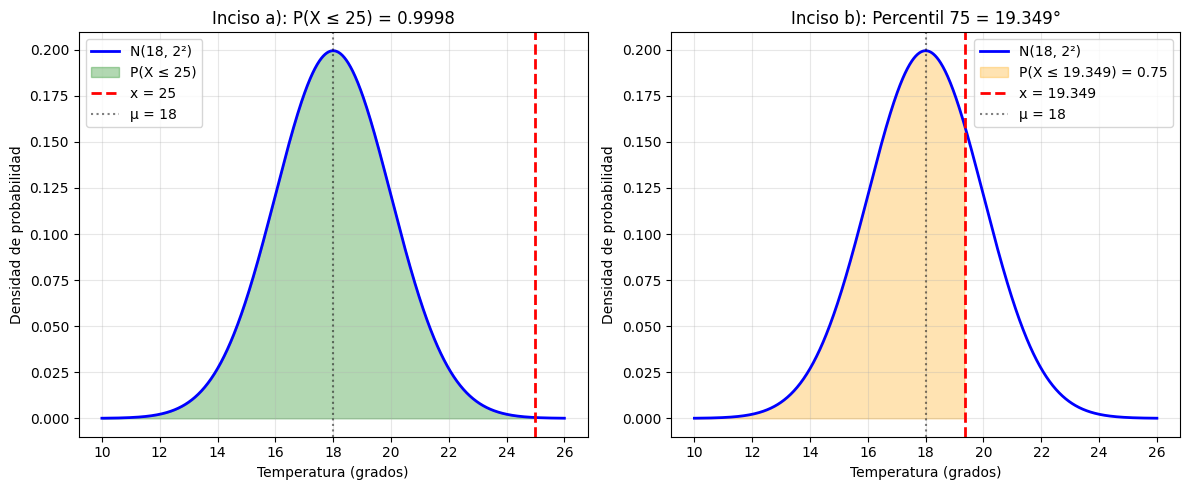

In [586]:
# Gráfico de la distribución
x_range = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_range = norm.pdf(x_range, mu, sigma)

plt.figure(figsize=(12, 5))

# Inciso a)
plt.subplot(1, 2, 1)
plt.plot(x_range, y_range, 'b-', linewidth=2, label=f'N({mu}, {sigma}²)')
plt.fill_between(x_range[x_range <= x_a], 
                 norm.pdf(x_range[x_range <= x_a], mu, sigma),
                 alpha=0.3, color='green', label=f'P(X ≤ {x_a})')
plt.axvline(x_a, color='red', linestyle='--', linewidth=2, label=f'x = {x_a}')
plt.axvline(mu, color='black', linestyle=':', alpha=0.5, label=f'μ = {mu}')
plt.xlabel('Temperatura (grados)')
plt.ylabel('Densidad de probabilidad')
plt.title(f'Inciso a): P(X ≤ {x_a}) = {prob_a:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Inciso b)
plt.subplot(1, 2, 2)
plt.plot(x_range, y_range, 'b-', linewidth=2, label=f'N({mu}, {sigma}²)')
plt.fill_between(x_range[x_range <= x_b], 
                 norm.pdf(x_range[x_range <= x_b], mu, sigma),
                 alpha=0.3, color='orange', label=f'P(X ≤ {x_b:.3f}) = 0.75')
plt.axvline(x_b, color='red', linestyle='--', linewidth=2, label=f'x = {x_b:.3f}')
plt.axvline(mu, color='black', linestyle=':', alpha=0.5, label=f'μ = {mu}')
plt.xlabel('Temperatura (grados)')
plt.ylabel('Densidad de probabilidad')
plt.title(f'Inciso b): Percentil 75 = {x_b:.3f}°')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Resumen de Resultados

In [587]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 3")
print("="*60)
print(f"Distribución: Normal con μ = {mu:.2f}°, σ = {sigma:.2f}°")
print()

resultados_ej3 = pd.DataFrame({
    'Inciso': ['a)', 'b)'],
    'Pregunta': [
        'P(X ≤ 25)',
        'Temp. mínima para ≥ 75%'
    ],
    'Resultado': [
        f'{prob_a:.4f}',
        f'{x_b:.3f}°'
    ]
})

display(resultados_ej3)
print()
print("✅ RESULTADOS:")
print(f"   a) P(X ≤ 25°) = {prob_a:.4f} = {prob_a*100:.2f}%")
print(f"   b) Temperatura mínima = {x_b:.3f} grados")
print("="*60)


📊 RESUMEN - EJERCICIO 3
Distribución: Normal con μ = 18.00°, σ = 2.00°



,Inciso,Pregunta,Resultado
0,a),P(X ≤ 25),0.9998
1,b),Temp. mínima para ≥ 75%,19.349°



✅ RESULTADOS:
   a) P(X ≤ 25°) = 0.9998 = 99.98%
   b) Temperatura mínima = 19.349 grados


# Ejercicio 4 - Verdadero o Falso sobre Covarianza, Varianza y Correlación

**Enunciado:**

Indicar si las siguientes afirmaciones son verdaderas o falsas **justificando** su respuesta. Especificar Verdadero o Falso.

**A)** "La covarianza entre X e Y puede ser calculada como $Cov(X,Y) = E(XY) - E(X)E(Y)$"

**B)** "La varianza y el desvío son ambas medidas de variabilidad, por tanto, son exactamente iguales"

**C)** "Si el coeficiente de correlación entre las variables aleatorias X e Y es 0 entonces las variables se encuentran correlacionadas"

**D)** "Si X e Y son independientes entonces la $V(aX + bY) = a^2V(X) + b^2V(Y)$"

### Inciso A) Covarianza: $Cov(X,Y) = E(XY) - E(X)E(Y)$

**Respuesta: VERDADERO ✅**

**Justificación:**

Por definición, la covarianza entre dos variables aleatorias X e Y es:
$$Cov(X,Y) = E[(X - E(X))(Y - E(Y))]$$

**Demostración:**

Expandiendo el producto:
$$Cov(X,Y) = E[(X - E(X))(Y - E(Y))]$$
$$= E[XY - XE(Y) - YE(X) + E(X)E(Y)]$$

Aplicando la linealidad de la esperanza:
$$= E(XY) - E(X)E(Y) - E(Y)E(X) + E(X)E(Y)$$

Simplificando (los términos del medio se cancelan):
$$= E(XY) - E(X)E(Y)$$

**Conclusión:** Esta es la fórmula alternativa de la covarianza, muy útil para cálculos prácticos.

In [588]:
# Ejemplo numérico para verificar la afirmación A
print("="*60)
print("INCISO A: Demostración con ejemplo numérico")
print("="*60)

# Supongamos dos variables X e Y con distribución conjunta simple
# X puede ser 1 o 2, Y puede ser 2 o 3
# P(X=1,Y=2) = 0.3, P(X=1,Y=3) = 0.2
# P(X=2,Y=2) = 0.3, P(X=2,Y=3) = 0.2

valores_xy = [(1, 2, 0.3), (1, 3, 0.2), (2, 2, 0.3), (2, 3, 0.2)]

# Calcular E(X), E(Y), E(XY)
e_x = sum(x * p for x, y, p in valores_xy)
e_y = sum(y * p for x, y, p in valores_xy)
e_xy = sum(x * y * p for x, y, p in valores_xy)

# Método 1: Fórmula alternativa
cov_formula = e_xy - e_x * e_y

# Método 2: Definición original E[(X-E(X))(Y-E(Y))]
cov_definicion = sum((x - e_x) * (y - e_y) * p for x, y, p in valores_xy)

print(f"E(X) = {e_x:.2f}")
print(f"E(Y) = {e_y:.2f}")
print(f"E(XY) = {e_xy:.2f}")
print()
print("Método 1 - Fórmula alternativa:")
print(f"Cov(X,Y) = E(XY) - E(X)E(Y) = {e_xy:.2f} - ({e_x:.2f})({e_y:.2f}) = {cov_formula:.2f}")
print()
print("Método 2 - Definición original:")
print(f"Cov(X,Y) = E[(X-E(X))(Y-E(Y))] = {cov_definicion:.2f}")
print()
print(f"✅ Ambos métodos dan el mismo resultado: {cov_formula:.2f}")
print("="*60)

INCISO A: Demostración con ejemplo numérico
E(X) = 1.50
E(Y) = 2.40
E(XY) = 3.60

Método 1 - Fórmula alternativa:
Cov(X,Y) = E(XY) - E(X)E(Y) = 3.60 - (1.50)(2.40) = -0.00

Método 2 - Definición original:
Cov(X,Y) = E[(X-E(X))(Y-E(Y))] = 0.00

✅ Ambos métodos dan el mismo resultado: -0.00


### Inciso B) Varianza y Desvío son exactamente iguales

**Respuesta: FALSO ❌**

**Justificación:**

Aunque ambas son medidas de variabilidad, **NO son iguales**:

**Varianza:**
$$V(X) = E[(X - E(X))^2]$$
- Se expresa en unidades **al cuadrado**
- Ejemplo: Si X es temperatura en °C, V(X) está en °C²

**Desvío estándar (o desviación estándar):**
$$\sigma(X) = \sqrt{V(X)}$$
- Se expresa en las **mismas unidades** que la variable original
- Ejemplo: Si X es temperatura en °C, σ(X) está en °C

**Relación entre ambas:**
$$\sigma(X) = \sqrt{V(X)}$$
$$V(X) = \sigma^2(X)$$

**Conclusión:** El desvío estándar es la **raíz cuadrada** de la varianza. Son diferentes pero están relacionadas.

In [589]:
# Ejemplo numérico para verificar la afirmación B
print("\n" + "="*60)
print("INCISO B: Diferencia entre Varianza y Desvío")
print("="*60)

# Variable aleatoria X con valores: 2, 4, 6, 8 (con igual probabilidad)
valores_x = np.array([2, 4, 6, 8])
probabilidades = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular esperanza
e_x = np.sum(valores_x * probabilidades)

# Calcular varianza
varianza = np.sum((valores_x - e_x)**2 * probabilidades)

# Calcular desvío estándar
desvio = np.sqrt(varianza)

print(f"Variable X con valores: {valores_x}")
print(f"E(X) = {e_x:.2f}")
print()
print(f"Varianza: V(X) = {varianza:.2f} (unidades²)")
print(f"Desvío estándar: σ(X) = {desvio:.2f} (unidades)")
print()
print("Relación: σ(X) = √V(X)")
print(f"         {desvio:.2f} = √{varianza:.2f}")
print()
print("❌ FALSO: NO son iguales. El desvío es la raíz de la varianza")
print("="*60)


INCISO B: Diferencia entre Varianza y Desvío
Variable X con valores: [2 4 6 8]
E(X) = 5.00

Varianza: V(X) = 5.00 (unidades²)
Desvío estándar: σ(X) = 2.24 (unidades)

Relación: σ(X) = √V(X)
         2.24 = √5.00

❌ FALSO: NO son iguales. El desvío es la raíz de la varianza
Variable X con valores: [2 4 6 8]
E(X) = 5.00

Varianza: V(X) = 5.00 (unidades²)
Desvío estándar: σ(X) = 2.24 (unidades)

Relación: σ(X) = √V(X)
         2.24 = √5.00

❌ FALSO: NO son iguales. El desvío es la raíz de la varianza


### Inciso C) Si ρ(X,Y) = 0 entonces las variables están correlacionadas

**Respuesta: FALSO ❌**

**Justificación:**

El coeficiente de correlación ρ(X,Y) mide la **relación lineal** entre X e Y:
$$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma(X) \sigma(Y)}$$

**Interpretación de ρ:**
- ρ = 0 → **NO hay correlación lineal** (las variables NO están linealmente relacionadas)
- ρ ≠ 0 → **SÍ hay correlación** (positiva si ρ > 0, negativa si ρ < 0)

**La afirmación dice:** "Si ρ = 0 entonces las variables **están** correlacionadas"

**Esto es FALSO porque:**
- ρ = 0 significa que las variables **NO están correlacionadas linealmente**
- Cov(X,Y) = 0 cuando ρ = 0

**Nota importante:**
- ρ = 0 **NO implica independencia** (puede haber relación no lineal)
- Pero sí implica **ausencia de correlación lineal**

**Conclusión:** Si ρ = 0, las variables **NO están correlacionadas** (linealmente).

In [590]:
# Ejemplo numérico para verificar la afirmación C
print("\n" + "="*60)
print("INCISO C: Coeficiente de correlación = 0")
print("="*60)

# Ejemplo de variables con correlación cero (simétricas)
# X: -2, -1, 0, 1, 2
# Y: 4, 1, 0, 1, 4 (Y = X²)
# Hay relación (cuadrática) pero correlación lineal = 0

x_vals = np.array([-2, -1, 0, 1, 2])
y_vals = x_vals**2
probs = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

e_x = np.sum(x_vals * probs)
e_y = np.sum(y_vals * probs)
e_xy = np.sum(x_vals * y_vals * probs)

cov_xy = e_xy - e_x * e_y
var_x = np.sum((x_vals - e_x)**2 * probs)
var_y = np.sum((y_vals - e_y)**2 * probs)

rho = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y)) if var_x > 0 and var_y > 0 else 0

print(f"X: {x_vals}")
print(f"Y: {y_vals} (Y = X²)")
print()
print(f"E(X) = {e_x:.2f}")
print(f"E(Y) = {e_y:.2f}")
print(f"Cov(X,Y) = {cov_xy:.2f}")
print(f"ρ(X,Y) = {rho:.4f}")
print()
if abs(rho) < 0.01:
    print("✅ ρ ≈ 0: Las variables NO están correlacionadas linealmente")
    print("   Pero SÍ tienen relación (cuadrática)")
else:
    print("ρ ≠ 0: Las variables SÍ están correlacionadas")
print()
print("❌ FALSO: Si ρ = 0, NO están correlacionadas (linealmente)")
print("="*60)


INCISO C: Coeficiente de correlación = 0
X: [-2 -1  0  1  2]
Y: [4 1 0 1 4] (Y = X²)

E(X) = -0.00
E(Y) = 2.00
Cov(X,Y) = 0.00
ρ(X,Y) = 0.0000

✅ ρ ≈ 0: Las variables NO están correlacionadas linealmente
   Pero SÍ tienen relación (cuadrática)

❌ FALSO: Si ρ = 0, NO están correlacionadas (linealmente)
E(X) = -0.00
E(Y) = 2.00
Cov(X,Y) = 0.00
ρ(X,Y) = 0.0000

✅ ρ ≈ 0: Las variables NO están correlacionadas linealmente
   Pero SÍ tienen relación (cuadrática)

❌ FALSO: Si ρ = 0, NO están correlacionadas (linealmente)


### Inciso D) Si X e Y son independientes entonces $V(aX + bY) = a^2V(X) + b^2V(Y)$

**Respuesta: VERDADERO ✅**

**Justificación:**

**Propiedad general de la varianza:**
$$V(aX + bY) = a^2V(X) + b^2V(Y) + 2ab \cdot Cov(X,Y)$$

**Si X e Y son independientes:**
- Por definición de independencia: $Cov(X,Y) = 0$
- Entonces: $2ab \cdot Cov(X,Y) = 2ab \cdot 0 = 0$

**Por lo tanto:**
$$V(aX + bY) = a^2V(X) + b^2V(Y) + 0$$
$$V(aX + bY) = a^2V(X) + b^2V(Y)$$

**Demostración de la propiedad general:**

Partiendo de la definición:
$$V(aX + bY) = E[(aX + bY)^2] - [E(aX + bY)]^2$$

Expandiendo:
$$= E[a^2X^2 + 2abXY + b^2Y^2] - [aE(X) + bE(Y)]^2$$
$$= a^2E(X^2) + 2abE(XY) + b^2E(Y^2) - a^2[E(X)]^2 - 2abE(X)E(Y) - b^2[E(Y)]^2$$

Agrupando:
$$= a^2[E(X^2) - E(X)^2] + b^2[E(Y^2) - E(Y)^2] + 2ab[E(XY) - E(X)E(Y)]$$
$$= a^2V(X) + b^2V(Y) + 2ab \cdot Cov(X,Y)$$

**Conclusión:** La fórmula es válida cuando X e Y son independientes (Cov = 0).

In [591]:
# Ejemplo numérico para verificar la afirmación D
print("\n" + "="*60)
print("INCISO D: Varianza de combinación lineal (independencia)")
print("="*60)

# Dos variables independientes X e Y
# X: valores {1, 2, 3} con P = 1/3 cada uno
# Y: valores {4, 5} con P = 1/2 cada uno

x_vals_d = np.array([1, 2, 3])
px = np.array([1/3, 1/3, 1/3])
y_vals_d = np.array([4, 5])
py = np.array([1/2, 1/2])

# Calcular E(X), V(X)
e_x_d = np.sum(x_vals_d * px)
v_x_d = np.sum((x_vals_d - e_x_d)**2 * px)

# Calcular E(Y), V(Y)
e_y_d = np.sum(y_vals_d * py)
v_y_d = np.sum((y_vals_d - e_y_d)**2 * py)

# Constantes
a = 2
b = 3

# Método 1: Fórmula directa (independencia)
v_formula = a**2 * v_x_d + b**2 * v_y_d

# Método 2: Cálculo directo de V(aX + bY)
# Para variables independientes, P(X,Y) = P(X)P(Y)
combinaciones = []
for i, x in enumerate(x_vals_d):
    for j, y in enumerate(y_vals_d):
        z = a*x + b*y
        p = px[i] * py[j]  # Independencia
        combinaciones.append((z, p))

e_z = sum(z * p for z, p in combinaciones)
v_z_directo = sum((z - e_z)**2 * p for z, p in combinaciones)

print("Variables independientes:")
print(f"X ~ {dict(zip(x_vals_d, px))}")
print(f"Y ~ {dict(zip(y_vals_d, py))}")
print()
print(f"E(X) = {e_x_d:.2f}, V(X) = {v_x_d:.2f}")
print(f"E(Y) = {e_y_d:.2f}, V(Y) = {v_y_d:.2f}")
print()
print(f"Sea Z = {a}X + {b}Y")
print()
print("Método 1 - Fórmula (independencia):")
print(f"V({a}X + {b}Y) = {a}²V(X) + {b}²V(Y)")
print(f"              = {a**2}({v_x_d:.2f}) + {b**2}({v_y_d:.2f})")
print(f"              = {v_formula:.2f}")
print()
print("Método 2 - Cálculo directo:")
print(f"V(Z) = {v_z_directo:.2f}")
print()
print(f"✅ Ambos métodos coinciden: {v_formula:.2f}")
print("="*60)


INCISO D: Varianza de combinación lineal (independencia)
Variables independientes:
X ~ {np.int64(1): np.float64(0.3333333333333333), np.int64(2): np.float64(0.3333333333333333), np.int64(3): np.float64(0.3333333333333333)}
Y ~ {np.int64(4): np.float64(0.5), np.int64(5): np.float64(0.5)}

E(X) = 2.00, V(X) = 0.67
E(Y) = 4.50, V(Y) = 0.25

Sea Z = 2X + 3Y

Método 1 - Fórmula (independencia):
V(2X + 3Y) = 2²V(X) + 3²V(Y)
              = 4(0.67) + 9(0.25)
              = 4.92

Método 2 - Cálculo directo:
V(Z) = 4.92

✅ Ambos métodos coinciden: 4.92
Variables independientes:
X ~ {np.int64(1): np.float64(0.3333333333333333), np.int64(2): np.float64(0.3333333333333333), np.int64(3): np.float64(0.3333333333333333)}
Y ~ {np.int64(4): np.float64(0.5), np.int64(5): np.float64(0.5)}

E(X) = 2.00, V(X) = 0.67
E(Y) = 4.50, V(Y) = 0.25

Sea Z = 2X + 3Y

Método 1 - Fórmula (independencia):
V(2X + 3Y) = 2²V(X) + 3²V(Y)
              = 4(0.67) + 9(0.25)
              = 4.92

Método 2 - Cálculo directo:

### Resumen de Resultados

In [592]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 4")
print("="*60)

resultados_ej4 = pd.DataFrame({
    'Inciso': ['A)', 'B)', 'C)', 'D)'],
    'Afirmación': [
        'Cov(X,Y) = E(XY) - E(X)E(Y)',
        'Varianza = Desvío estándar',
        'ρ = 0 → variables correlacionadas',
        'Indep. → V(aX+bY) = a²V(X)+b²V(Y)'
    ],
    'Respuesta': [
        'VERDADERO ✅',
        'FALSO ❌',
        'FALSO ❌',
        'VERDADERO ✅'
    ],
    'Justificación': [
        'Fórmula alternativa demostrable',
        'σ = √V (raíz de varianza)',
        'ρ=0 → NO correlacionadas',
        'Cov=0 cuando son independientes'
    ]
})

display(resultados_ej4)
print("="*60)


📊 RESUMEN - EJERCICIO 4


,Inciso,Afirmación,Respuesta,Justificación
0,A),"Cov(X,Y) = E(XY) - E(X)E(Y)",VERDADERO ✅,Fórmula alternativa demostrable
1,B),Varianza = Desvío estándar,FALSO ❌,σ = √V (raíz de varianza)
2,C),ρ = 0 → variables correlacionadas,FALSO ❌,ρ=0 → NO correlacionadas
3,D),Indep. → V(aX+bY) = a²V(X)+b²V(Y),VERDADERO ✅,Cov=0 cuando son independientes


# Ejercicio 5 - Distribución de Poisson (Imperfecciones en alambre)

**Enunciado:**

Supongamos que el número de imperfecciones en un alambre delgado de cobre tiene una media de 2.3 imperfecciones por milímetro.

- A) Determine la probabilidad de 2 imperfecciones en un milímetro de alambre.
- B) Determine la probabilidad de 10 imperfecciones en 5 milímetros de alambre.

**Respuestas:** A) 26,52% (0,2652) B) 11,29% (0,1129)

**Definir la variable aleatoria y parámetros:**

- **Variable aleatoria:** X = número de imperfecciones en el alambre
- **Distribución:** Poisson (contamos eventos en un intervalo continuo)
- **Parámetro:** λ = 2.3 imperfecciones/mm

**Modelo de Poisson:**
$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

In [593]:
# Parámetro de la distribución
lambda_mm = 2.3  # imperfecciones por milímetro

print("📊 Parámetros de la distribución:")
print(f"Tasa promedio: λ = {lambda_mm} imperfecciones/mm")
print(f"Distribución: X ~ Poisson({lambda_mm})")

📊 Parámetros de la distribución:
Tasa promedio: λ = 2.3 imperfecciones/mm
Distribución: X ~ Poisson(2.3)


### Inciso a) Probabilidad de 2 imperfecciones en 1 milímetro

**Pregunta:** P(X = 2) con λ = 2.3

**Fórmula:**
$$P(X = 2) = \frac{e^{-2.3} \cdot 2.3^2}{2!}$$

In [594]:
# Inciso a)
from scipy.stats import poisson

k_a = 2  # número de imperfecciones
longitud_a = 1  # milímetro

# Lambda para 1 mm
lambda_a = lambda_mm * longitud_a

# Calcular P(X = 2)
prob_a = poisson.pmf(k_a, lambda_a)

print("="*60)
print("INCISO A: P(X = 2) en 1 mm")
print("="*60)
display(Math(r'P(X = 2) = \frac{e^{-\lambda} \cdot \lambda^2}{2!}'))
display(Math(r'P(X = 2) = \frac{e^{-' + f'{lambda_a}' + r'} \cdot ' + f'{lambda_a}' + r'^2}{2}'))
print()
print(f"✅ P(X = 2) = {prob_a:.4f}")
print(f"   P(X = 2) = {prob_a*100:.2f}%")
print("="*60)

INCISO A: P(X = 2) en 1 mm

INCISO A: P(X = 2) en 1 mm


<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(X = 2) = 0.2652
   P(X = 2) = 26.52%


### Inciso b) Probabilidad de 10 imperfecciones en 5 milímetros

**Pregunta:** P(X = 10) en 5 mm

**Ajuste del parámetro:**
- En 1 mm: λ = 2.3 imperfecciones
- En 5 mm: λ₅ = 2.3 × 5 = 11.5 imperfecciones

**Fórmula:**
$$P(X = 10) = \frac{e^{-11.5} \cdot 11.5^{10}}{10!}$$

In [595]:
# Inciso b)
k_b = 10  # número de imperfecciones
longitud_b = 5  # milímetros

# Lambda para 5 mm
lambda_b = lambda_mm * longitud_b

# Calcular P(X = 10) en 5 mm
prob_b = poisson.pmf(k_b, lambda_b)

print("\n" + "="*60)
print("INCISO B: P(X = 10) en 5 mm")
print("="*60)
print(f"Ajuste de λ para {longitud_b} mm:")
print(f"λ₅ = λ × longitud = {lambda_mm} × {longitud_b} = {lambda_b:.2f}")
print()
display(Math(r'P(X = 10) = \frac{e^{-\lambda_5} \cdot \lambda_5^{10}}{10!}'))
display(Math(r'P(X = 10) = \frac{e^{-' + f'{lambda_b}' + r'} \cdot ' + f'{lambda_b}' + r'^{10}}{10!}'))
print()
print(f"✅ P(X = 10) = {prob_b:.4f}")
print(f"   P(X = 10) = {prob_b*100:.2f}%")
print("="*60)


INCISO B: P(X = 10) en 5 mm
Ajuste de λ para 5 mm:
λ₅ = λ × longitud = 2.3 × 5 = 11.50



<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(X = 10) = 0.1129
   P(X = 10) = 11.29%


### Resumen de Resultados

In [596]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 5")
print("="*60)
print(f"Distribución: Poisson con λ = {lambda_mm} imperfecciones/mm")
print()

resultados_ej5 = pd.DataFrame({
    'Inciso': ['a)', 'b)'],
    'Pregunta': [
        'P(X = 2) en 1 mm',
        'P(X = 10) en 5 mm'
    ],
    'Lambda': [
        f'{lambda_a:.2f}',
        f'{lambda_b:.2f}'
    ],
    'Resultado': [
        f'{prob_a:.4f}',
        f'{prob_b:.4f}'
    ]
})

display(resultados_ej5)
print()
print("✅ RESULTADOS:")
print(f"   a) P(X = 2) en 1 mm = {prob_a:.4f} = {prob_a*100:.2f}%")
print(f"   b) P(X = 10) en 5 mm = {prob_b:.4f} = {prob_b*100:.2f}%")
print("="*60)


📊 RESUMEN - EJERCICIO 5
Distribución: Poisson con λ = 2.3 imperfecciones/mm



,Inciso,Pregunta,Lambda,Resultado
0,a),P(X = 2) en 1 mm,2.30,0.2652
1,b),P(X = 10) en 5 mm,11.50,0.1129



✅ RESULTADOS:
   a) P(X = 2) en 1 mm = 0.2652 = 26.52%
   b) P(X = 10) en 5 mm = 0.1129 = 11.29%


# Ejercicio 6

En un determinado comercio el importe de ventas mensuales tiene una media $300 mil y desvío estándar $50 mil.

**A)** Defina la variable aleatoria. ¿Qué distribución sigue y cuáles son los valores de sus parámetros?

**B)** ¿Cuál es el importe mínimo de ventas mensuales que debe realizar si se espera que las ventas se ubiquen por encima del 75,80%?

### Inciso a)

**Definición de la variable aleatoria:**

- **X**: Importe de ventas mensuales en miles de pesos

**Datos conocidos:**
- Media: μ = 300 (miles)
- Desvío estándar: σ = 50 (miles)

**Distribución:**

Como se trata de una variable continua (importes de ventas) con media y desvío estándar conocidos, y no se especifica otra distribución, asumimos que sigue una distribución **Normal**:

$$X \sim N(300, 50)$$

Donde:
- μ = 300 (media en miles de pesos)
- σ = 50 (desvío estándar en miles de pesos)

In [597]:
print("📊 Datos conocidos:")
print("="*60)
mu_ventas = 300  # miles de pesos
sigma_ventas = 50  # miles de pesos

print(f"Media (μ) = {mu_ventas} miles de pesos")
print(f"Desvío estándar (σ) = {sigma_ventas} miles de pesos")
print()
print("📐 Distribución:")
print("="*60)
print("X ~ N(300, 50)")
print()
print("Parámetros:")
print(f"  • μ = {mu_ventas} (miles de pesos)")
print(f"  • σ = {sigma_ventas} (miles de pesos)")

📊 Datos conocidos:
Media (μ) = 300 miles de pesos
Desvío estándar (σ) = 50 miles de pesos

📐 Distribución:
X ~ N(300, 50)

Parámetros:
  • μ = 300 (miles de pesos)
  • σ = 50 (miles de pesos)


### Inciso b)

**Objetivo:** Encontrar el importe mínimo x tal que las ventas se ubiquen por encima del 75.80%

**Interpretación:** "Por encima del 75.80%" significa que el valor x es tal que el 75.80% de las ventas son menores o iguales a x (percentil 75.80).

**Paso 1: Reformular el problema**

Buscamos x tal que:
- P(X ≤ x) = 0.7580 (percentil 75.80)
- P(X > x) = 1 - 0.7580 = 0.2420

**Paso 2: Encontrar el percentil 75.80**

Buscamos el valor x tal que P(X ≤ x) = 0.7580

**Paso 3: Estandarización**

$$z = \frac{x - \mu}{\sigma}$$

Necesitamos encontrar z tal que P(Z ≤ z) = 0.2420

**Paso 4: Calcular x**

Una vez encontrado z, despejamos:

$$x = \mu + z \cdot \sigma$$

In [598]:
# Percentil buscado
p_percentil = 0.7580  # El 75.80% de las ventas están por debajo de x

print("📐 Cálculo del importe mínimo:")
print("="*60)
print(f"Buscamos el percentil {p_percentil*100:.2f}%")
print(f"P(X ≤ x) = {p_percentil}")
print()

# Encontrar el valor z del percentil 75.80
z_valor = stats.norm.ppf(p_percentil)
print(f"Valor estandarizado: z = {z_valor:.4f}")
print()

# Calcular x
x_minimo = mu_ventas + z_valor * sigma_ventas

print("Aplicando la fórmula de estandarización:")
print("x = μ + z·σ")
print(f"x = {mu_ventas} + ({z_valor:.4f})·{sigma_ventas}")
print(f"x = {x_minimo:.2f} miles de pesos")
print()

# Verificación
prob_verificacion_b = stats.norm.cdf(x_minimo, mu_ventas, sigma_ventas)
print("✅ Verificación:")
print(f"P(X ≤ {x_minimo:.2f}) = {prob_verificacion_b:.4f}")
print(f"Esperado: {p_percentil}")

📐 Cálculo del importe mínimo:
Buscamos el percentil 75.80%
P(X ≤ x) = 0.758

Valor estandarizado: z = 0.6999

Aplicando la fórmula de estandarización:
x = μ + z·σ
x = 300 + (0.6999)·50
x = 334.99 miles de pesos

✅ Verificación:
P(X ≤ 334.99) = 0.7580
Esperado: 0.758
x = 300 + (0.6999)·50
x = 334.99 miles de pesos

✅ Verificación:
P(X ≤ 334.99) = 0.7580
Esperado: 0.758


### Resumen de resultados

In [599]:
import pandas as pd

resultados_ej6 = pd.DataFrame({
    'Inciso': ['a) Distribución', 'a) Parámetro μ', 'a) Parámetro σ', 
               'b) Importe mínimo'],
    'Resultado': [
        'X ~ N(300, 50)',
        f'{mu_ventas} miles',
        f'{sigma_ventas} miles',
        f'{x_minimo:.0f} miles (${x_minimo:.0f},000)'
    ]
})

print("📊 EJERCICIO 6 - RESUMEN DE RESULTADOS")
print("="*60)
display(resultados_ej6)
print()
print("Interpretación del inciso b):")
print(f"El comercio debe realizar ventas de al menos ${x_minimo:.0f},000")
print(f"para ubicarse en el percentil {p_percentil*100:.2f}% (es decir, superar")
print(f"al {p_percentil*100:.2f}% de los casos).")

📊 EJERCICIO 6 - RESUMEN DE RESULTADOS


,Inciso,Resultado
0,a) Distribución,"X ~ N(300, 50)"
1,a) Parámetro μ,300 miles
2,a) Parámetro σ,50 miles
3,b) Importe mínimo,"335 miles ($335,000)"



Interpretación del inciso b):
El comercio debe realizar ventas de al menos $335,000
para ubicarse en el percentil 75.80% (es decir, superar
al 75.80% de los casos).


# Ejercicio 7 - Verdadero o Falso (Distribuciones y Conceptos)

**Enunciado:**

Indicar si las siguientes afirmaciones son verdaderas o falsas **justificando** su respuesta. Sin especificar Verdadero o Falso y sin justificación o mal justificado la respuesta se considerará incorrecta.

**A)** "Si una variable aleatoria continua tiene una distribución exponencial con parámetro 0,5, entonces la propiedad de falta de memoria implica que P(X>3/X>1) es igual a calcular P(X>2)"

**B)** "La esperanza de una variable aleatoria discreta es un promedio ponderado de los valores de la variable aleatoria"

**C)** "Si el coeficiente de correlación entre las variables aleatorias X e Y es 0 entonces las variables tienen relación lineal"

**D)** "La varianza de una variable aleatoria es igual al valor esperado de la variable al cuadrado menos el valor esperado de la variable al cuadrado"

### Inciso A) Propiedad de falta de memoria en distribución exponencial

**Afirmación:** "Si una variable aleatoria continua tiene una distribución exponencial con parámetro 0,5, entonces la propiedad de falta de memoria implica que P(X>3|X>1) es igual a calcular P(X>2)"

**Respuesta: VERDADERO ✅**

**Justificación:**

La distribución exponencial tiene la **propiedad de falta de memoria** (memoryless property):

$$P(X > s + t | X > s) = P(X > t)$$

para todo s, t ≥ 0.

**En nuestro caso:**
- X ~ Exponencial(λ = 0.5)
- Queremos verificar: P(X > 3 | X > 1) = P(X > 2)

**Aplicando la propiedad:**
- s = 1
- s + t = 3  →  t = 2

Entonces:
$$P(X > 3 | X > 1) = P(X > 1 + 2 | X > 1) = P(X > 2)$$

**Demostración matemática:**

Por definición de probabilidad condicional:
$$P(X > 3 | X > 1) = \frac{P(X > 3 \cap X > 1)}{P(X > 1)} = \frac{P(X > 3)}{P(X > 1)}$$

Para la distribución exponencial:
$$P(X > x) = e^{-\lambda x}$$

Por lo tanto:
$$P(X > 3 | X > 1) = \frac{e^{-0.5 \cdot 3}}{e^{-0.5 \cdot 1}} = \frac{e^{-1.5}}{e^{-0.5}} = e^{-1.5 + 0.5} = e^{-1} = e^{-0.5 \cdot 2}$$

Y esto es exactamente:
$$P(X > 2) = e^{-0.5 \cdot 2} = e^{-1}$$

**Conclusión:** La afirmación es VERDADERA. La propiedad de falta de memoria garantiza que P(X > 3 | X > 1) = P(X > 2).

---

**📝 Nota: ¿Qué es la propiedad de falta de memoria?**

La **propiedad de falta de memoria** significa que **"el pasado no importa para predecir el futuro"**. Formalmente:

$$P(X > s + t | X > s) = P(X > t) \quad \text{para todo } s, t \geq 0$$

**Interpretación:** Si ya sabemos que X > s (ya transcurrió un tiempo s), la probabilidad de que dure **t unidades más** es la misma que si empezáramos desde cero. El sistema "olvida" que ya pasó el tiempo s.

**Ejemplo práctico:** Tiempo de vida de un componente electrónico
- Si el componente ya funcionó 1 hora, la probabilidad de que funcione 2 horas **más** es la misma que si el componente fuera nuevo
- El componente "no envejece": no importa cuánto ha funcionado, la probabilidad de durar t horas adicionales es siempre la misma

**Distribuciones con esta propiedad:**
- ✅ **Exponencial** (continua) - única distribución continua con esta propiedad
- ✅ **Geométrica** (discreta) - única distribución discreta con esta propiedad

**Aplicaciones:** Se usa para modelar tiempos de vida sin desgaste, tiempos entre eventos aleatorios (llamadas, llegadas, fallas), decaimiento radioactivo, etc.

**Nota importante:** El código siguiente hace una **verificación numérica** para este caso particular (λ=0.5, s=1, t=2), no una demostración general de la propiedad.

In [ ]:
# Verificación numérica del Inciso A
from scipy.stats import expon

print("="*60)
print("INCISO A: Propiedad de falta de memoria")
print("="*60)

# Parámetro de la distribución exponencial
lambda_exp = 0.5

# Método 1: Calcular P(X > 3 | X > 1)
# P(X > 3 | X > 1) = P(X > 3) / P(X > 1)
p_mayor_3 = 1 - expon.cdf(3, scale=1/lambda_exp)
p_mayor_1 = 1 - expon.cdf(1, scale=1/lambda_exp)
p_condicional = p_mayor_3 / p_mayor_1

print(f"X ~ Exponencial(λ = {lambda_exp})")
print()
print("Método 1 - Probabilidad condicional:")
print(f"P(X > 3) = {p_mayor_3:.6f}")
print(f"P(X > 1) = {p_mayor_1:.6f}")
print("P(X > 3 | X > 1) = P(X > 3) / P(X > 1)")
print(f"P(X > 3 | X > 1) = {p_mayor_3:.6f} / {p_mayor_1:.6f}")
print(f"P(X > 3 | X > 1) = {p_condicional:.6f}")
print()

# Método 2: Calcular P(X > 2) directamente
p_mayor_2 = 1 - expon.cdf(2, scale=1/lambda_exp)

print("Método 2 - Probabilidad directa:")
print(f"P(X > 2) = {p_mayor_2:.6f}")
print()

# Comparación
print("Comparación:")
print(f"P(X > 3 | X > 1) = {p_condicional:.6f}")
print(f"P(X > 2)         = {p_mayor_2:.6f}")
print("="*60)

INCISO A: Propiedad de falta de memoria
X ~ Exponencial(λ = 0.5)

Método 1 - Probabilidad condicional:
P(X > 3) = 0.223130
P(X > 1) = 0.606531
P(X > 3 | X > 1) = P(X > 3) / P(X > 1)
P(X > 3 | X > 1) = 0.223130 / 0.606531
P(X > 3 | X > 1) = 0.367879

Método 2 - Probabilidad directa:
P(X > 2) = 0.367879

Comparación:
P(X > 3 | X > 1) = 0.367879
P(X > 2)         = 0.367879


### Inciso B) Esperanza como promedio ponderado

**Afirmación:** "La esperanza de una variable aleatoria discreta es un promedio ponderado de los valores de la variable aleatoria"

**Respuesta: VERDADERO ✅**

**Justificación:**

Por definición, la **esperanza** (o valor esperado) de una variable aleatoria discreta X es:

$$E(X) = \sum_{i} x_i \cdot P(X = x_i)$$

Donde:
- $x_i$ son los valores que puede tomar la variable
- $P(X = x_i)$ son las probabilidades asociadas a cada valor

**Interpretación:**
- Cada valor $x_i$ está **ponderado** por su probabilidad $P(X = x_i)$
- Las probabilidades actúan como **pesos** que suman 1: $\sum_i P(X = x_i) = 1$
- Es un **promedio ponderado** donde los pesos son las probabilidades

**Diferencia con promedio aritmético:**
- Promedio aritmético simple: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$ (todos los pesos son iguales a 1/n)
- Promedio ponderado (esperanza): $E(X) = \sum_{i} x_i \cdot p_i$ (los pesos $p_i$ pueden ser diferentes)

**Conclusión:** La afirmación es VERDADERA. La esperanza es exactamente un promedio ponderado donde los pesos son las probabilidades de cada valor.

In [601]:
# Ejemplo numérico del Inciso B
print("\n" + "="*60)
print("INCISO B: Esperanza como promedio ponderado")
print("="*60)

# Ejemplo: Lanzamiento de un dado cargado
# Valores: 1, 2, 3, 4, 5, 6
# Probabilidades desiguales (dado cargado)
valores_dado = np.array([1, 2, 3, 4, 5, 6])
prob_dado = np.array([0.10, 0.15, 0.20, 0.25, 0.20, 0.10])

# Verificar que suman 1
suma_prob = np.sum(prob_dado)

print("Ejemplo: Dado cargado")
print(f"Valores: {valores_dado}")
print(f"Probabilidades: {prob_dado}")
print(f"Suma de probabilidades: {suma_prob:.2f}")
print()

# Calcular esperanza (promedio ponderado)
esperanza = np.sum(valores_dado * prob_dado)

print("Cálculo de la esperanza:")
print("E(X) = Σ x_i · P(X = x_i)")
for i, (val, prob) in enumerate(zip(valores_dado, prob_dado)):
    print(f"     + {val} · {prob:.2f} = {val * prob:.2f}")
print(f"E(X) = {esperanza:.2f}")
print()

# Comparar con promedio aritmético simple
promedio_simple = np.mean(valores_dado)

print("Comparación:")
print(f"Promedio ponderado (esperanza): E(X) = {esperanza:.2f}")
print(f"Promedio aritmético simple:     μ    = {promedio_simple:.2f}")
print("="*60)


INCISO B: Esperanza como promedio ponderado
Ejemplo: Dado cargado
Valores: [1 2 3 4 5 6]
Probabilidades: [0.1  0.15 0.2  0.25 0.2  0.1 ]
Suma de probabilidades: 1.00

Cálculo de la esperanza:
E(X) = Σ x_i · P(X = x_i)
     + 1 · 0.10 = 0.10
     + 2 · 0.15 = 0.30
     + 3 · 0.20 = 0.60
     + 4 · 0.25 = 1.00
     + 5 · 0.20 = 1.00
     + 6 · 0.10 = 0.60
E(X) = 3.60

Comparación:
Promedio ponderado (esperanza): E(X) = 3.60
Promedio aritmético simple:     μ    = 3.50


### Inciso C) Correlación cero y relación lineal

**Afirmación:** "Si el coeficiente de correlación entre las variables aleatorias X e Y es 0 entonces las variables tienen relación lineal"

**Respuesta: FALSO ❌**

**Justificación:**

El coeficiente de correlación ρ(X,Y) mide la **intensidad de la relación lineal** entre X e Y:

$$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma(X) \cdot \sigma(Y)}$$

**Interpretación correcta:**
- ρ = 0 → **NO hay relación lineal** (las variables NO están correlacionadas linealmente)
- ρ ≠ 0 → **SÍ hay relación lineal** (positiva si ρ > 0, negativa si ρ < 0)
- |ρ| = 1 → Relación lineal perfecta

**La afirmación dice lo opuesto:**
- Dice: "ρ = 0 → tienen relación lineal" ❌
- Correcto: "ρ = 0 → NO tienen relación lineal" ✅

**Observaciones importantes:**
1. ρ = 0 **NO implica independencia** (puede haber relación no lineal, por ejemplo cuadrática)
2. ρ = 0 **SÍ implica ausencia de correlación lineal**
3. Pueden existir relaciones (no lineales) con ρ = 0

**Conclusión:** La afirmación es FALSA. Si ρ = 0, las variables **NO tienen relación lineal** (aunque podrían tener otro tipo de relación).

In [602]:
# Ejemplo numérico del Inciso C
print("\n" + "="*60)
print("INCISO C: Correlación = 0 y relación lineal")
print("="*60)

# Ejemplo: Relación cuadrática (Y = X²) con ρ = 0
# X simétrica alrededor de 0
x_vals_c = np.array([-2, -1, 0, 1, 2])
y_vals_c = x_vals_c**2  # Relación cuadrática
probs_c = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

print("Ejemplo: Y = X² (relación cuadrática, NO lineal)")
print(f"X: {x_vals_c}")
print(f"Y: {y_vals_c}")
print()

# Calcular esperanzas y covarianza
e_x_c = np.sum(x_vals_c * probs_c)
e_y_c = np.sum(y_vals_c * probs_c)
e_xy_c = np.sum(x_vals_c * y_vals_c * probs_c)

cov_xy_c = e_xy_c - e_x_c * e_y_c

# Calcular varianzas
var_x_c = np.sum((x_vals_c - e_x_c)**2 * probs_c)
var_y_c = np.sum((y_vals_c - e_y_c)**2 * probs_c)

# Calcular correlación
if var_x_c > 0 and var_y_c > 0:
    rho_c = cov_xy_c / (np.sqrt(var_x_c) * np.sqrt(var_y_c))
else:
    rho_c = 0

print(f"E(X) = {e_x_c:.2f}")
print(f"E(Y) = {e_y_c:.2f}")
print(f"Cov(X,Y) = {cov_xy_c:.4f}")
print(f"ρ(X,Y) = {rho_c:.4f}")
print("="*60)


INCISO C: Correlación = 0 y relación lineal
Ejemplo: Y = X² (relación cuadrática, NO lineal)
X: [-2 -1  0  1  2]
Y: [4 1 0 1 4]

E(X) = -0.00
E(Y) = 2.00
Cov(X,Y) = 0.0000
ρ(X,Y) = 0.0000


### Inciso D) Fórmula de la varianza

**Afirmación:** "La varianza de una variable aleatoria es igual al valor esperado de la variable al cuadrado menos el valor esperado de la variable al cuadrado"

**Respuesta: VERDADERO ✅**

**Justificación:**

La afirmación describe la **fórmula alternativa de la varianza**:

$$V(X) = E(X^2) - [E(X)]^2$$

Donde:
- $E(X^2)$ = "valor esperado de la variable al cuadrado" (esperanza de X²)
- $[E(X)]^2$ = "valor esperado de la variable, al cuadrado" (cuadrado de la esperanza)

**Demostración:**

Partiendo de la definición de varianza:
$$V(X) = E[(X - E(X))^2]$$

Expandiendo el cuadrado:
$$V(X) = E[X^2 - 2X \cdot E(X) + E(X)^2]$$

Aplicando la linealidad de la esperanza:
$$V(X) = E(X^2) - 2E(X) \cdot E(X) + E(X)^2$$

$$V(X) = E(X^2) - 2[E(X)]^2 + [E(X)]^2$$

$$V(X) = E(X^2) - [E(X)]^2$$

**Interpretación:**
- $E(X^2)$: Promedio de los valores al cuadrado
- $[E(X)]^2$: Cuadrado del promedio de los valores
- La varianza es la diferencia entre ambos

**Conclusión:** La afirmación es VERDADERA. Esta es la fórmula alternativa (y muy útil) para calcular la varianza.

In [ ]:
# Ejemplo numérico del Inciso D
print("\n" + "="*60)
print("INCISO D: Fórmula alternativa de la varianza")
print("="*60)

# Ejemplo: Variable discreta simple
valores_d = np.array([1, 3, 5, 7, 9])
probs_d = np.array([0.1, 0.2, 0.4, 0.2, 0.1])

print("Ejemplo: Variable aleatoria discreta")
print(f"Valores: {valores_d}")
print(f"Probabilidades: {probs_d}")
print()

# Calcular E(X)
e_x_d = np.sum(valores_d * probs_d)

# Calcular E(X²)
e_x2_d = np.sum(valores_d**2 * probs_d)

print("Cálculos:")
print(f"E(X) = {e_x_d:.2f}")
print(f"E(X²) = {e_x2_d:.2f}")
print(f"[E(X)]² = {e_x_d**2:.2f}")
print()

# Método 1: Definición V(X) = E[(X - E(X))²]
v_definicion_d = np.sum((valores_d - e_x_d)**2 * probs_d)

# Método 2: Fórmula alternativa V(X) = E(X²) - [E(X)]²
v_formula_d = e_x2_d - e_x_d**2

print("Método 1 - Definición:")
print(f"V(X) = E[(X - E(X))²] = {v_definicion_d:.2f}")
print()

print("Método 2 - Fórmula alternativa:")
print("V(X) = E(X²) - [E(X)]²")
print(f"V(X) = {e_x2_d:.2f} - {e_x_d**2:.2f}")
print(f"V(X) = {v_formula_d:.2f}")
print()

print("Comparación:")
print(f"Método 1: {v_definicion_d:.2f}")
print(f"Método 2: {v_formula_d:.2f}")
print("="*60)


INCISO D: Fórmula alternativa de la varianza
Ejemplo: Variable aleatoria discreta
Valores: [1 3 5 7 9]
Probabilidades: [0.1 0.2 0.4 0.2 0.1]

Cálculos:
E(X) = 5.00
E(X²) = 29.80
[E(X)]² = 25.00

Método 1 - Definición:
V(X) = E[(X - E(X))²] = 4.80

Método 2 - Fórmula alternativa:
V(X) = E(X²) - [E(X)]²
V(X) = 29.80 - 25.00
V(X) = 4.80

Comparación:
Método 1: 4.80
Método 2: 4.80


### Resumen de Resultados

In [604]:
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 7")
print("="*60)

resultados_ej7 = pd.DataFrame({
    'Inciso': ['A)', 'B)', 'C)', 'D)'],
    'Afirmación': [
        'Exponencial: P(X>3|X>1) = P(X>2)',
        'E(X) es promedio ponderado',
        'ρ=0 → tienen relación lineal',
        'V(X) = E(X²) - [E(X)]²'
    ],
    'Respuesta': [
        'VERDADERO ✅',
        'VERDADERO ✅',
        'FALSO ❌',
        'VERDADERO ✅'
    ],
    'Justificación': [
        'Propiedad de falta de memoria',
        'Definición de esperanza',
        'ρ=0 → NO hay relación lineal',
        'Fórmula alternativa de varianza'
    ]
})

display(resultados_ej7)
print("="*60)


📊 RESUMEN - EJERCICIO 7


,Inciso,Afirmación,Respuesta,Justificación
0,A),Exponencial: P(X>3|X>1) = P(X>2),VERDADERO ✅,Propiedad de falta de memoria
1,B),E(X) es promedio ponderado,VERDADERO ✅,Definición de esperanza
2,C),ρ=0 → tienen relación lineal,FALSO ❌,ρ=0 → NO hay relación lineal
3,D),V(X) = E(X²) - [E(X)]²,VERDADERO ✅,Fórmula alternativa de varianza


# Ejercicio 8 - Teorema de Bayes (Telas Defectuosas)

**Enunciado:**

Supongamos que el 2% de los rollos de tela de algodón son defectuosos, al igual que el 3% de los rollos de tela de nylon. De los rollos utilizados por un fabricante, 70% son de algodón y 30% son de nylon.

**A)** Defina los eventos.

**B)** Si elegimos un rollo y resulta ser defectuoso, ¿Cuál es la probabilidad de que sea de tela de algodón?

**Respuestas:** A) A: "Tela de algodón", N: "Tela de nylon", D: "Tela defectuosa"  
B) 0.6087 ≈ 61%

### Inciso a) Definir los eventos

**Eventos:**

- **A**: El rollo es de tela de **algodón**
- **N**: El rollo es de tela de **nylon**
- **D**: El rollo es **defectuoso**

**Datos conocidos:**

- P(A) = 0.70 (70% de los rollos son de algodón)
- P(N) = 0.30 (30% de los rollos son de nylon)
- P(D|A) = 0.02 (2% de los rollos de algodón son defectuosos)
- P(D|N) = 0.03 (3% de los rollos de nylon son defectuosos)

**Observaciones:**
- A y N son eventos **mutuamente excluyentes** (un rollo no puede ser algodón y nylon a la vez)
- A y N forman una **partición** del espacio muestral: P(A) + P(N) = 1

In [605]:
print("📊 Datos conocidos:")
print("="*60)

# Probabilidades a priori (de los tipos de tela)
p_a = 0.70  # P(A) - algodón
p_n = 0.30  # P(N) - nylon

# Probabilidades condicionales (defectuoso dado el tipo)
p_d_dado_a = 0.02  # P(D|A) - defectuoso dado algodón
p_d_dado_n = 0.03  # P(D|N) - defectuoso dado nylon

print("Eventos:")
print("  A: Tela de algodón")
print("  N: Tela de nylon")
print("  D: Tela defectuosa")
print()
print("Probabilidades a priori:")
print(f"  P(A) = {p_a:.2f} ({p_a*100:.0f}% son de algodón)")
print(f"  P(N) = {p_n:.2f} ({p_n*100:.0f}% son de nylon)")
print()
print("Probabilidades condicionales:")
print(f"  P(D|A) = {p_d_dado_a:.2f} ({p_d_dado_a*100:.0f}% algodón defectuoso)")
print(f"  P(D|N) = {p_d_dado_n:.2f} ({p_d_dado_n*100:.0f}% nylon defectuoso)")
print("="*60)

📊 Datos conocidos:
Eventos:
  A: Tela de algodón
  N: Tela de nylon
  D: Tela defectuosa

Probabilidades a priori:
  P(A) = 0.70 (70% son de algodón)
  P(N) = 0.30 (30% son de nylon)

Probabilidades condicionales:
  P(D|A) = 0.02 (2% algodón defectuoso)
  P(D|N) = 0.03 (3% nylon defectuoso)


### Inciso b) Probabilidad de que sea algodón dado que es defectuoso

**Pregunta:** P(A|D) = ?

Sabemos que el rollo es defectuoso, y queremos saber la probabilidad de que sea de algodón.

**Solución usando el Teorema de Bayes:**

$$P(A|D) = \frac{P(D|A) \cdot P(A)}{P(D)}$$

**Paso 1: Calcular P(D) usando la Ley de Probabilidad Total**

Como A y N forman una partición:

$$P(D) = P(D|A) \cdot P(A) + P(D|N) \cdot P(N)$$

**Paso 2: Aplicar el Teorema de Bayes**

$$P(A|D) = \frac{P(D|A) \cdot P(A)}{P(D|A) \cdot P(A) + P(D|N) \cdot P(N)}$$

**Sustituyendo valores:**

$$P(A|D) = \frac{0.02 \times 0.70}{0.02 \times 0.70 + 0.03 \times 0.30}$$

$$P(A|D) = \frac{0.014}{0.014 + 0.009} = \frac{0.014}{0.023}$$

In [606]:
print("\n📐 Cálculo usando Teorema de Bayes:")
print("="*60)

# Paso 1: Calcular P(D) - Probabilidad total de defectuoso
p_d_y_a = p_d_dado_a * p_a  # P(D ∩ A)
p_d_y_n = p_d_dado_n * p_n  # P(D ∩ N)
p_d = p_d_y_a + p_d_y_n     # P(D) por ley de probabilidad total

print("Paso 1: Calcular P(D) usando Ley de Probabilidad Total")
print()
print("P(D) = P(D|A)·P(A) + P(D|N)·P(N)")
print(f"P(D) = {p_d_dado_a}·{p_a} + {p_d_dado_n}·{p_n}")
print(f"P(D) = {p_d_y_a:.4f} + {p_d_y_n:.4f}")
print(f"P(D) = {p_d:.4f}")
print()

# Paso 2: Aplicar Teorema de Bayes
p_a_dado_d = (p_d_dado_a * p_a) / p_d

print("Paso 2: Aplicar Teorema de Bayes")
print()
print("P(A|D) = P(D|A)·P(A) / P(D)")
print(f"P(A|D) = ({p_d_dado_a}·{p_a}) / {p_d:.4f}")
print(f"P(A|D) = {p_d_y_a:.4f} / {p_d:.4f}")
print(f"P(A|D) = {p_a_dado_d:.4f}")
print()
print(f"✅ P(A|D) = {p_a_dado_d:.4f} ≈ {p_a_dado_d*100:.2f}%")
print("="*60)


📐 Cálculo usando Teorema de Bayes:
Paso 1: Calcular P(D) usando Ley de Probabilidad Total

P(D) = P(D|A)·P(A) + P(D|N)·P(N)
P(D) = 0.02·0.7 + 0.03·0.3
P(D) = 0.0140 + 0.0090
P(D) = 0.0230

Paso 2: Aplicar Teorema de Bayes

P(A|D) = P(D|A)·P(A) / P(D)
P(A|D) = (0.02·0.7) / 0.0230
P(A|D) = 0.0140 / 0.0230
P(A|D) = 0.6087

✅ P(A|D) = 0.6087 ≈ 60.87%


**Interpretación del resultado:**

Si elegimos un rollo al azar y resulta ser defectuoso, hay aproximadamente un **60.87%** de probabilidad de que sea de algodón.

**¿Por qué este resultado?**

Aunque los rollos de nylon tienen una tasa de defectos mayor (3% vs 2%), hay **muchos más rollos de algodón** (70% vs 30%) en el inventario. Por lo tanto, la mayoría de los defectos provienen del algodón.

### Verificación complementaria

Calculemos también P(N|D) para verificar que suman 1:

In [607]:
print("\n📐 Verificación complementaria:")
print("="*60)

# Calcular P(N|D) - Probabilidad de nylon dado defectuoso
p_n_dado_d = (p_d_dado_n * p_n) / p_d

print("P(N|D) = P(D|N)·P(N) / P(D)")
print(f"P(N|D) = ({p_d_dado_n}·{p_n}) / {p_d:.4f}")
print(f"P(N|D) = {p_d_y_n:.4f} / {p_d:.4f}")
print(f"P(N|D) = {p_n_dado_d:.4f} ≈ {p_n_dado_d*100:.2f}%")
print()

# Verificar que suman 1
suma_probabilidades = p_a_dado_d + p_n_dado_d

print("Verificación:")
print(f"P(A|D) + P(N|D) = {p_a_dado_d:.4f} + {p_n_dado_d:.4f}")
print(f"                 = {suma_probabilidades:.4f}")
print("="*60)


📐 Verificación complementaria:
P(N|D) = P(D|N)·P(N) / P(D)
P(N|D) = (0.03·0.3) / 0.0230
P(N|D) = 0.0090 / 0.0230
P(N|D) = 0.3913 ≈ 39.13%

Verificación:
P(A|D) + P(N|D) = 0.6087 + 0.3913
                 = 1.0000


### Resumen de Resultados

In [608]:
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 8")
print("="*60)

resultados_ej8 = pd.DataFrame({
    'Inciso': ['a) Eventos', 'a) Eventos', 'a) Eventos', 
               'b) P(A|D)'],
    'Descripción': [
        'A: Tela de algodón',
        'N: Tela de nylon',
        'D: Tela defectuosa',
        'Prob. algodón dado defectuoso'
    ],
    'Resultado': [
        'Evento definido',
        'Evento definido',
        'Evento definido',
        f'{p_a_dado_d:.4f} ({p_a_dado_d*100:.2f}%)'
    ]
})

display(resultados_ej8)
print()
print("Conclusión:")
print(f"Si un rollo es defectuoso, hay {p_a_dado_d*100:.2f}% de probabilidad")
print("de que sea de algodón (vs {:.2f}% de que sea de nylon)".format(p_n_dado_d*100))
print("="*60)


📊 RESUMEN - EJERCICIO 8


,Inciso,Descripción,Resultado
0,a) Eventos,A: Tela de algodón,Evento definido
1,a) Eventos,N: Tela de nylon,Evento definido
2,a) Eventos,D: Tela defectuosa,Evento definido
3,b) P(A|D),Prob. algodón dado defectuoso,0.6087 (60.87%)



Conclusión:
Si un rollo es defectuoso, hay 60.87% de probabilidad
de que sea de algodón (vs 39.13% de que sea de nylon)


# Ejercicio 9

Sean X una variable aleatoria discreta que toma valores 2 y 5 e Y una variable aleatoria discreta que toma valores 1 y 4. Las probabilidades conjuntas se encuentran en la siguiente tabla.

|   | Y |   |   |
|---|---|---|---|
| **X** | **1** | **4** |
| **2** | 0,1 | 0,4 |
| **5** | 0,3 | 0,2 |

Calcular la COV(X,Y) e interpretar el resultado

### Paso 1: Definir la distribución conjunta y calcular las distribuciones marginales

In [609]:
import numpy as np
import pandas as pd

# Valores de X e Y
x_vals_ej9 = np.array([2, 5])
y_vals_ej9 = np.array([1, 4])

# Distribución conjunta P(X,Y)
# Filas: X = 2, 5
# Columnas: Y = 1, 4
p_conjunta = np.array([
    [0.1, 0.4],  # X=2: P(X=2,Y=1)=0.1, P(X=2,Y=4)=0.4
    [0.3, 0.2]   # X=5: P(X=5,Y=1)=0.3, P(X=5,Y=4)=0.2
])

print("============================================================")
print("📊 Distribución Conjunta P(X,Y)")
print("============================================================")
tabla_conjunta = pd.DataFrame(p_conjunta, 
                              index=[f'X={x}' for x in x_vals_ej9],
                              columns=[f'Y={y}' for y in y_vals_ej9])
print(tabla_conjunta)
print()

# Distribuciones marginales
px_ej9 = p_conjunta.sum(axis=1)  # Sumar por filas
py_ej9 = p_conjunta.sum(axis=0)  # Sumar por columnas

print("Distribuciones marginales:")
print(f"P(X=2) = {px_ej9[0]:.1f}")
print(f"P(X=5) = {px_ej9[1]:.1f}")
print(f"P(Y=1) = {py_ej9[0]:.1f}")
print(f"P(Y=4) = {py_ej9[1]:.1f}")
print("============================================================")
print()

📊 Distribución Conjunta P(X,Y)
     Y=1  Y=4
X=2  0.1  0.4
X=5  0.3  0.2

Distribuciones marginales:
P(X=2) = 0.5
P(X=5) = 0.5
P(Y=1) = 0.4
P(Y=4) = 0.6



### Paso 2: Calcular E(X) y E(Y)

In [610]:
print("============================================================")
print("📐 Cálculo de E(X) y E(Y)")
print("============================================================")

# E(X) = Σ x * P(X=x)
e_x_ej9 = np.sum(x_vals_ej9 * px_ej9)
print("E(X) = Σ x·P(X=x)")
print(f"E(X) = 2·{px_ej9[0]:.1f} + 5·{px_ej9[1]:.1f}")
print(f"E(X) = {2*px_ej9[0]:.1f} + {5*px_ej9[1]:.1f}")
print(f"E(X) = {e_x_ej9:.2f}")
print()

# E(Y) = Σ y * P(Y=y)
e_y_ej9 = np.sum(y_vals_ej9 * py_ej9)
print("E(Y) = Σ y·P(Y=y)")
print(f"E(Y) = 1·{py_ej9[0]:.1f} + 4·{py_ej9[1]:.1f}")
print(f"E(Y) = {1*py_ej9[0]:.1f} + {4*py_ej9[1]:.1f}")
print(f"E(Y) = {e_y_ej9:.2f}")
print("============================================================")
print()

📐 Cálculo de E(X) y E(Y)
E(X) = Σ x·P(X=x)
E(X) = 2·0.5 + 5·0.5
E(X) = 1.0 + 2.5
E(X) = 3.50

E(Y) = Σ y·P(Y=y)
E(Y) = 1·0.4 + 4·0.6
E(Y) = 0.4 + 2.4
E(Y) = 2.80

E(X) = 1.0 + 2.5
E(X) = 3.50

E(Y) = Σ y·P(Y=y)
E(Y) = 1·0.4 + 4·0.6
E(Y) = 0.4 + 2.4
E(Y) = 2.80



### Paso 3: Calcular E(XY)

In [611]:
print("============================================================")
print("📐 Cálculo de E(XY)")
print("============================================================")

# E(XY) = Σ Σ x·y·P(X=x,Y=y)
e_xy_ej9 = 0
print("E(XY) = Σ Σ x·y·P(X=x,Y=y)")
print()

for i, x in enumerate(x_vals_ej9):
    for j, y in enumerate(y_vals_ej9):
        producto = x * y * p_conjunta[i, j]
        e_xy_ej9 += producto
        print(f"  {x}·{y}·{p_conjunta[i,j]:.1f} = {producto:.1f}")

print()
print(f"E(XY) = {e_xy_ej9:.2f}")
print("============================================================")
print()

📐 Cálculo de E(XY)
E(XY) = Σ Σ x·y·P(X=x,Y=y)

  2·1·0.1 = 0.2
  2·4·0.4 = 3.2
  5·1·0.3 = 1.5
  5·4·0.2 = 4.0

E(XY) = 8.90



### Paso 4: Calcular COV(X,Y)

In [612]:
print("============================================================")
print("📐 Cálculo de COV(X,Y)")
print("============================================================")

# COV(X,Y) = E(XY) - E(X)·E(Y)
cov_xy_ej9 = e_xy_ej9 - (e_x_ej9 * e_y_ej9)

print("COV(X,Y) = E(XY) - E(X)·E(Y)")
print(f"COV(X,Y) = {e_xy_ej9:.2f} - ({e_x_ej9:.2f})·({e_y_ej9:.2f})")
print(f"COV(X,Y) = {e_xy_ej9:.2f} - {e_x_ej9 * e_y_ej9:.2f}")
print(f"COV(X,Y) = {cov_xy_ej9:.2f}")
print("============================================================")
print()

📐 Cálculo de COV(X,Y)
COV(X,Y) = E(XY) - E(X)·E(Y)
COV(X,Y) = 8.90 - (3.50)·(2.80)
COV(X,Y) = 8.90 - 9.80
COV(X,Y) = -0.90



### Interpretación del resultado

In [613]:
print("============================================================")
print("📊 INTERPRETACIÓN")
print("============================================================")
print(f"COV(X,Y) = {cov_xy_ej9:.2f}")
print()

if cov_xy_ej9 > 0:
    print("✓ Covarianza POSITIVA:")
    print("  Las variables X e Y tienen una relación lineal positiva.")
    print("  Cuando X aumenta, Y tiende a aumentar también.")
elif cov_xy_ej9 < 0:
    print("✓ Covarianza NEGATIVA:")
    print("  Las variables X e Y tienen una relación lineal negativa.")
    print("  Cuando X aumenta, Y tiende a disminuir.")
else:
    print("✓ Covarianza CERO:")
    print("  No hay relación lineal entre X e Y.")
    print("  Las variables son linealmente independientes.")

print("============================================================")

📊 INTERPRETACIÓN
COV(X,Y) = -0.90

✓ Covarianza NEGATIVA:
  Las variables X e Y tienen una relación lineal negativa.
  Cuando X aumenta, Y tiende a disminuir.


### Resumen

In [614]:
print("============================================================")
print("📊 RESUMEN - EJERCICIO 9")
print("============================================================")

resultados_ej9 = pd.DataFrame({
    'Descripción': [
        'E(X)',
        'E(Y)',
        'E(XY)',
        'COV(X,Y)'
    ],
    'Valor': [
        f'{e_x_ej9:.2f}',
        f'{e_y_ej9:.2f}',
        f'{e_xy_ej9:.2f}',
        f'{cov_xy_ej9:.2f}'
    ]
})

print(resultados_ej9.to_string(index=False))
print()
print("Conclusión:")
if cov_xy_ej9 > 0:
    print("La covarianza positiva indica relación lineal directa entre X e Y")
elif cov_xy_ej9 < 0:
    print("La covarianza negativa indica relación lineal inversa entre X e Y")
else:
    print("La covarianza cero indica ausencia de relación lineal entre X e Y")
print("============================================================")

📊 RESUMEN - EJERCICIO 9
Descripción Valor
       E(X)  3.50
       E(Y)  2.80
      E(XY)  8.90
   COV(X,Y) -0.90

Conclusión:
La covarianza negativa indica relación lineal inversa entre X e Y


# Ejercicio 10

Un data entry comete en promedio 5 errores en su trabajo.

a) Defina la variable aleatoria y su tipo. ¿Qué distribución sigue y cuál es el valor de su parámetro?

b) ¿Cuál es la probabilidad de que cometa más de un error?

### Inciso a) Definir la variable aleatoria, su tipo, distribución y parámetro

In [615]:
from scipy.stats import poisson

print("============================================================")
print("📊 INCISO a) Definición de la variable aleatoria")
print("============================================================")
print()

print("Variable aleatoria X:")
print("  X = Número de errores que comete el data entry en su trabajo")
print()

print("Tipo de variable:")
print("  Variable aleatoria DISCRETA")
print("  (Toma valores enteros no negativos: 0, 1, 2, 3, ...)")
print()

print("Distribución:")
print("  X ~ Poisson(λ)")
print()
print("  Justificación:")
print("  - Contamos el número de ocurrencias (errores) en un intervalo")
print("  - Los eventos ocurren de manera independiente")
print("  - Conocemos la tasa promedio (5 errores)")
print()

print("Parámetro:")
lambda_ej10 = 5
print(f"  λ = {lambda_ej10} errores en promedio")
print()

print("Por lo tanto:")
print(f"  X ~ Poisson(λ={lambda_ej10})")
print("============================================================")
print()

📊 INCISO a) Definición de la variable aleatoria

Variable aleatoria X:
  X = Número de errores que comete el data entry en su trabajo

Tipo de variable:
  Variable aleatoria DISCRETA
  (Toma valores enteros no negativos: 0, 1, 2, 3, ...)

Distribución:
  X ~ Poisson(λ)

  Justificación:
  - Contamos el número de ocurrencias (errores) en un intervalo
  - Los eventos ocurren de manera independiente
  - Conocemos la tasa promedio (5 errores)

Parámetro:
  λ = 5 errores en promedio

Por lo tanto:
  X ~ Poisson(λ=5)



### Inciso b) Calcular P(X > 1)

In [616]:
print("============================================================")
print("📐 INCISO b) Probabilidad de cometer más de un error")
print("============================================================")
print()

print("Queremos calcular: P(X > 1)")
print()

print("Método: Usar el complemento")
print("  P(X > 1) = 1 - P(X ≤ 1)")
print("  P(X > 1) = 1 - [P(X=0) + P(X=1)]")
print()

# Calcular P(X=0)
p_0_ej10 = poisson.pmf(0, lambda_ej10)
print(f"P(X = 0) = {p_0_ej10:.4f}")

# Calcular P(X=1)
p_1_ej10 = poisson.pmf(1, lambda_ej10)
print(f"P(X = 1) = {p_1_ej10:.4f}")
print()

# P(X ≤ 1)
p_menor_igual_1 = p_0_ej10 + p_1_ej10
print(f"P(X ≤ 1) = P(X=0) + P(X=1)")
print(f"P(X ≤ 1) = {p_0_ej10:.4f} + {p_1_ej10:.4f}")
print(f"P(X ≤ 1) = {p_menor_igual_1:.4f}")
print()

# P(X > 1)
p_mayor_1_ej10 = 1 - p_menor_igual_1
print(f"P(X > 1) = 1 - P(X ≤ 1)")
print(f"P(X > 1) = 1 - {p_menor_igual_1:.4f}")
print(f"P(X > 1) = {p_mayor_1_ej10:.4f}")
print()

print(f"Probabilidad: {p_mayor_1_ej10:.4f} ({p_mayor_1_ej10*100:.2f}%)")
print("============================================================")
print()

📐 INCISO b) Probabilidad de cometer más de un error

Queremos calcular: P(X > 1)

Método: Usar el complemento
  P(X > 1) = 1 - P(X ≤ 1)
  P(X > 1) = 1 - [P(X=0) + P(X=1)]

P(X = 0) = 0.0067
P(X = 1) = 0.0337

P(X ≤ 1) = P(X=0) + P(X=1)
P(X ≤ 1) = 0.0067 + 0.0337
P(X ≤ 1) = 0.0404

P(X > 1) = 1 - P(X ≤ 1)
P(X > 1) = 1 - 0.0404
P(X > 1) = 0.9596

Probabilidad: 0.9596 (95.96%)



### Verificación usando función acumulada

In [617]:
print("============================================================")
print("📐 Verificación con función acumulada CDF")
print("============================================================")

# Usando la CDF directamente
p_menor_igual_1_cdf = poisson.cdf(1, lambda_ej10)
p_mayor_1_cdf = 1 - p_menor_igual_1_cdf

print(f"P(X ≤ 1) usando CDF = {p_menor_igual_1_cdf:.4f}")
print(f"P(X > 1) = 1 - {p_menor_igual_1_cdf:.4f} = {p_mayor_1_cdf:.4f}")
print("============================================================")
print()

📐 Verificación con función acumulada CDF
P(X ≤ 1) usando CDF = 0.0404
P(X > 1) = 1 - 0.0404 = 0.9596



### Resumen

In [618]:
import pandas as pd

print("============================================================")
print("📊 RESUMEN - EJERCICIO 10")
print("============================================================")

resultados_ej10 = pd.DataFrame({
    'Inciso': ['a) Variable', 'a) Tipo', 'a) Distribución', 'a) Parámetro', 'b) P(X > 1)'],
    'Resultado': [
        'X = Número de errores',
        'Variable aleatoria discreta',
        'Poisson',
        f'λ = {lambda_ej10}',
        f'{p_mayor_1_ej10:.4f} ({p_mayor_1_ej10*100:.2f}%)'
    ]
})

print(resultados_ej10.to_string(index=False))
print()
print("Conclusión:")
print(f"Hay una probabilidad de {p_mayor_1_ej10:.4f} ({p_mayor_1_ej10*100:.2f}%) de que")
print("el data entry cometa más de un error en su trabajo.")
print("============================================================")

📊 RESUMEN - EJERCICIO 10
         Inciso                   Resultado
    a) Variable       X = Número de errores
        a) Tipo Variable aleatoria discreta
a) Distribución                     Poisson
   a) Parámetro                       λ = 5
    b) P(X > 1)             0.9596 (95.96%)

Conclusión:
Hay una probabilidad de 0.9596 (95.96%) de que
el data entry cometa más de un error en su trabajo.


# Ejercicio 11 - Tabla de Contingencia (Pedidos y Forma de Pago)

**Enunciado:**

Un mayorista tiene 200 clientes clasificados en la siguiente tabla según si realizan pedidos regularmente o de forma esporádica y según si efectúan el pago al contado o a través de créditos:

|               | **Forma de pago** |            |
|---------------|-------------------|------------|
| **Tipo pedido** | **Al contado** | **A crédito** |
| **Regular**     | 10             | 15         |
| **Esporádico**  | 20             | 155        |

**A)** ¿Cuál es la probabilidad de que un cliente elegido al azar realice pedidos de forma regular o bien utilice créditos para efectuar sus pagos? 

**B)** Calcular la probabilidad de que un cliente elegido al azar realice los pagos mediante crédito si se sabe que realiza pedidos regularmente.


### Inciso a) P(Regular o Crédito)

In [619]:
import numpy as np
import pandas as pd

print("============================================================")
print("📊 Tabla de Contingencia")
print("============================================================")
print()

# Datos de la tabla
regular_contado = 10
regular_credito = 15
esporadico_contado = 20
esporadico_credito = 155

# Total de clientes
total_clientes = 200

# Crear tabla de contingencia
tabla_ej11 = pd.DataFrame({
    'Al contado': [regular_contado, esporadico_contado],
    'A crédito': [regular_credito, esporadico_credito]
}, index=['Regular', 'Esporádico'])

print("Tabla de frecuencias:")
print(tabla_ej11)
print()

# Calcular totales marginales
tabla_ej11['Total'] = tabla_ej11.sum(axis=1)
tabla_ej11.loc['Total'] = tabla_ej11.sum(axis=0)

print("Tabla con totales marginales:")
print(tabla_ej11)
print(f"\nTotal de clientes: {total_clientes}")
print("============================================================")
print()

📊 Tabla de Contingencia

Tabla de frecuencias:
            Al contado  A crédito
Regular             10         15
Esporádico          20        155

Tabla con totales marginales:
            Al contado  A crédito  Total
Regular             10         15     25
Esporádico          20        155    175
Total               30        170    200

Total de clientes: 200



### Definir eventos y calcular probabilidades

In [620]:
print("============================================================")
print("📐 INCISO a) P(Regular ∪ Crédito)")
print("============================================================")
print()

print("Eventos:")
print("  R: Cliente realiza pedidos de forma regular")
print("  C: Cliente paga a crédito")
print()

print("Queremos calcular: P(R ∪ C)")
print()

# Calcular P(R) - Probabilidad de pedidos regulares
total_regular = regular_contado + regular_credito
p_r = total_regular / total_clientes

print(f"P(R) = {total_regular}/{total_clientes} = {p_r:.4f}")
print()

# Calcular P(C) - Probabilidad de pago a crédito
total_credito = regular_credito + esporadico_credito
p_c = total_credito / total_clientes

print(f"P(C) = {total_credito}/{total_clientes} = {p_c:.4f}")
print()

# Calcular P(R ∩ C) - Probabilidad de regular Y crédito
p_r_y_c = regular_credito / total_clientes

print(f"P(R ∩ C) = {regular_credito}/{total_clientes} = {p_r_y_c:.4f}")
print("============================================================")
print()

📐 INCISO a) P(Regular ∪ Crédito)

Eventos:
  R: Cliente realiza pedidos de forma regular
  C: Cliente paga a crédito

Queremos calcular: P(R ∪ C)

P(R) = 25/200 = 0.1250

P(C) = 170/200 = 0.8500

P(R ∩ C) = 15/200 = 0.0750


📐 INCISO a) P(Regular ∪ Crédito)

Eventos:
  R: Cliente realiza pedidos de forma regular
  C: Cliente paga a crédito

Queremos calcular: P(R ∪ C)

P(R) = 25/200 = 0.1250

P(C) = 170/200 = 0.8500

P(R ∩ C) = 15/200 = 0.0750



### Aplicar fórmula de la unión

In [621]:
print("============================================================")
print("📐 Aplicar fórmula de la unión")
print("============================================================")
print()

print("Fórmula:")
print("  P(R ∪ C) = P(R) + P(C) - P(R ∩ C)")
print()

# Calcular P(R ∪ C)
p_r_o_c = p_r + p_c - p_r_y_c

print("Sustituyendo valores:")
print(f"  P(R ∪ C) = {p_r:.4f} + {p_c:.4f} - {p_r_y_c:.4f}")
print(f"  P(R ∪ C) = {p_r + p_c:.4f} - {p_r_y_c:.4f}")
print(f"  P(R ∪ C) = {p_r_o_c:.4f}")
print()

print(f"Resultado: P(R ∪ C) = {p_r_o_c:.4f} ({p_r_o_c*100:.2f}%)")
print("============================================================")
print()

📐 Aplicar fórmula de la unión

Fórmula:
  P(R ∪ C) = P(R) + P(C) - P(R ∩ C)

Sustituyendo valores:
  P(R ∪ C) = 0.1250 + 0.8500 - 0.0750
  P(R ∪ C) = 0.9750 - 0.0750
  P(R ∪ C) = 0.9000

Resultado: P(R ∪ C) = 0.9000 (90.00%)



### Verificación contando directamente

In [622]:
print("============================================================")
print("📐 Verificación contando directamente")
print("============================================================")
print()

print("Clientes que cumplen (R ∪ C):")
print("  - Regulares al contado: 10")
print("  - Regulares a crédito: 15")
print("  - Esporádicos a crédito: 155")
print()

# Contar directamente
clientes_r_o_c = regular_contado + regular_credito + esporadico_credito
p_r_o_c_directo = clientes_r_o_c / total_clientes

print(f"Total: {clientes_r_o_c} clientes")
print(f"P(R ∪ C) = {clientes_r_o_c}/{total_clientes} = {p_r_o_c_directo:.4f}")
print()

print("Nota: NO se incluyen esporádicos al contado (20)")
print("      porque no son regulares NI pagan a crédito")
print("============================================================")
print()

📐 Verificación contando directamente

Clientes que cumplen (R ∪ C):
  - Regulares al contado: 10
  - Regulares a crédito: 15
  - Esporádicos a crédito: 155

Total: 180 clientes
P(R ∪ C) = 180/200 = 0.9000

Nota: NO se incluyen esporádicos al contado (20)
      porque no son regulares NI pagan a crédito



### Inciso b) P(Crédito | Regular)

In [623]:
print("============================================================")
print("📐 INCISO b) P(C | R)")
print("============================================================")
print()

print("Queremos calcular:")
print("  P(C|R) = Probabilidad de pagar a crédito dado que es regular")
print()

print("Fórmula de probabilidad condicional:")
print("  P(C|R) = P(C ∩ R) / P(R)")
print()

# Ya tenemos calculados:
# P(R ∩ C) = regular_credito / total_clientes = 15/200 = 0.075
# P(R) = total_regular / total_clientes = 25/200 = 0.125

print("Datos:")
print(f"  P(C ∩ R) = {regular_credito}/{total_clientes} = {p_r_y_c:.4f}")
print(f"  P(R) = {total_regular}/{total_clientes} = {p_r:.4f}")
print()

# Calcular P(C|R)
p_c_dado_r = p_r_y_c / p_r

print("Sustituyendo:")
print(f"  P(C|R) = {p_r_y_c:.4f} / {p_r:.4f}")
print(f"  P(C|R) = {p_c_dado_r:.4f}")
print()

print(f"Resultado: P(C|R) = {p_c_dado_r:.4f} ({p_c_dado_r*100:.2f}%)")
print("============================================================")
print()

📐 INCISO b) P(C | R)

Queremos calcular:
  P(C|R) = Probabilidad de pagar a crédito dado que es regular

Fórmula de probabilidad condicional:
  P(C|R) = P(C ∩ R) / P(R)

Datos:
  P(C ∩ R) = 15/200 = 0.0750
  P(R) = 25/200 = 0.1250

Sustituyendo:
  P(C|R) = 0.0750 / 0.1250
  P(C|R) = 0.6000

Resultado: P(C|R) = 0.6000 (60.00%)



### Interpretación y verificación directa

In [624]:
print("============================================================")
print("📐 Verificación directa")
print("============================================================")
print()

print("Interpretación:")
print("  Entre los clientes que realizan pedidos regulares,")
print("  ¿qué proporción paga a crédito?")
print()

print("De la tabla:")
print(f"  Total de clientes regulares: {total_regular}")
print(f"    - Regulares al contado: {regular_contado}")
print(f"    - Regulares a crédito: {regular_credito}")
print()

# Verificación directa
p_c_dado_r_directo = regular_credito / total_regular

print("Cálculo directo:")
print(f"  P(C|R) = {regular_credito}/{total_regular} = {p_c_dado_r_directo:.4f}")
print()

print("Interpretación:")
print(f"  De cada 25 clientes regulares, 15 pagan a crédito")
print(f"  Esto representa el {p_c_dado_r_directo*100:.2f}% de los clientes regulares")
print("============================================================")
print()

📐 Verificación directa

Interpretación:
  Entre los clientes que realizan pedidos regulares,
  ¿qué proporción paga a crédito?

De la tabla:
  Total de clientes regulares: 25
    - Regulares al contado: 10
    - Regulares a crédito: 15

Cálculo directo:
  P(C|R) = 15/25 = 0.6000

Interpretación:
  De cada 25 clientes regulares, 15 pagan a crédito
  Esto representa el 60.00% de los clientes regulares



### Resumen

In [625]:
print("============================================================")
print("📊 RESUMEN - EJERCICIO 11")
print("============================================================")

resultados_ej11 = pd.DataFrame({
    'Inciso': ['a) P(R ∪ C)', 'b) P(C|R)'],
    'Descripción': [
        'Regular o Crédito',
        'Crédito dado Regular'
    ],
    'Resultado': [
        f'{p_r_o_c:.4f} ({p_r_o_c*100:.2f}%)',
        f'{p_c_dado_r:.4f} ({p_c_dado_r*100:.2f}%)'
    ]
})

print(resultados_ej11.to_string(index=False))
print()
print("Conclusiones:")
print(f"a) {p_r_o_c*100:.2f}% de los clientes son regulares O pagan a crédito")
print(f"b) {p_c_dado_r*100:.2f}% de los clientes regulares pagan a crédito")
print("============================================================")

📊 RESUMEN - EJERCICIO 11
     Inciso          Descripción       Resultado
a) P(R ∪ C)    Regular o Crédito 0.9000 (90.00%)
  b) P(C|R) Crédito dado Regular 0.6000 (60.00%)

Conclusiones:
a) 90.00% de los clientes son regulares O pagan a crédito
b) 60.00% de los clientes regulares pagan a crédito
     Inciso          Descripción       Resultado
a) P(R ∪ C)    Regular o Crédito 0.9000 (90.00%)
  b) P(C|R) Crédito dado Regular 0.6000 (60.00%)

Conclusiones:
a) 90.00% de los clientes son regulares O pagan a crédito
b) 60.00% de los clientes regulares pagan a crédito


# Ejercicio 12

Dada la siguiente distribución de probabilidad conjunta

|   | X |      |      |
|---|---|------|------|
| **Y** | **0** | **1** |
| **0** | 0,25 | 0,25 |
| **1** | 0,30 | 0,20 |

Calcule la media y la varianza de la variable aleatoria W = 2X + 2Y

### Paso 1: Definir la distribución conjunta

In [626]:
import numpy as np
import pandas as pd

# Definir valores de X y Y
x_vals = np.array([0, 1])
y_vals = np.array([0, 1])

# Distribución conjunta P(X,Y)
p_xy = np.array([
    [0.25, 0.30],  # X=0, Y=0 y Y=1
    [0.25, 0.20]   # X=1, Y=0 y Y=1
])

print("📊 Distribución conjunta P(X,Y)")
print("=" * 60)
df_conjunta = pd.DataFrame(
    p_xy,
    index=[f"X={x}" for x in x_vals],
    columns=[f"Y={y}" for y in y_vals]
)
print(df_conjunta)
print()

# Verificar que suma 1
suma_total = p_xy.sum()
print(f"Suma total de probabilidades: {suma_total:.4f}")

📊 Distribución conjunta P(X,Y)
      Y=0  Y=1
X=0  0.25  0.3
X=1  0.25  0.2

Suma total de probabilidades: 1.0000


### Paso 2: Calcular distribuciones marginales

In [627]:
# Distribución marginal de X: P(X) = Σ P(X,Y) para todos los Y
p_x = p_xy.sum(axis=1)

# Distribución marginal de Y: P(Y) = Σ P(X,Y) para todos los X
p_y = p_xy.sum(axis=0)

print("📐 Distribuciones marginales")
print("=" * 60)
print("\nP(X):")
for i, x in enumerate(x_vals):
    print(f"P(X={x}) = {p_x[i]:.4f}")

print("\nP(Y):")
for j, y in enumerate(y_vals):
    print(f"P(Y={y}) = {p_y[j]:.4f}")

📐 Distribuciones marginales

P(X):
P(X=0) = 0.5500
P(X=1) = 0.4500

P(Y):
P(Y=0) = 0.5000
P(Y=1) = 0.5000


### Paso 3: Calcular E(X) y E(Y)

In [628]:
# E(X) = Σ x·P(X=x)
e_x = np.sum(x_vals * p_x)

# E(Y) = Σ y·P(Y=y)
e_y = np.sum(y_vals * p_y)

print("📐 Esperanzas de X e Y")
print("=" * 60)
print(f"E(X) = {e_x:.2f}")
print(f"E(Y) = {e_y:.2f}")

📐 Esperanzas de X e Y
E(X) = 0.45
E(Y) = 0.50


### Paso 4: Calcular E(W) donde W = 2X + 2Y

In [629]:
# E(W) = E(2X + 2Y) = 2·E(X) + 2·E(Y)
e_w = 2 * e_x + 2 * e_y

print("📐 Esperanza de W = 2X + 2Y")
print("=" * 60)
print("E(W) = 2·E(X) + 2·E(Y)")
print(f"E(W) = 2·{e_x:.2f} + 2·{e_y:.2f}")
print(f"E(W) = {2*e_x:.2f} + {2*e_y:.2f}")
print(f"E(W) = {e_w:.2f}")

📐 Esperanza de W = 2X + 2Y
E(W) = 2·E(X) + 2·E(Y)
E(W) = 2·0.45 + 2·0.50
E(W) = 0.90 + 1.00
E(W) = 1.90


### Paso 5: Calcular V(X) y V(Y)

In [630]:
# E(X²) = Σ x²·P(X=x)
e_x2 = np.sum(x_vals**2 * p_x)

# E(Y²) = Σ y²·P(Y=y)
e_y2 = np.sum(y_vals**2 * p_y)

# V(X) = E(X²) - [E(X)]²
v_x = e_x2 - e_x**2

# V(Y) = E(Y²) - [E(Y)]²
v_y = e_y2 - e_y**2

print("📐 Varianzas de X e Y")
print("=" * 60)
print(f"E(X²) = {e_x2:.2f}")
print(f"V(X) = E(X²) - [E(X)]² = {e_x2:.2f} - ({e_x:.2f})² = {v_x:.2f}")
print()
print(f"E(Y²) = {e_y2:.2f}")
print(f"V(Y) = E(Y²) - [E(Y)]² = {e_y2:.2f} - ({e_y:.2f})² = {v_y:.2f}")

📐 Varianzas de X e Y
E(X²) = 0.45
V(X) = E(X²) - [E(X)]² = 0.45 - (0.45)² = 0.25

E(Y²) = 0.50
V(Y) = E(Y²) - [E(Y)]² = 0.50 - (0.50)² = 0.25


### Paso 6: Calcular COV(X,Y)

In [631]:
# E(XY) = Σ Σ xy·P(X=x,Y=y)
e_xy = 0
for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        e_xy += x * y * p_xy[i, j]

# COV(X,Y) = E(XY) - E(X)·E(Y)
cov_xy = e_xy - e_x * e_y

print("📐 Covarianza de X e Y")
print("=" * 60)
print(f"E(XY) = {e_xy:.2f}")
print("COV(X,Y) = E(XY) - E(X)·E(Y)")
print(f"COV(X,Y) = {e_xy:.2f} - {e_x:.2f}·{e_y:.2f}")
print(f"COV(X,Y) = {cov_xy:.2f}")

📐 Covarianza de X e Y
E(XY) = 0.20
COV(X,Y) = E(XY) - E(X)·E(Y)
COV(X,Y) = 0.20 - 0.45·0.50
COV(X,Y) = -0.02


### Paso 7: Calcular V(W) donde W = 2X + 2Y

In [632]:
# V(W) = V(2X + 2Y) = 4·V(X) + 4·V(Y) + 2·2·2·COV(X,Y)
# V(aX + bY) = a²·V(X) + b²·V(Y) + 2ab·COV(X,Y)
# Para W = 2X + 2Y: a=2, b=2

v_w = 4 * v_x + 4 * v_y + 2 * 2 * 2 * cov_xy

print("📐 Varianza de W = 2X + 2Y")
print("=" * 60)
print("Usando la fórmula: V(aX + bY) = a²·V(X) + b²·V(Y) + 2ab·COV(X,Y)")
print("Con a = 2 y b = 2:")
print()
print("V(W) = 4·V(X) + 4·V(Y) + 8·COV(X,Y)")
print(f"V(W) = 4·{v_x:.2f} + 4·{v_y:.2f} + 8·{cov_xy:.2f}")
print(f"V(W) = {4*v_x:.2f} + {4*v_y:.2f} + {8*cov_xy:.2f}")
print(f"V(W) = {v_w:.2f}")

📐 Varianza de W = 2X + 2Y
Usando la fórmula: V(aX + bY) = a²·V(X) + b²·V(Y) + 2ab·COV(X,Y)
Con a = 2 y b = 2:

V(W) = 4·V(X) + 4·V(Y) + 8·COV(X,Y)
V(W) = 4·0.25 + 4·0.25 + 8·-0.02
V(W) = 0.99 + 1.00 + -0.20
V(W) = 1.79


### Resumen final

In [633]:
print("📊 RESUMEN - Ejercicio 12")
print("=" * 60)
print("W = 2X + 2Y")
print()
print(f"E(W) = {e_w:.2f}")
print(f"V(W) = {v_w:.2f}")

📊 RESUMEN - Ejercicio 12
W = 2X + 2Y

E(W) = 1.90
V(W) = 1.79


# Ejercicio 13 - Distribución de Poisson (Verduras en Ensalada)

Un chef en un restaurante prepara una ensalada que contiene, en promedio, 2 verduras cada día.

**A)** Encontrar la probabilidad de que la ensalada contenga más de 2 verduras en un día determinado.

**B)** Encontrar la probabilidad de que en exactamente 3 de 4 días siguientes la ensalada contenga más de 2 verduras.

### Inciso a)

In [634]:
from scipy.stats import poisson

# Datos del problema
lambda_ej13 = 2  # Promedio de verduras por día

print("📊 Ejercicio 13a - Distribución de Poisson")
print("=" * 60)
print(f"λ = {lambda_ej13} verduras por día")
print("X ~ Poisson(λ=2)")
print()

# Calcular P(X > 2) = 1 - P(X ≤ 2)
p_menor_igual_2 = poisson.cdf(2, lambda_ej13)
p_mayor_2_ej13 = 1 - p_menor_igual_2

print("📐 Cálculo de P(X > 2)")
print("=" * 60)
print("P(X > 2) = 1 - P(X ≤ 2)")
print(f"P(X ≤ 2) = {p_menor_igual_2:.4f}")
print(f"P(X > 2) = 1 - {p_menor_igual_2:.4f}")
print(f"P(X > 2) = {p_mayor_2_ej13:.4f}")
print()
print(f"En porcentaje: {p_mayor_2_ej13 * 100:.2f}%")

📊 Ejercicio 13a - Distribución de Poisson
λ = 2 verduras por día
X ~ Poisson(λ=2)

📐 Cálculo de P(X > 2)
P(X > 2) = 1 - P(X ≤ 2)
P(X ≤ 2) = 0.6767
P(X > 2) = 1 - 0.6767
P(X > 2) = 0.3233

En porcentaje: 32.33%


### Verificación manual

In [635]:
import numpy as np

# Calcular P(X = k) para k = 0, 1, 2 manualmente
print("📐 Verificación manual - Cálculo de probabilidades")
print("=" * 60)

# P(X = k) = (λ^k * e^(-λ)) / k!
p_0_ej13 = poisson.pmf(0, lambda_ej13)
p_1_ej13 = poisson.pmf(1, lambda_ej13)
p_2_ej13 = poisson.pmf(2, lambda_ej13)

print(f"P(X = 0) = {p_0_ej13:.4f}")
print(f"P(X = 1) = {p_1_ej13:.4f}")
print(f"P(X = 2) = {p_2_ej13:.4f}")
print()

# P(X ≤ 2) = P(X=0) + P(X=1) + P(X=2)
p_acum_manual = p_0_ej13 + p_1_ej13 + p_2_ej13
print("P(X ≤ 2) = P(X=0) + P(X=1) + P(X=2)")
print(f"P(X ≤ 2) = {p_0_ej13:.4f} + {p_1_ej13:.4f} + {p_2_ej13:.4f}")
print(f"P(X ≤ 2) = {p_acum_manual:.4f}")
print()

# P(X > 2) = 1 - P(X ≤ 2)
p_mayor_manual = 1 - p_acum_manual
print(f"P(X > 2) = 1 - {p_acum_manual:.4f}")
print(f"P(X > 2) = {p_mayor_manual:.4f}")
print()
print(f"En porcentaje: {p_mayor_manual * 100:.2f}%")

📐 Verificación manual - Cálculo de probabilidades
P(X = 0) = 0.1353
P(X = 1) = 0.2707
P(X = 2) = 0.2707

P(X ≤ 2) = P(X=0) + P(X=1) + P(X=2)
P(X ≤ 2) = 0.1353 + 0.2707 + 0.2707
P(X ≤ 2) = 0.6767

P(X > 2) = 1 - 0.6767
P(X > 2) = 0.3233

En porcentaje: 32.33%

P(X > 2) = 1 - 0.6767
P(X > 2) = 0.3233

En porcentaje: 32.33%


### Inciso b)

In [636]:
from scipy.stats import binom

print("📊 Ejercicio 13b - Distribución Binomial")
print("=" * 60)
print("Problema: En 4 días, exactamente 3 días con más de 2 verduras")
print()

# Del inciso a): P(éxito en un día) = P(X > 2)
p_exito_ej13 = p_mayor_2_ej13

# Nueva variable Y = número de días (de 4) con más de 2 verduras
# Y ~ Binomial(n=4, p=0.3233)
n_dias_ej13 = 4
k_exitos_ej13 = 3

print("📐 Definición de la nueva variable")
print("=" * 60)
print("Y = número de días (de 4) con más de 2 verduras")
print(f"Y ~ Binomial(n={n_dias_ej13}, p={p_exito_ej13:.4f})")
print()
print(f"Cada día: P(éxito) = P(X > 2) = {p_exito_ej13:.4f}")
print(f"Buscamos: P(Y = {k_exitos_ej13})")
print()

# Calcular P(Y = 3)
p_y_3_ej13 = binom.pmf(k_exitos_ej13, n_dias_ej13, p_exito_ej13)

print("📐 Cálculo usando distribución Binomial")
print("=" * 60)
print("P(Y = 3) = C(4,3) × p³ × (1-p)¹")
print(f"P(Y = 3) = {p_y_3_ej13:.4f}")
print()
print(f"En porcentaje: {p_y_3_ej13 * 100:.2f}%")

📊 Ejercicio 13b - Distribución Binomial
Problema: En 4 días, exactamente 3 días con más de 2 verduras

📐 Definición de la nueva variable
Y = número de días (de 4) con más de 2 verduras
Y ~ Binomial(n=4, p=0.3233)

Cada día: P(éxito) = P(X > 2) = 0.3233
Buscamos: P(Y = 3)

📐 Cálculo usando distribución Binomial
P(Y = 3) = C(4,3) × p³ × (1-p)¹
P(Y = 3) = 0.0915

En porcentaje: 9.15%


### Verificación manual del cálculo

In [637]:
from math import comb

print("📐 Verificación manual - Fórmula Binomial")
print("=" * 60)

# Combinaciones C(4,3)
combinaciones_ej13 = comb(n_dias_ej13, k_exitos_ej13)
print(f"C(4,3) = {combinaciones_ej13}")
print()

# Probabilidades
p_fracaso_ej13 = 1 - p_exito_ej13
print(f"p (éxito) = {p_exito_ej13:.4f}")
print(f"1-p (fracaso) = {p_fracaso_ej13:.4f}")
print()

# Cálculo manual
p_manual_ej13 = combinaciones_ej13 * (p_exito_ej13**3) * (p_fracaso_ej13**1)

print("P(Y = 3) = C(4,3) × p³ × (1-p)¹")
print(f"P(Y = 3) = {combinaciones_ej13} × ({p_exito_ej13:.4f})³ × ({p_fracaso_ej13:.4f})¹")
print(f"P(Y = 3) = {combinaciones_ej13} × {p_exito_ej13**3:.6f} × {p_fracaso_ej13:.4f}")
print(f"P(Y = 3) = {p_manual_ej13:.4f}")
print()
print(f"En porcentaje: {p_manual_ej13 * 100:.2f}%")

📐 Verificación manual - Fórmula Binomial
C(4,3) = 4

p (éxito) = 0.3233
1-p (fracaso) = 0.6767

P(Y = 3) = C(4,3) × p³ × (1-p)¹
P(Y = 3) = 4 × (0.3233)³ × (0.6767)¹
P(Y = 3) = 4 × 0.033800 × 0.6767
P(Y = 3) = 0.0915

En porcentaje: 9.15%


### Resumen del Ejercicio 13

In [638]:
print("📊 RESUMEN - Ejercicio 13")
print("=" * 60)
print()
print("Inciso a) P(X > 2) donde X ~ Poisson(λ=2)")
print(f"Resultado: {p_mayor_2_ej13:.4f} ({p_mayor_2_ej13 * 100:.2f}%)")
print()
print("Inciso b) P(Y = 3) donde Y ~ Binomial(n=4, p=0.3233)")
print(f"Resultado: {p_y_3_ej13:.4f} ({p_y_3_ej13 * 100:.2f}%)")

📊 RESUMEN - Ejercicio 13

Inciso a) P(X > 2) donde X ~ Poisson(λ=2)
Resultado: 0.3233 (32.33%)

Inciso b) P(Y = 3) donde Y ~ Binomial(n=4, p=0.3233)
Resultado: 0.0915 (9.15%)


# Ejercicio 14

La tasa de tiempo de revisión del motor de un avión es 0,04 por minuto.

**a)** Defina la variable aleatoria. Indique qué representa y de qué tipo es.

**b)** ¿Qué distribución sigue y cuáles son los valores de sus parámetros?

**c)** Hallar la probabilidad de que el tiempo de revisión del motor sea menor de 10 minutos.



### Inciso a)

In [639]:
print("📊 Ejercicio 14a - Definición de la Variable Aleatoria")
print("=" * 60)
print()
print("Datos del problema:")
print("- Tasa de tiempo de revisión: λ = 0.04 por minuto")
print()
print("Variable Aleatoria:")
print("X = Tiempo de revisión del motor (en minutos)")
print()
print("Tipo de variable:")
print("- Variable Aleatoria CONTINUA")
print("- Valores posibles: X ∈ [0, ∞)")
print("- Representa tiempo, que es una magnitud continua")

📊 Ejercicio 14a - Definición de la Variable Aleatoria

Datos del problema:
- Tasa de tiempo de revisión: λ = 0.04 por minuto

Variable Aleatoria:
X = Tiempo de revisión del motor (en minutos)

Tipo de variable:
- Variable Aleatoria CONTINUA
- Valores posibles: X ∈ [0, ∞)
- Representa tiempo, que es una magnitud continua


### Inciso b)

In [640]:
print("📊 Ejercicio 14b - Distribución y Parámetros")
print("=" * 60)
print()
print("Distribución: EXPONENCIAL")
print()
print("Justificación:")
print("- Mide el tiempo hasta que ocurre un evento")
print("- La tasa λ está dada por minuto (tasa de ocurrencia)")
print("- Es el tiempo entre eventos en un proceso de Poisson")
print()
print("Parámetro:")
lambda_ej14 = 0.04
print(f"λ = {lambda_ej14} por minuto")
print()
print("Notación:")
print(f"X ~ Exponencial(λ = {lambda_ej14})")

📊 Ejercicio 14b - Distribución y Parámetros

Distribución: EXPONENCIAL

Justificación:
- Mide el tiempo hasta que ocurre un evento
- La tasa λ está dada por minuto (tasa de ocurrencia)
- Es el tiempo entre eventos en un proceso de Poisson

Parámetro:
λ = 0.04 por minuto

Notación:
X ~ Exponencial(λ = 0.04)


### Inciso c)

In [641]:
from scipy.stats import expon

print("📊 Ejercicio 14c - P(X < 10)")
print("=" * 60)
print()
print("Queremos: P(X < 10 minutos)")
print()

# Para scipy.stats.expon, el parámetro es scale = 1/λ
scale_ej14 = 1 / lambda_ej14

# Calcular P(X < 10)
x_limite_ej14 = 10
p_menor_10_ej14 = expon.cdf(x_limite_ej14, scale=scale_ej14)

print("📐 Cálculo usando distribución Exponencial")
print("=" * 60)
print(f"λ = {lambda_ej14} por minuto")
print(f"scale = 1/λ = 1/{lambda_ej14} = {scale_ej14:.2f} minutos")
print()
print(f"P(X < {x_limite_ej14}) = 1 - e^(-λt)")
print(f"P(X < {x_limite_ej14}) = 1 - e^(-{lambda_ej14} × {x_limite_ej14})")
print(f"P(X < {x_limite_ej14}) = 1 - e^(-{lambda_ej14 * x_limite_ej14})")
print(f"P(X < {x_limite_ej14}) = {p_menor_10_ej14:.4f}")
print()
print(f"En porcentaje: {p_menor_10_ej14 * 100:.2f}%")

📊 Ejercicio 14c - P(X < 10)

Queremos: P(X < 10 minutos)

📐 Cálculo usando distribución Exponencial
λ = 0.04 por minuto
scale = 1/λ = 1/0.04 = 25.00 minutos

P(X < 10) = 1 - e^(-λt)
P(X < 10) = 1 - e^(-0.04 × 10)
P(X < 10) = 1 - e^(-0.4)
P(X < 10) = 0.3297

En porcentaje: 32.97%


### Verificación manual

In [642]:
import numpy as np

print("📐 Verificación manual - Fórmula Exponencial")
print("=" * 60)
print()
print("Fórmula de la CDF Exponencial:")
print("F(x) = P(X ≤ x) = 1 - e^(-λx)")
print()

# Cálculo manual
exponente_ej14 = -lambda_ej14 * x_limite_ej14
e_exponente_ej14 = np.exp(exponente_ej14)
p_manual_ej14 = 1 - e_exponente_ej14

print("Paso a paso:")
print(f"1. λ × t = {lambda_ej14} × {x_limite_ej14} = {lambda_ej14 * x_limite_ej14}")
print(f"2. e^(-λt) = e^({exponente_ej14}) = {e_exponente_ej14:.6f}")
print(f"3. P(X < 10) = 1 - {e_exponente_ej14:.6f}")
print(f"4. P(X < 10) = {p_manual_ej14:.4f}")
print()
print(f"En porcentaje: {p_manual_ej14 * 100:.2f}%")

📐 Verificación manual - Fórmula Exponencial

Fórmula de la CDF Exponencial:
F(x) = P(X ≤ x) = 1 - e^(-λx)

Paso a paso:
1. λ × t = 0.04 × 10 = 0.4
2. e^(-λt) = e^(-0.4) = 0.670320
3. P(X < 10) = 1 - 0.670320
4. P(X < 10) = 0.3297

En porcentaje: 32.97%


### Resumen del Ejercicio 14

In [643]:
print("=" * 60)
print("📊 RESUMEN - EJERCICIO 14")
print("=" * 60)
print()
print("Contexto: Tiempo de revisión de motores")
print("Tasa promedio: 1 motor cada 25 minutos")
print()
print("a) Variable:")
print("   X = Tiempo de revisión (minutos)")
print("   Tipo: CONTINUA, X ∈ [0, ∞)")
print()
print("b) Distribución:")
print("   X ~ Exponencial(λ = 0.04)")
print(f"   scale = {scale_ej14:.2f} minutos")
print()
print("c) Probabilidad de revisión en menos de 10 minutos:")
print(f"   P(X < 10) = {p_menor_10_ej14:.4f} ({p_menor_10_ej14*100:.2f}%)")
print()
print("Interpretación:")
print("Hay aproximadamente un 33% de probabilidad de que")
print("el motor se revise en menos de 10 minutos.")
print("=" * 60)

📊 RESUMEN - EJERCICIO 14

Contexto: Tiempo de revisión de motores
Tasa promedio: 1 motor cada 25 minutos

a) Variable:
   X = Tiempo de revisión (minutos)
   Tipo: CONTINUA, X ∈ [0, ∞)

b) Distribución:
   X ~ Exponencial(λ = 0.04)
   scale = 25.00 minutos

c) Probabilidad de revisión en menos de 10 minutos:
   P(X < 10) = 0.3297 (32.97%)

Interpretación:
Hay aproximadamente un 33% de probabilidad de que
el motor se revise en menos de 10 minutos.


# Ejercicio 15 - Distribución Binomial (Hamburguesa Nueva)

**Enunciado:**

La probabilidad de que a un cliente nuevo le guste una nueva hamburguesa de un restaurante es de 0,8. 

**A)** Defina la variable aleatoria, qué representa y de qué tipo es. ¿Qué distribución sigue y cuáles son sus parámetros?

**B)** Si llegan 5 clientes nuevos, ¿cuál es la probabilidad de que solo a 3 de ellos les guste la nueva hamburguesa?

### Inciso a) Definición de la variable aleatoria

In [644]:
print("=" * 60)
print("📊 INCISO A - VARIABLE ALEATORIA")
print("=" * 60)
print()
print("Variable:")
print("X = 'Cantidad de clientes (de 5) a los que les gusta")
print("     la nueva hamburguesa'")
print()
print("Tipo: Variable Aleatoria DISCRETA")
print()
print("Distribución: BINOMIAL")
print("X ~ Bi(n, p)")
print()
print("Parámetros:")
print("- n = 5 (número de clientes)")
print("- p = 0.80 (probabilidad de que le guste)")
print()
print("Valores posibles: X ∈ {0, 1, 2, 3, 4, 5}")
print("=" * 60)

📊 INCISO A - VARIABLE ALEATORIA

Variable:
X = 'Cantidad de clientes (de 5) a los que les gusta
     la nueva hamburguesa'

Tipo: Variable Aleatoria DISCRETA

Distribución: BINOMIAL
X ~ Bi(n, p)

Parámetros:
- n = 5 (número de clientes)
- p = 0.80 (probabilidad de que le guste)

Valores posibles: X ∈ {0, 1, 2, 3, 4, 5}


### Inciso b) P(X = 3)

In [645]:
from scipy.stats import binom

# Parámetros
n_ej15 = 5
p_ej15 = 0.80
k_ej15 = 3

# P(X = 3) usando Binomial
p_x_3_ej15 = binom.pmf(k_ej15, n_ej15, p_ej15)

print("=" * 60)
print("📐 INCISO B - P(X = 3)")
print("=" * 60)
print()
print("Datos:")
print(f"n = {n_ej15} clientes")
print(f"p = {p_ej15} (probabilidad de que le guste)")
print(f"k = {k_ej15} (clientes a los que les gusta)")
print()
print("Usando distribución Binomial:")
print(f"P(X = 3) = {p_x_3_ej15:.4f}")
print()
print(f"En porcentaje: {p_x_3_ej15*100:.2f}%")
print("=" * 60)

📐 INCISO B - P(X = 3)

Datos:
n = 5 clientes
p = 0.8 (probabilidad de que le guste)
k = 3 (clientes a los que les gusta)

Usando distribución Binomial:
P(X = 3) = 0.2048

En porcentaje: 20.48%


### Verificación manual con fórmula Binomial

In [646]:
import numpy as np
from math import comb

# Fórmula: P(X = k) = C(n,k) × p^k × (1-p)^(n-k)

# Paso 1: Combinatorio C(5, 3)
combinatorio_ej15 = comb(n_ej15, k_ej15)

# Paso 2: p^k
p_elevado_k_ej15 = p_ej15 ** k_ej15

# Paso 3: (1-p)^(n-k)
q_ej15 = 1 - p_ej15
q_elevado_nk_ej15 = q_ej15 ** (n_ej15 - k_ej15)

# Paso 4: Producto final
p_manual_ej15 = combinatorio_ej15 * p_elevado_k_ej15 * q_elevado_nk_ej15

print("=" * 60)
print("📐 Verificación manual - Fórmula Binomial")
print("=" * 60)
print()
print("P(X = k) = C(n,k) × p^k × (1-p)^(n-k)")
print()
print(f"1. C({n_ej15}, {k_ej15}) = {combinatorio_ej15}")
print(f"2. p^k = ({p_ej15})^{k_ej15} = {p_elevado_k_ej15:.4f}")
print(f"3. (1-p)^(n-k) = ({q_ej15})^{n_ej15-k_ej15} = {q_elevado_nk_ej15:.4f}")
print()
print(f"4. P(X = 3) = {combinatorio_ej15} × {p_elevado_k_ej15:.4f} × {q_elevado_nk_ej15:.4f}")
print(f"5. P(X = 3) = {p_manual_ej15:.4f}")
print()
print(f"En porcentaje: {p_manual_ej15*100:.2f}%")
print("=" * 60)

📐 Verificación manual - Fórmula Binomial

P(X = k) = C(n,k) × p^k × (1-p)^(n-k)

1. C(5, 3) = 10
2. p^k = (0.8)^3 = 0.5120
3. (1-p)^(n-k) = (0.19999999999999996)^2 = 0.0400

4. P(X = 3) = 10 × 0.5120 × 0.0400
5. P(X = 3) = 0.2048

En porcentaje: 20.48%
5. P(X = 3) = 0.2048

En porcentaje: 20.48%


### Resumen del Ejercicio 15

In [647]:
print("=" * 60)
print("📊 RESUMEN - EJERCICIO 15")
print("=" * 60)
print()
print("Contexto: Probabilidad de que guste hamburguesa nueva")
print()
print("a) Variable:")
print("   X = Cantidad de clientes (de 5) a los que les gusta")
print("   Tipo: DISCRETA")
print("   Distribución: Binomial")
print(f"   X ~ Bi(n={n_ej15}, p={p_ej15})")
print()
print("b) Probabilidad de que exactamente 3 clientes les guste:")
print(f"   P(X = 3) = {p_x_3_ej15:.4f} ({p_x_3_ej15*100:.2f}%)")
print()
print("Interpretación:")
print("Hay aproximadamente un 20.48% de probabilidad de que")
print("exactamente 3 de los 5 clientes disfruten la nueva")
print("hamburguesa.")
print("=" * 60)

📊 RESUMEN - EJERCICIO 15

Contexto: Probabilidad de que guste hamburguesa nueva

a) Variable:
   X = Cantidad de clientes (de 5) a los que les gusta
   Tipo: DISCRETA
   Distribución: Binomial
   X ~ Bi(n=5, p=0.8)

b) Probabilidad de que exactamente 3 clientes les guste:
   P(X = 3) = 0.2048 (20.48%)

Interpretación:
Hay aproximadamente un 20.48% de probabilidad de que
exactamente 3 de los 5 clientes disfruten la nueva
hamburguesa.


# Ejercicio 16

Indicar si las siguientes afirmaciones son verdaderas o falsas justificando su respuesta:

**A)** "Dos eventos son independientes si y solo si la probabilidad conjunta es igual al producto de las probabilidades marginales"

**B)** "Lo que caracteriza a la definición de una variable aleatoria continua es que la misma puede tomar valores puntuales y la probabilidad cuando toma valores puntuales es mayor a 0 y a la sumo 1"

**C)** "Si el coeficiente de correlación entre las variables aleatorias X e Y es menor a cero entonces las variables se encuentran relacionadas linealmente de manera positiva"

**D)** "Un coeficiente de asimetría mayor a cero indica que la distribución de una variable es simétrica"

### Afirmación A) - Independencia de eventos

In [648]:
print("=" * 80)
print("A) Dos eventos son independientes si y solo si P(A∩B) = P(A)×P(B)")
print("=" * 80)
print()
print("RESPUESTA: VERDADERO ✓")
print()
print("JUSTIFICACIÓN:")
print()
print("Definición de independencia:")
print("Dos eventos A y B son INDEPENDIENTES si y solo si:")
print()
print("  P(A ∩ B) = P(A) × P(B)")
print()
print("Esto significa que:")
print("- La probabilidad conjunta (intersección) es igual al producto")
print("  de las probabilidades marginales (individuales)")
print()
print("Equivalentemente:")
print("- P(A|B) = P(A)  → El conocer B no afecta la probabilidad de A")
print("- P(B|A) = P(B)  → El conocer A no afecta la probabilidad de B")
print()
print("Demostración:")
print("Si A y B son independientes:")
print("  P(A|B) = P(A∩B)/P(B) = P(A)")
print("  ⟹ P(A∩B) = P(A)×P(B) ✓")
print()
print("=" * 80)

A) Dos eventos son independientes si y solo si P(A∩B) = P(A)×P(B)

RESPUESTA: VERDADERO ✓

JUSTIFICACIÓN:

Definición de independencia:
Dos eventos A y B son INDEPENDIENTES si y solo si:

  P(A ∩ B) = P(A) × P(B)

Esto significa que:
- La probabilidad conjunta (intersección) es igual al producto
  de las probabilidades marginales (individuales)

Equivalentemente:
- P(A|B) = P(A)  → El conocer B no afecta la probabilidad de A
- P(B|A) = P(B)  → El conocer A no afecta la probabilidad de B

Demostración:
Si A y B son independientes:
  P(A|B) = P(A∩B)/P(B) = P(A)
  ⟹ P(A∩B) = P(A)×P(B) ✓



### Afirmación B) - Variables aleatorias continuas

In [649]:
print("=" * 80)
print("B) Variables continuas: valores puntuales con P(X = x₀) > 0")
print("=" * 80)
print()
print("RESPUESTA: FALSO ✗")
print()
print("JUSTIFICACIÓN:")
print()
print("La afirmación es INCORRECTA en varios aspectos:")
print()
print("1. PROBABILIDAD PUNTUAL EN CONTINUAS:")
print("   Para variables aleatorias CONTINUAS:")
print("   P(X = x₀) = 0 SIEMPRE")
print()
print("   Razón matemática:")
print("   P(X = x₀) = ∫[x₀ to x₀] f(t) dt = 0")
print()
print("2. CARACTERÍSTICA CORRECTA DE VARIABLES CONTINUAS:")
print("   - Puede tomar INFINITOS valores en un intervalo")
print("   - Solo tiene sentido calcular P(a < X < b) (intervalos)")
print("   - La probabilidad puntual es SIEMPRE cero")
print()
print("3. EJEMPLO:")
print("   X ~ Exponencial(λ = 0.04)  [Variable continua]")
print("   P(X = 10) = 0  (no tiene sentido)")
print("   P(X < 10) = 0.3297  (tiene sentido) ✓")
print()
print("4. CORRECCIÓN DE LA AFIRMACIÓN:")
print("   'Una variable aleatoria continua puede tomar INFINITOS")
print("   valores en un intervalo, y la probabilidad en valores")
print("   puntuales es SIEMPRE CERO. Solo se calculan probabilidades")
print("   sobre intervalos: P(a ≤ X ≤ b)'")
print()
print("=" * 80)

B) Variables continuas: valores puntuales con P(X = x₀) > 0

RESPUESTA: FALSO ✗

JUSTIFICACIÓN:

La afirmación es INCORRECTA en varios aspectos:

1. PROBABILIDAD PUNTUAL EN CONTINUAS:
   Para variables aleatorias CONTINUAS:
   P(X = x₀) = 0 SIEMPRE

   Razón matemática:
   P(X = x₀) = ∫[x₀ to x₀] f(t) dt = 0

2. CARACTERÍSTICA CORRECTA DE VARIABLES CONTINUAS:
   - Puede tomar INFINITOS valores en un intervalo
   - Solo tiene sentido calcular P(a < X < b) (intervalos)
   - La probabilidad puntual es SIEMPRE cero

3. EJEMPLO:
   X ~ Exponencial(λ = 0.04)  [Variable continua]
   P(X = 10) = 0  (no tiene sentido)
   P(X < 10) = 0.3297  (tiene sentido) ✓

4. CORRECCIÓN DE LA AFIRMACIÓN:
   'Una variable aleatoria continua puede tomar INFINITOS
   valores en un intervalo, y la probabilidad en valores
   puntuales es SIEMPRE CERO. Solo se calculan probabilidades
   sobre intervalos: P(a ≤ X ≤ b)'



### Afirmación C) - Correlación negativa

In [650]:
print("=" * 80)
print("C) Si ρ(X,Y) < 0, entonces relación lineal positiva")
print("=" * 80)
print()
print("RESPUESTA: FALSO ✗")
print()
print("JUSTIFICACIÓN:")
print()
print("El coeficiente de correlación ρ(X,Y) indica el SIGNO y la FUERZA")
print("de la relación lineal entre dos variables:")
print()
print("SIGNO del coeficiente:")
print()
print("  ρ > 0  →  Relación lineal POSITIVA")
print("             (cuando X aumenta, Y tiende a aumentar)")
print()
print("  ρ < 0  →  Relación lineal NEGATIVA")
print("             (cuando X aumenta, Y tiende a disminuir)")
print()
print("  ρ = 0  →  No hay relación lineal")
print("             (variables linealmente independientes)")
print()
print("MAGNITUD del coeficiente:")
print("  |ρ| cercano a 1  →  Relación lineal FUERTE")
print("  |ρ| cercano a 0  →  Relación lineal DÉBIL")
print()
print("CORRECCIÓN:")
print("Si ρ(X,Y) < 0, las variables están relacionadas linealmente")
print("de manera NEGATIVA (no positiva)")
print()
print("EJEMPLO:")
print("Si ρ = -0.85  →  Relación lineal NEGATIVA fuerte")
print("Si ρ = +0.85  →  Relación lineal POSITIVA fuerte")
print()
print("=" * 80)

C) Si ρ(X,Y) < 0, entonces relación lineal positiva

RESPUESTA: FALSO ✗

JUSTIFICACIÓN:

El coeficiente de correlación ρ(X,Y) indica el SIGNO y la FUERZA
de la relación lineal entre dos variables:

SIGNO del coeficiente:

  ρ > 0  →  Relación lineal POSITIVA
             (cuando X aumenta, Y tiende a aumentar)

  ρ < 0  →  Relación lineal NEGATIVA
             (cuando X aumenta, Y tiende a disminuir)

  ρ = 0  →  No hay relación lineal
             (variables linealmente independientes)

MAGNITUD del coeficiente:
  |ρ| cercano a 1  →  Relación lineal FUERTE
  |ρ| cercano a 0  →  Relación lineal DÉBIL

CORRECCIÓN:
Si ρ(X,Y) < 0, las variables están relacionadas linealmente
de manera NEGATIVA (no positiva)

EJEMPLO:
Si ρ = -0.85  →  Relación lineal NEGATIVA fuerte
Si ρ = +0.85  →  Relación lineal POSITIVA fuerte



### Afirmación D) - Coeficiente de asimetría

In [651]:
print("=" * 80)
print("D) Coeficiente de asimetría > 0 indica distribución simétrica")
print("=" * 80)
print()
print("RESPUESTA: FALSO ✗")
print()
print("JUSTIFICACIÓN:")
print()
print("El coeficiente de asimetría (skewness) mide la SIMETRÍA de una")
print("distribución respecto a su media:")
print()
print("INTERPRETACIÓN:")
print()
print("  γ₁ = 0   →  Distribución SIMÉTRICA")
print("               (media = mediana = moda)")
print("               Ejemplo: Normal, Uniforme")
print()
print("  γ₁ > 0   →  Asimetría POSITIVA (sesgada a la DERECHA)")
print("               (cola larga hacia la derecha)")
print("               media > mediana > moda")
print()
print("  γ₁ < 0   →  Asimetría NEGATIVA (sesgada a la IZQUIERDA)")
print("               (cola larga hacia la izquierda)")
print("               media < mediana < moda")
print()
print("CORRECCIÓN:")
print("Un coeficiente de asimetría MAYOR A CERO indica que la")
print("distribución es ASIMÉTRICA POSITIVA (sesgada a la derecha),")
print("NO simétrica.")
print()
print("DISTRIBUCIÓN SIMÉTRICA:")
print("Solo cuando γ₁ = 0 la distribución es simétrica")
print()
print("=" * 80)

D) Coeficiente de asimetría > 0 indica distribución simétrica

RESPUESTA: FALSO ✗

JUSTIFICACIÓN:

El coeficiente de asimetría (skewness) mide la SIMETRÍA de una
distribución respecto a su media:

INTERPRETACIÓN:

  γ₁ = 0   →  Distribución SIMÉTRICA
               (media = mediana = moda)
               Ejemplo: Normal, Uniforme

  γ₁ > 0   →  Asimetría POSITIVA (sesgada a la DERECHA)
               (cola larga hacia la derecha)
               media > mediana > moda

  γ₁ < 0   →  Asimetría NEGATIVA (sesgada a la IZQUIERDA)
               (cola larga hacia la izquierda)
               media < mediana < moda

CORRECCIÓN:
Un coeficiente de asimetría MAYOR A CERO indica que la
distribución es ASIMÉTRICA POSITIVA (sesgada a la derecha),
NO simétrica.

DISTRIBUCIÓN SIMÉTRICA:
Solo cuando γ₁ = 0 la distribución es simétrica



### Resumen del Ejercicio 16

In [652]:
print("=" * 80)
print("📊 RESUMEN - EJERCICIO 16: VERDADERO/FALSO")
print("=" * 80)
print()
print("A) Independencia: P(A∩B) = P(A)×P(B)")
print("   ✓ VERDADERO")
print("   Justificación: Definición exacta de independencia estadística")
print()
print("B) Variables continuas: P(X = x₀) > 0")
print("   ✗ FALSO")
print("   Justificación: En variables continuas P(X = x₀) = 0 SIEMPRE")
print("                  Solo tienen sentido probabilidades en intervalos")
print()
print("C) Correlación negativa (ρ < 0) = relación positiva")
print("   ✗ FALSO")
print("   Justificación: ρ < 0 indica relación lineal NEGATIVA")
print("                  ρ > 0 indica relación lineal POSITIVA")
print()
print("D) Asimetría > 0 = distribución simétrica")
print("   ✗ FALSO")
print("   Justificación: γ₁ > 0 indica asimetría POSITIVA (sesgada derecha)")
print("                  γ₁ = 0 indica distribución SIMÉTRICA")
print()
print("-" * 80)
print("RESULTADO FINAL: 1 VERDADERA, 3 FALSAS")
print("=" * 80)

📊 RESUMEN - EJERCICIO 16: VERDADERO/FALSO

A) Independencia: P(A∩B) = P(A)×P(B)
   ✓ VERDADERO
   Justificación: Definición exacta de independencia estadística

B) Variables continuas: P(X = x₀) > 0
   ✗ FALSO
   Justificación: En variables continuas P(X = x₀) = 0 SIEMPRE
                  Solo tienen sentido probabilidades en intervalos

C) Correlación negativa (ρ < 0) = relación positiva
   ✗ FALSO
   Justificación: ρ < 0 indica relación lineal NEGATIVA
                  ρ > 0 indica relación lineal POSITIVA

D) Asimetría > 0 = distribución simétrica
   ✗ FALSO
   Justificación: γ₁ > 0 indica asimetría POSITIVA (sesgada derecha)
                  γ₁ = 0 indica distribución SIMÉTRICA

--------------------------------------------------------------------------------
RESULTADO FINAL: 1 VERDADERA, 3 FALSAS

📊 RESUMEN - EJERCICIO 16: VERDADERO/FALSO

A) Independencia: P(A∩B) = P(A)×P(B)
   ✓ VERDADERO
   Justificación: Definición exacta de independencia estadística

B) Variables continuas:

# Ejercicio 17 - Teorema de Bayes (Empleados y Cargos Directivos)

En una empresa el 20% de los empleados son economistas, el 10% son actuarios y el resto otras profesiones. El 75% de los economistas ocupan un cargo directivo y el 50% de los actuarios también, mientras que los demás trabajadores solamente el 20% ocupa un puesto directivo.

Se sugiere realizar un diagrama de árbol.

**A)** ¿Cuál es la probabilidad de que un empleado dado que es directivo sea economista?

**B)** ¿Cuál es la probabilidad de que un empleado dado que es directivo sea actuario?

### Datos del problema

In [653]:
# Eventos:
# E = Economista
# A = Actuario  
# O = Otras profesiones
# D = Cargo directivo

# Probabilidades marginales (composición de empleados)
p_e_ej17 = 0.20  # P(E) - 20% economistas
p_a_ej17 = 0.10  # P(A) - 10% actuarios
p_o_ej17 = 0.70  # P(O) - 70% otras profesiones (resto)

# Probabilidades condicionales (cargo directivo | profesión)
p_d_dado_e_ej17 = 0.75  # P(D|E) - 75% de economistas son directivos
p_d_dado_a_ej17 = 0.50  # P(D|A) - 50% de actuarios son directivos
p_d_dado_o_ej17 = 0.20  # P(D|O) - 20% de otros son directivos

print("=" * 60)
print("📊 DATOS DEL PROBLEMA")
print("=" * 60)
print()
print("Probabilidades marginales (% de empleados):")
print(f"P(Economista) = {p_e_ej17:.2f} ({p_e_ej17*100:.0f}%)")
print(f"P(Actuario) = {p_a_ej17:.2f} ({p_a_ej17*100:.0f}%)")
print(f"P(Otras prof.) = {p_o_ej17:.2f} ({p_o_ej17*100:.0f}%)")
print()
print("Probabilidades condicionales (% con cargo directivo):")
print(f"P(Directivo | Economista) = {p_d_dado_e_ej17:.2f} ({p_d_dado_e_ej17*100:.0f}%)")
print(f"P(Directivo | Actuario) = {p_d_dado_a_ej17:.2f} ({p_d_dado_a_ej17*100:.0f}%)")
print(f"P(Directivo | Otras prof.) = {p_d_dado_o_ej17:.2f} ({p_d_dado_o_ej17*100:.0f}%)")
print("=" * 60)

📊 DATOS DEL PROBLEMA

Probabilidades marginales (% de empleados):
P(Economista) = 0.20 (20%)
P(Actuario) = 0.10 (10%)
P(Otras prof.) = 0.70 (70%)

Probabilidades condicionales (% con cargo directivo):
P(Directivo | Economista) = 0.75 (75%)
P(Directivo | Actuario) = 0.50 (50%)
P(Directivo | Otras prof.) = 0.20 (20%)


### Paso 1: Calcular P(Directivo) - Probabilidad total

In [654]:
# Teorema de probabilidad total:
# P(D) = P(D|E)×P(E) + P(D|A)×P(A) + P(D|O)×P(O)

# Probabilidades conjuntas
p_d_y_e_ej17 = p_d_dado_e_ej17 * p_e_ej17  # P(D ∩ E)
p_d_y_a_ej17 = p_d_dado_a_ej17 * p_a_ej17  # P(D ∩ A)
p_d_y_o_ej17 = p_d_dado_o_ej17 * p_o_ej17  # P(D ∩ O)

# Probabilidad total de ser directivo
p_d_ej17 = p_d_y_e_ej17 + p_d_y_a_ej17 + p_d_y_o_ej17

print("=" * 60)
print("📐 PASO 1: PROBABILIDAD TOTAL - P(Directivo)")
print("=" * 60)
print()
print("P(D) = P(D|E)×P(E) + P(D|A)×P(A) + P(D|O)×P(O)")
print()
print("Probabilidades conjuntas:")
print(f"P(D ∩ E) = {p_d_dado_e_ej17:.2f} × {p_e_ej17:.2f} = {p_d_y_e_ej17:.4f}")
print(f"P(D ∩ A) = {p_d_dado_a_ej17:.2f} × {p_a_ej17:.2f} = {p_d_y_a_ej17:.4f}")
print(f"P(D ∩ O) = {p_d_dado_o_ej17:.2f} × {p_o_ej17:.2f} = {p_d_y_o_ej17:.4f}")
print()
print("Probabilidad total:")
print(f"P(D) = {p_d_y_e_ej17:.4f} + {p_d_y_a_ej17:.4f} + {p_d_y_o_ej17:.4f}")
print(f"P(D) = {p_d_ej17:.4f} ({p_d_ej17*100:.2f}%)")
print()
print(f"Interpretación: El {p_d_ej17*100:.2f}% de todos los empleados")
print("son directivos.")
print("=" * 60)

📐 PASO 1: PROBABILIDAD TOTAL - P(Directivo)

P(D) = P(D|E)×P(E) + P(D|A)×P(A) + P(D|O)×P(O)

Probabilidades conjuntas:
P(D ∩ E) = 0.75 × 0.20 = 0.1500
P(D ∩ A) = 0.50 × 0.10 = 0.0500
P(D ∩ O) = 0.20 × 0.70 = 0.1400

Probabilidad total:
P(D) = 0.1500 + 0.0500 + 0.1400
P(D) = 0.3400 (34.00%)

Interpretación: El 34.00% de todos los empleados
son directivos.


### Inciso a) P(Economista | Directivo) - Teorema de Bayes

In [655]:
# Teorema de Bayes:
# P(E|D) = P(D|E) × P(E) / P(D)

p_e_dado_d_ej17 = (p_d_dado_e_ej17 * p_e_ej17) / p_d_ej17

print("=" * 60)
print("📊 INCISO A - P(Economista | Directivo)")
print("=" * 60)
print()
print("Teorema de Bayes:")
print("P(E|D) = P(D|E) × P(E) / P(D)")
print()
print("Datos:")
print(f"P(D|E) = {p_d_dado_e_ej17:.4f}")
print(f"P(E) = {p_e_ej17:.4f}")
print(f"P(D) = {p_d_ej17:.4f}")
print()
print("Cálculo:")
print(f"P(E|D) = ({p_d_dado_e_ej17:.4f} × {p_e_ej17:.4f}) / {p_d_ej17:.4f}")
print(f"P(E|D) = {p_d_y_e_ej17:.4f} / {p_d_ej17:.4f}")
print(f"P(E|D) = {p_e_dado_d_ej17:.4f}")
print()
print(f"RESULTADO: P(E|D) = {p_e_dado_d_ej17:.4f} ({p_e_dado_d_ej17*100:.2f}%)")
print()
print("Interpretación:")
print(f"De los empleados que son directivos, el {p_e_dado_d_ej17*100:.2f}%")
print("son economistas.")
print("=" * 60)

📊 INCISO A - P(Economista | Directivo)

Teorema de Bayes:
P(E|D) = P(D|E) × P(E) / P(D)

Datos:
P(D|E) = 0.7500
P(E) = 0.2000
P(D) = 0.3400

Cálculo:
P(E|D) = (0.7500 × 0.2000) / 0.3400
P(E|D) = 0.1500 / 0.3400
P(E|D) = 0.4412

RESULTADO: P(E|D) = 0.4412 (44.12%)

Interpretación:
De los empleados que son directivos, el 44.12%
son economistas.


### Inciso b) P(Actuario | Directivo) - Teorema de Bayes

In [656]:
# Teorema de Bayes:
# P(A|D) = P(D|A) × P(A) / P(D)

p_a_dado_d_ej17 = (p_d_dado_a_ej17 * p_a_ej17) / p_d_ej17

print("=" * 60)
print("📊 INCISO B - P(Actuario | Directivo)")
print("=" * 60)
print()
print("Teorema de Bayes:")
print("P(A|D) = P(D|A) × P(A) / P(D)")
print()
print("Datos:")
print(f"P(D|A) = {p_d_dado_a_ej17:.4f}")
print(f"P(A) = {p_a_ej17:.4f}")
print(f"P(D) = {p_d_ej17:.4f}")
print()
print("Cálculo:")
print(f"P(A|D) = ({p_d_dado_a_ej17:.4f} × {p_a_ej17:.4f}) / {p_d_ej17:.4f}")
print(f"P(A|D) = {p_d_y_a_ej17:.4f} / {p_d_ej17:.4f}")
print(f"P(A|D) = {p_a_dado_d_ej17:.4f}")
print()
print(f"RESULTADO: P(A|D) = {p_a_dado_d_ej17:.4f} ({p_a_dado_d_ej17*100:.2f}%)")
print()
print("Interpretación:")
print(f"De los empleados que son directivos, el {p_a_dado_d_ej17*100:.2f}%")
print("son actuarios.")
print("=" * 60)

📊 INCISO B - P(Actuario | Directivo)

Teorema de Bayes:
P(A|D) = P(D|A) × P(A) / P(D)

Datos:
P(D|A) = 0.5000
P(A) = 0.1000
P(D) = 0.3400

Cálculo:
P(A|D) = (0.5000 × 0.1000) / 0.3400
P(A|D) = 0.0500 / 0.3400
P(A|D) = 0.1471

RESULTADO: P(A|D) = 0.1471 (14.71%)

Interpretación:
De los empleados que son directivos, el 14.71%
son actuarios.


# Ejercicio 18 - Boxplot e Histograma de Cotización BTC

Dado el siguiente Boxplot e Histograma y resumen de medidas para la cotización diaria en dólares del Bitcoin (BTC):

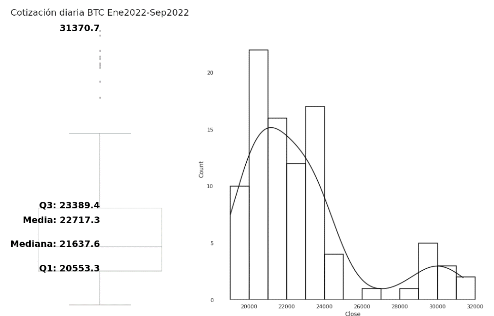

**Datos del gráfico:**
- Cotización diaria BTC: Ene2022-Sep2022
- Valor superior: 31370.7
- Q3: 23389.4
- Media: 22717.3
- Mediana: 21637.6
- Q1: 20553.3

Indicar si las siguientes afirmaciones son verdaderas o falsas justificando su respuesta. Sin justificación o mal justificado la respuesta se considerará no válida.

**A)** "La distribución de la cotización es simétrica"

**B)** "Si el coeficiente de curtosis es 1.46 entonces la distribución de las cotizaciones es leptocúrtica"

**C)** "El 25% superior de las cotizaciones se encuentra por encima de 23389.4"

**D)** "El valor 31370.7 que se observa es atípico severo"

### Datos del problema

In [657]:
# Datos del boxplot y resumen estadístico
valor_superior_ej18 = 31370.7
q3_ej18 = 23389.4
media_ej18 = 22717.3
mediana_ej18 = 21637.6
q1_ej18 = 20553.3

# Cálculos adicionales
rango_intercuartilico_ej18 = q3_ej18 - q1_ej18

print("=" * 60)
print("📊 EJERCICIO 18 - ANÁLISIS BOXPLOT Y DISTRIBUCIÓN BTC")
print("=" * 60)
print()
print("Datos del boxplot:")
print(f"Valor superior: {valor_superior_ej18:.1f}")
print(f"Q3 (Tercer cuartil): {q3_ej18:.1f}")
print(f"Media: {media_ej18:.1f}")
print(f"Mediana (Q2): {mediana_ej18:.1f}")
print(f"Q1 (Primer cuartil): {q1_ej18:.1f}")
print()
print(f"Rango intercuartílico (IQR): {rango_intercuartilico_ej18:.1f}")
print("=" * 60)

📊 EJERCICIO 18 - ANÁLISIS BOXPLOT Y DISTRIBUCIÓN BTC

Datos del boxplot:
Valor superior: 31370.7
Q3 (Tercer cuartil): 23389.4
Media: 22717.3
Mediana (Q2): 21637.6
Q1 (Primer cuartil): 20553.3

Rango intercuartílico (IQR): 2836.1


### Inciso A) "La distribución de la cotización es simétrica"

In [658]:
# Análisis de simetría
# En una distribución simétrica: Media = Mediana

diferencia_media_mediana_ej18 = media_ej18 - mediana_ej18

# También analizamos las distancias de los cuartiles respecto a la mediana
distancia_q1_mediana_ej18 = mediana_ej18 - q1_ej18
distancia_q3_mediana_ej18 = q3_ej18 - mediana_ej18

print("=" * 60)
print("📐 INCISO A - Análisis de Simetría")
print("=" * 60)
print()
print("En una distribución simétrica se cumple:")
print("1. Media = Mediana")
print("2. Distancias simétricas de Q1 y Q3 respecto a la mediana")
print()
print("Verificación:")
print(f"Media: {media_ej18:.1f}")
print(f"Mediana: {mediana_ej18:.1f}")
print(f"Diferencia (Media - Mediana): {diferencia_media_mediana_ej18:.1f}")
print()
print("Distancias respecto a la mediana:")
print(f"Mediana - Q1: {distancia_q1_mediana_ej18:.1f}")
print(f"Q3 - Mediana: {distancia_q3_mediana_ej18:.1f}")
print(f"Diferencia: {distancia_q3_mediana_ej18 - distancia_q1_mediana_ej18:.1f}")
print()
print("CONCLUSIÓN:")
print("La distribución es ASIMÉTRICA POSITIVA (sesgada a la derecha)")
print("porque:")
print("- Media > Mediana (cola derecha alarga la distribución)")
print("- Q3 está más alejado de la mediana que Q1")
print()
print("RESPUESTA: FALSO ❌")
print("=" * 60)

📐 INCISO A - Análisis de Simetría

En una distribución simétrica se cumple:
1. Media = Mediana
2. Distancias simétricas de Q1 y Q3 respecto a la mediana

Verificación:
Media: 22717.3
Mediana: 21637.6
Diferencia (Media - Mediana): 1079.7

Distancias respecto a la mediana:
Mediana - Q1: 1084.3
Q3 - Mediana: 1751.8
Diferencia: 667.5

CONCLUSIÓN:
La distribución es ASIMÉTRICA POSITIVA (sesgada a la derecha)
porque:
- Media > Mediana (cola derecha alarga la distribución)
- Q3 está más alejado de la mediana que Q1

RESPUESTA: FALSO ❌


### Inciso B) "Si el coeficiente de curtosis es 1.46 entonces la distribución de las cotizaciones es leptocúrtica"

In [659]:
# Análisis de curtosis
curtosis_ej18 = 1.46

print("=" * 60)
print("📐 INCISO B - Análisis de Curtosis")
print("=" * 60)
print()
print("Clasificación según curtosis:")
print("- Leptocúrtica: Curtosis > 3 (más puntiaguda que la normal)")
print("- Mesocúrtica: Curtosis = 3 (igual que la normal)")
print("- Platicúrtica: Curtosis < 3 (más achatada que la normal)")
print()
print(f"Curtosis dada: {curtosis_ej18:.2f}")
print()
print("CONCLUSIÓN:")
print(f"Como {curtosis_ej18:.2f} < 3, la distribución es PLATICÚRTICA")
print("(más achatada que la distribución normal)")
print()
print("RESPUESTA: FALSO ❌")
print("La distribución NO es leptocúrtica, es platicúrtica.")
print("=" * 60)

📐 INCISO B - Análisis de Curtosis

Clasificación según curtosis:
- Leptocúrtica: Curtosis > 3 (más puntiaguda que la normal)
- Mesocúrtica: Curtosis = 3 (igual que la normal)
- Platicúrtica: Curtosis < 3 (más achatada que la normal)

Curtosis dada: 1.46

CONCLUSIÓN:
Como 1.46 < 3, la distribución es PLATICÚRTICA
(más achatada que la distribución normal)

RESPUESTA: FALSO ❌
La distribución NO es leptocúrtica, es platicúrtica.


### Inciso C) "El 25% superior de las cotizaciones se encuentra por encima de 23389.4"

In [660]:
# Análisis del tercer cuartil
# Q3 separa el 75% inferior del 25% superior

print("=" * 60)
print("📐 INCISO C - Análisis del Tercer Cuartil (Q3)")
print("=" * 60)
print()
print("Definición de cuartiles:")
print("- Q1: Deja el 25% de los datos por debajo")
print("- Q2 (Mediana): Deja el 50% de los datos por debajo")
print("- Q3: Deja el 75% de los datos por debajo")
print()
print("Por lo tanto:")
print("- Q3 separa el 75% inferior del 25% superior")
print()
print(f"Q3 = {q3_ej18:.1f}")
print()
print("CONCLUSIÓN:")
print(f"El 25% superior de las cotizaciones se encuentra")
print(f"POR ENCIMA de {q3_ej18:.1f}")
print()
print("RESPUESTA: VERDADERO ✅")
print("=" * 60)

📐 INCISO C - Análisis del Tercer Cuartil (Q3)

Definición de cuartiles:
- Q1: Deja el 25% de los datos por debajo
- Q2 (Mediana): Deja el 50% de los datos por debajo
- Q3: Deja el 75% de los datos por debajo

Por lo tanto:
- Q3 separa el 75% inferior del 25% superior

Q3 = 23389.4

CONCLUSIÓN:
El 25% superior de las cotizaciones se encuentra
POR ENCIMA de 23389.4

RESPUESTA: VERDADERO ✅


### Inciso D) "El valor 31370.7 que se observa es atípico severo"

In [661]:
# Análisis de valores atípicos
# Límites para valores atípicos:
# Atípico moderado: Q3 + 1.5×IQR < valor ≤ Q3 + 3×IQR
# Atípico severo: valor > Q3 + 3×IQR

limite_atipico_moderado_ej18 = q3_ej18 + 1.5 * rango_intercuartilico_ej18
limite_atipico_severo_ej18 = q3_ej18 + 3 * rango_intercuartilico_ej18

# Verificación del valor 31370.7
es_atipico_moderado_ej18 = valor_superior_ej18 > limite_atipico_moderado_ej18
es_atipico_severo_ej18 = valor_superior_ej18 > limite_atipico_severo_ej18

print("=" * 60)
print("📐 INCISO D - Análisis de Valores Atípicos")
print("=" * 60)
print()
print("Criterio para valores atípicos (outliers):")
print("- Atípico moderado: Q3 + 1.5×IQR < valor ≤ Q3 + 3×IQR")
print("- Atípico severo: valor > Q3 + 3×IQR")
print()
print(f"IQR = {rango_intercuartilico_ej18:.1f}")
print(f"Q3 = {q3_ej18:.1f}")
print()
print("Límites:")
print(f"Límite atípico moderado: Q3 + 1.5×IQR = {q3_ej18:.1f} + {1.5*rango_intercuartilico_ej18:.1f} = {limite_atipico_moderado_ej18:.1f}")
print(f"Límite atípico severo: Q3 + 3×IQR = {q3_ej18:.1f} + {3*rango_intercuartilico_ej18:.1f} = {limite_atipico_severo_ej18:.1f}")
print()
print(f"Valor observado: {valor_superior_ej18:.1f}")
print()
print("Verificación:")
print(f"¿Es atípico moderado? {valor_superior_ej18:.1f} > {limite_atipico_moderado_ej18:.1f}: {es_atipico_moderado_ej18}")
print(f"¿Es atípico severo? {valor_superior_ej18:.1f} > {limite_atipico_severo_ej18:.1f}: {es_atipico_severo_ej18}")
print()
print("CONCLUSIÓN:")
print(f"El valor {valor_superior_ej18:.1f} es ATÍPICO MODERADO, NO severo")
print(f"porque está entre {limite_atipico_moderado_ej18:.1f} y {limite_atipico_severo_ej18:.1f}")
print()
print("RESPUESTA: FALSO ❌")
print("=" * 60)

📐 INCISO D - Análisis de Valores Atípicos

Criterio para valores atípicos (outliers):
- Atípico moderado: Q3 + 1.5×IQR < valor ≤ Q3 + 3×IQR
- Atípico severo: valor > Q3 + 3×IQR

IQR = 2836.1
Q3 = 23389.4

Límites:
Límite atípico moderado: Q3 + 1.5×IQR = 23389.4 + 4254.2 = 27643.6
Límite atípico severo: Q3 + 3×IQR = 23389.4 + 8508.3 = 31897.7

Valor observado: 31370.7

Verificación:
¿Es atípico moderado? 31370.7 > 27643.6: True
¿Es atípico severo? 31370.7 > 31897.7: False

CONCLUSIÓN:
El valor 31370.7 es ATÍPICO MODERADO, NO severo
porque está entre 27643.6 y 31897.7

RESPUESTA: FALSO ❌


### Resumen Ejercicio 18

In [662]:
print("=" * 60)
print("📋 RESUMEN EJERCICIO 18 - VERDADERO/FALSO")
print("=" * 60)
print()
print("A) 'La distribución de la cotización es simétrica'")
print("   FALSO ❌")
print("   Justificación: Media > Mediana indica asimetría positiva")
print("                  Q3 más alejado de mediana que Q1")
print()
print("B) 'Si curtosis = 1.46 entonces es leptocúrtica'")
print("   FALSO ❌")
print("   Justificación: Curtosis < 3 → Platicúrtica")
print("                  (más achatada que la normal)")
print()
print("C) 'El 25% superior está por encima de 23389.4'")
print("   VERDADERO ✅")
print("   Justificación: Q3 separa el 75% inferior del 25% superior")
print()
print("D) 'El valor 31370.7 es atípico severo'")
print("   FALSO ❌")
print("   Justificación: 31370.7 < Q3 + 3×IQR (31897.7)")
print("                  Es atípico moderado, no severo")
print()
print("RESULTADO FINAL: 1 VERDADERA, 3 FALSAS")
print("=" * 60)

📋 RESUMEN EJERCICIO 18 - VERDADERO/FALSO

A) 'La distribución de la cotización es simétrica'
   FALSO ❌
   Justificación: Media > Mediana indica asimetría positiva
                  Q3 más alejado de mediana que Q1

B) 'Si curtosis = 1.46 entonces es leptocúrtica'
   FALSO ❌
   Justificación: Curtosis < 3 → Platicúrtica
                  (más achatada que la normal)

C) 'El 25% superior está por encima de 23389.4'
   VERDADERO ✅
   Justificación: Q3 separa el 75% inferior del 25% superior

D) 'El valor 31370.7 es atípico severo'
   FALSO ❌
   Justificación: 31370.7 < Q3 + 3×IQR (31897.7)
                  Es atípico moderado, no severo

RESULTADO FINAL: 1 VERDADERA, 3 FALSAS


# Ejercicio 19 - Distribución Binomial (Programa de Radio)

**Enunciado:**

El 30% de individuos de una ciudad escucha un programa de radio. Desde el concurso que se realiza en este se llama por teléfono a 10 personas del pueblo elegidas al azar. Calcular la probabilidad de que, entre las 10 personas, estuvieran escuchando el programa:

**A)** Más de ocho personas. Previamente definir qué está representando la variable, de qué tipo es y cuál es su distribución.

**B)** ¿Cuántas personas se espera que estén escuchando el programa?

### Datos del problema y definición de la variable

In [663]:
# Datos del problema
p_escucha_ej19 = 0.30  # Probabilidad de que una persona escuche el programa
n_ej19 = 10  # Número de personas llamadas
q_ej19 = 1 - p_escucha_ej19  # Probabilidad de que NO escuchen

print("=" * 60)
print("📊 EJERCICIO 19 - DISTRIBUCIÓN BINOMIAL")
print("=" * 60)
print()
print("Contexto:")
print("- 30% de individuos escucha un programa de radio")
print("- Se llama a 10 personas elegidas al azar")
print()
print("Definición de la variable aleatoria:")
print("X: 'Cantidad de personas (entre las 10 llamadas) que")
print("    estaban escuchando el programa'")
print()
print("Tipo de variable:")
print("- Variable aleatoria DISCRETA")
print("- Toma valores: X ∈ {0, 1, 2, ..., 10}")
print()
print("Distribución:")
print("X ~ Bi(n, p)")
print(f"X ~ Bi({n_ej19}, {p_escucha_ej19})")
print()
print("Parámetros:")
print(f"n = {n_ej19} (número de ensayos/personas)")
print(f"p = {p_escucha_ej19} (probabilidad de éxito)")
print(f"q = {q_ej19} (probabilidad de fracaso)")
print("=" * 60)

📊 EJERCICIO 19 - DISTRIBUCIÓN BINOMIAL

Contexto:
- 30% de individuos escucha un programa de radio
- Se llama a 10 personas elegidas al azar

Definición de la variable aleatoria:
X: 'Cantidad de personas (entre las 10 llamadas) que
    estaban escuchando el programa'

Tipo de variable:
- Variable aleatoria DISCRETA
- Toma valores: X ∈ {0, 1, 2, ..., 10}

Distribución:
X ~ Bi(n, p)
X ~ Bi(10, 0.3)

Parámetros:
n = 10 (número de ensayos/personas)
p = 0.3 (probabilidad de éxito)
q = 0.7 (probabilidad de fracaso)


### Inciso A) P(X > 8) - Más de ocho personas

In [664]:
# Inciso A: P(X > 8) = P(X = 9) + P(X = 10)

# Usando scipy
p_x_9_ej19 = binom.pmf(9, n_ej19, p_escucha_ej19)
p_x_10_ej19 = binom.pmf(10, n_ej19, p_escucha_ej19)
p_mayor_8_ej19 = p_x_9_ej19 + p_x_10_ej19

# Verificación con sf (survival function: P(X > k) = 1 - P(X ≤ k))
p_mayor_8_scipy_ej19 = binom.sf(8, n_ej19, p_escucha_ej19)

print("=" * 60)
print("📐 INCISO A - P(X > 8)")
print("=" * 60)
print()
print("Queremos: P(X > 8)")
print("P(X > 8) = P(X = 9) + P(X = 10)")
print()
print("Cálculo con scipy.stats.binom:")
print(f"P(X = 9) = {p_x_9_ej19:.10f}")
print(f"P(X = 10) = {p_x_10_ej19:.10f}")
print()
print(f"P(X > 8) = {p_x_9_ej19:.10f} + {p_x_10_ej19:.10f}")
print(f"P(X > 8) = {p_mayor_8_ej19:.10f}")
print()
print(f"En notación científica: {p_mayor_8_ej19:.6e}")
print(f"Redondeado a 4 decimales: {p_mayor_8_ej19:.4f}")
print()
print(f"Verificación con sf: {p_mayor_8_scipy_ej19:.10f}")
print("=" * 60)

📐 INCISO A - P(X > 8)

Queremos: P(X > 8)
P(X > 8) = P(X = 9) + P(X = 10)

Cálculo con scipy.stats.binom:
P(X = 9) = 0.0001377810
P(X = 10) = 0.0000059049

P(X > 8) = 0.0001377810 + 0.0000059049
P(X > 8) = 0.0001436859

En notación científica: 1.436859e-04
Redondeado a 4 decimales: 0.0001

Verificación con sf: 0.0001436859


### Verificación manual del Inciso A

In [665]:
# Verificación manual: P(X = k) = C(n,k) × p^k × q^(n-k)
from scipy.special import comb as comb_scipy

# P(X = 9)
comb_9_ej19 = int(comb_scipy(n_ej19, 9, exact=True))
p_x_9_manual_ej19 = comb_9_ej19 * (p_escucha_ej19**9) * (q_ej19**(n_ej19-9))

# P(X = 10)
comb_10_ej19 = int(comb_scipy(n_ej19, 10, exact=True))
p_x_10_manual_ej19 = comb_10_ej19 * (p_escucha_ej19**10) * (q_ej19**(n_ej19-10))

# P(X > 8)
p_mayor_8_manual_ej19 = p_x_9_manual_ej19 + p_x_10_manual_ej19

print("=" * 60)
print("📐 VERIFICACIÓN MANUAL - Fórmula Binomial")
print("=" * 60)
print()
print("Fórmula: P(X = k) = C(n,k) × p^k × q^(n-k)")
print()
print("P(X = 9):")
print(f"C(10,9) = {comb_9_ej19}")
print(f"P(X = 9) = {comb_9_ej19} × (0.3)^9 × (0.7)^1")
print(f"P(X = 9) = {comb_9_ej19} × {p_escucha_ej19**9:.15f} × {q_ej19**1:.1f}")
print(f"P(X = 9) = {p_x_9_manual_ej19:.10f}")
print()
print("P(X = 10):")
print(f"C(10,10) = {comb_10_ej19}")
print(f"P(X = 10) = {comb_10_ej19} × (0.3)^10 × (0.7)^0")
print(f"P(X = 10) = {comb_10_ej19} × {p_escucha_ej19**10:.15f} × {q_ej19**0:.1f}")
print(f"P(X = 10) = {p_x_10_manual_ej19:.10f}")
print()
print("P(X > 8) = P(X = 9) + P(X = 10):")
print(f"P(X > 8) = {p_x_9_manual_ej19:.10f} + {p_x_10_manual_ej19:.10f}")
print(f"P(X > 8) = {p_mayor_8_manual_ej19:.10f}")
print()
print(f"En notación científica: {p_mayor_8_manual_ej19:.6e}")
print(f"Aproximado: {p_mayor_8_manual_ej19:.4f}")
print("=" * 60)

📐 VERIFICACIÓN MANUAL - Fórmula Binomial

Fórmula: P(X = k) = C(n,k) × p^k × q^(n-k)

P(X = 9):
C(10,9) = 10
P(X = 9) = 10 × (0.3)^9 × (0.7)^1
P(X = 9) = 10 × 0.000019683000000 × 0.7
P(X = 9) = 0.0001377810

P(X = 10):
C(10,10) = 1
P(X = 10) = 1 × (0.3)^10 × (0.7)^0
P(X = 10) = 1 × 0.000005904900000 × 1.0
P(X = 10) = 0.0000059049

P(X > 8) = P(X = 9) + P(X = 10):
P(X > 8) = 0.0001377810 + 0.0000059049
P(X > 8) = 0.0001436859

En notación científica: 1.436859e-04
Aproximado: 0.0001


### Inciso B) Esperanza - ¿Cuántas personas se espera que estén escuchando?

In [666]:
# Inciso B: Esperanza de la distribución binomial
# E(X) = n × p

e_x_ej19 = n_ej19 * p_escucha_ej19

# Verificación con scipy
e_x_scipy_ej19 = binom.mean(n_ej19, p_escucha_ej19)

print("=" * 60)
print("📐 INCISO B - Esperanza E(X)")
print("=" * 60)
print()
print("Para una distribución Binomial X ~ Bi(n, p):")
print("E(X) = n × p")
print()
print("Cálculo:")
print(f"E(X) = {n_ej19} × {p_escucha_ej19}")
print(f"E(X) = {e_x_ej19:.2f}")
print()
print("Interpretación:")
print(f"Se espera que {int(e_x_ej19)} personas (de las 10 llamadas)")
print("estén escuchando el programa de radio.")
print()
print(f"Verificación con scipy: E(X) = {e_x_scipy_ej19:.2f}")
print("=" * 60)

📐 INCISO B - Esperanza E(X)

Para una distribución Binomial X ~ Bi(n, p):
E(X) = n × p

Cálculo:
E(X) = 10 × 0.3
E(X) = 3.00

Interpretación:
Se espera que 3 personas (de las 10 llamadas)
estén escuchando el programa de radio.

Verificación con scipy: E(X) = 3.00


### Resumen Ejercicio 19

In [667]:
print("=" * 60)
print("📋 RESUMEN EJERCICIO 19 - DISTRIBUCIÓN BINOMIAL")
print("=" * 60)
print()
print("Variable aleatoria:")
print("X: Cantidad de personas (de 10) que estaban escuchando")
print("   el programa de radio")
print()
print("Tipo: Variable aleatoria DISCRETA")
print()
print("Distribución: X ~ Bi(10, 0.30)")
print()
print("A) P(X > 8) = P(más de 8 personas escuchando)")
print(f"   RESULTADO: {p_mayor_8_ej19:.10f}")
print(f"   Notación científica: {p_mayor_8_ej19:.6e}")
print(f"   Aproximado: {p_mayor_8_ej19:.4f}")
print()
print("B) E(X) = Cantidad esperada de personas escuchando")
print(f"   RESULTADO: {e_x_ej19:.0f} personas")
print()
print("=" * 60)

📋 RESUMEN EJERCICIO 19 - DISTRIBUCIÓN BINOMIAL

Variable aleatoria:
X: Cantidad de personas (de 10) que estaban escuchando
   el programa de radio

Tipo: Variable aleatoria DISCRETA

Distribución: X ~ Bi(10, 0.30)

A) P(X > 8) = P(más de 8 personas escuchando)
   RESULTADO: 0.0001436859
   Notación científica: 1.436859e-04
   Aproximado: 0.0001

B) E(X) = Cantidad esperada de personas escuchando
   RESULTADO: 3 personas



# Ejercicio 20 - Media y Varianza de W = 4X - 2Y

Dadas las siguientes probabilidades conjuntas:

- $P(X=0, Y=0) = 0.25$
- $P(X=0, Y=1) = 0.30$
- $P(X=1, Y=0) = 0.25$
- $P(X=1, Y=1) = 0.20$

Calcule la media y la varianza de la variable aleatoria $W = 4X - 2Y$

### Paso 1: Definir la distribución conjunta

In [668]:
# Distribución conjunta P(X, Y)
import pandas as pd
import numpy as np

# Valores de X e Y
x_vals_ej20 = np.array([0, 1])
y_vals_ej20 = np.array([0, 1])

# Tabla de probabilidades conjuntas
p_conjunta_ej20 = np.array([
    [0.25, 0.30],  # X=0, Y=0 y Y=1
    [0.25, 0.20]   # X=1, Y=0 y Y=1
])

# Crear DataFrame para visualización
tabla_conjunta_ej20 = pd.DataFrame(
    p_conjunta_ej20,
    index=[f'X={x}' for x in x_vals_ej20],
    columns=[f'Y={y}' for y in y_vals_ej20]
)

print("=" * 60)
print("📊 EJERCICIO 20 - TRANSFORMACIÓN LINEAL W = 4X - 2Y")
print("=" * 60)
print()
print("Distribución conjunta P(X, Y):")
print(tabla_conjunta_ej20)
print()
print(f"Suma de probabilidades: {p_conjunta_ej20.sum():.2f}")
print("=" * 60)

📊 EJERCICIO 20 - TRANSFORMACIÓN LINEAL W = 4X - 2Y

Distribución conjunta P(X, Y):
      Y=0  Y=1
X=0  0.25  0.3
X=1  0.25  0.2

Suma de probabilidades: 1.00


### Paso 2: Calcular distribuciones marginales

In [669]:
# Distribuciones marginales
# P(X = x) = suma sobre todos los valores de Y
p_x_ej20 = p_conjunta_ej20.sum(axis=1)  # Suma por filas

# P(Y = y) = suma sobre todos los valores de X
p_y_ej20 = p_conjunta_ej20.sum(axis=0)  # Suma por columnas

print("=" * 60)
print("📐 DISTRIBUCIONES MARGINALES")
print("=" * 60)
print()
print("P(X):")
for i, x in enumerate(x_vals_ej20):
    print(f"P(X = {x}) = {p_x_ej20[i]:.2f}")
print()
print("P(Y):")
for j, y in enumerate(y_vals_ej20):
    print(f"P(Y = {y}) = {p_y_ej20[j]:.2f}")
print("=" * 60)

📐 DISTRIBUCIONES MARGINALES

P(X):
P(X = 0) = 0.55
P(X = 1) = 0.45

P(Y):
P(Y = 0) = 0.50
P(Y = 1) = 0.50

📐 DISTRIBUCIONES MARGINALES

P(X):
P(X = 0) = 0.55
P(X = 1) = 0.45

P(Y):
P(Y = 0) = 0.50
P(Y = 1) = 0.50


### Paso 3: Calcular E(X), E(Y), E(X²), E(Y²) y E(XY)

In [670]:
# Esperanzas
e_x_ej20 = np.sum(x_vals_ej20 * p_x_ej20)
e_y_ej20 = np.sum(y_vals_ej20 * p_y_ej20)

# Esperanzas de los cuadrados
e_x2_ej20 = np.sum((x_vals_ej20**2) * p_x_ej20)
e_y2_ej20 = np.sum((y_vals_ej20**2) * p_y_ej20)

# E(XY) usando la distribución conjunta
e_xy_ej20 = 0
for i, x in enumerate(x_vals_ej20):
    for j, y in enumerate(y_vals_ej20):
        e_xy_ej20 += x * y * p_conjunta_ej20[i, j]

print("=" * 60)
print("📐 ESPERANZAS")
print("=" * 60)
print()
print(f"E(X) = {e_x_ej20:.2f}")
print(f"E(Y) = {e_y_ej20:.2f}")
print(f"E(X²) = {e_x2_ej20:.2f}")
print(f"E(Y²) = {e_y2_ej20:.2f}")
print(f"E(XY) = {e_xy_ej20:.2f}")
print("=" * 60)

📐 ESPERANZAS

E(X) = 0.45
E(Y) = 0.50
E(X²) = 0.45
E(Y²) = 0.50
E(XY) = 0.20


### Paso 4: Calcular V(X), V(Y) y Cov(X, Y)

In [671]:
# Varianzas
# V(X) = E(X²) - [E(X)]²
v_x_ej20 = e_x2_ej20 - (e_x_ej20**2)

# V(Y) = E(Y²) - [E(Y)]²
v_y_ej20 = e_y2_ej20 - (e_y_ej20**2)

# Covarianza
# Cov(X,Y) = E(XY) - E(X)×E(Y)
cov_xy_ej20 = e_xy_ej20 - (e_x_ej20 * e_y_ej20)

print("=" * 60)
print("📐 VARIANZAS Y COVARIANZA")
print("=" * 60)
print()
print(f"V(X) = E(X²) - [E(X)]²")
print(f"V(X) = {e_x2_ej20:.2f} - ({e_x_ej20:.2f})²")
print(f"V(X) = {e_x2_ej20:.2f} - {e_x_ej20**2:.4f}")
print(f"V(X) = {v_x_ej20:.4f}")
print()
print(f"V(Y) = E(Y²) - [E(Y)]²")
print(f"V(Y) = {e_y2_ej20:.2f} - ({e_y_ej20:.2f})²")
print(f"V(Y) = {e_y2_ej20:.2f} - {e_y_ej20**2:.4f}")
print(f"V(Y) = {v_y_ej20:.4f}")
print()
print(f"Cov(X,Y) = E(XY) - E(X)×E(Y)")
print(f"Cov(X,Y) = {e_xy_ej20:.2f} - {e_x_ej20:.2f}×{e_y_ej20:.2f}")
print(f"Cov(X,Y) = {e_xy_ej20:.2f} - {e_x_ej20 * e_y_ej20:.4f}")
print(f"Cov(X,Y) = {cov_xy_ej20:.4f}")
print("=" * 60)

📐 VARIANZAS Y COVARIANZA

V(X) = E(X²) - [E(X)]²
V(X) = 0.45 - (0.45)²
V(X) = 0.45 - 0.2025
V(X) = 0.2475

V(Y) = E(Y²) - [E(Y)]²
V(Y) = 0.50 - (0.50)²
V(Y) = 0.50 - 0.2500
V(Y) = 0.2500

Cov(X,Y) = E(XY) - E(X)×E(Y)
Cov(X,Y) = 0.20 - 0.45×0.50
Cov(X,Y) = 0.20 - 0.2250
Cov(X,Y) = -0.0250


### Paso 5: Calcular E(W) y V(W) para W = 4X - 2Y

In [672]:
# Para W = 4X - 2Y
# E(W) = E(4X - 2Y) = 4E(X) - 2E(Y)
e_w_ej20 = 4 * e_x_ej20 - 2 * e_y_ej20

# V(W) = V(4X - 2Y) = 4²V(X) + (-2)²V(Y) + 2×4×(-2)×Cov(X,Y)
# V(W) = 16V(X) + 4V(Y) - 16Cov(X,Y)
v_w_ej20 = (4**2) * v_x_ej20 + ((-2)**2) * v_y_ej20 + 2 * 4 * (-2) * cov_xy_ej20

print("=" * 60)
print("📐 TRANSFORMACIÓN LINEAL W = 4X - 2Y")
print("=" * 60)
print()
print("ESPERANZA E(W):")
print("E(W) = E(4X - 2Y)")
print("E(W) = 4E(X) - 2E(Y)")
print(f"E(W) = 4×{e_x_ej20:.2f} - 2×{e_y_ej20:.2f}")
print(f"E(W) = {4*e_x_ej20:.2f} - {2*e_y_ej20:.2f}")
print(f"E(W) = {e_w_ej20:.2f}")
print()
print("VARIANZA V(W):")
print("V(W) = V(4X - 2Y)")
print("V(W) = 4²V(X) + (-2)²V(Y) + 2×4×(-2)×Cov(X,Y)")
print("V(W) = 16V(X) + 4V(Y) - 16Cov(X,Y)")
print(f"V(W) = 16×{v_x_ej20:.4f} + 4×{v_y_ej20:.4f} - 16×{cov_xy_ej20:.4f}")
print(f"V(W) = {16*v_x_ej20:.4f} + {4*v_y_ej20:.4f} - {16*cov_xy_ej20:.4f}")
print(f"V(W) = {16*v_x_ej20:.4f} + {4*v_y_ej20:.4f} + {-16*cov_xy_ej20:.4f}")
print(f"V(W) = {v_w_ej20:.2f}")
print()
print("=" * 60)
print("📋 RESULTADOS FINALES")
print("=" * 60)
print(f"E(W) = {e_w_ej20:.2f}")
print(f"V(W) = {v_w_ej20:.2f}")
print("=" * 60)

📐 TRANSFORMACIÓN LINEAL W = 4X - 2Y

ESPERANZA E(W):
E(W) = E(4X - 2Y)
E(W) = 4E(X) - 2E(Y)
E(W) = 4×0.45 - 2×0.50
E(W) = 1.80 - 1.00
E(W) = 0.80

VARIANZA V(W):
V(W) = V(4X - 2Y)
V(W) = 4²V(X) + (-2)²V(Y) + 2×4×(-2)×Cov(X,Y)
V(W) = 16V(X) + 4V(Y) - 16Cov(X,Y)
V(W) = 16×0.2475 + 4×0.2500 - 16×-0.0250
V(W) = 3.9600 + 1.0000 - -0.4000
V(W) = 3.9600 + 1.0000 + 0.4000
V(W) = 5.36

📋 RESULTADOS FINALES
E(W) = 0.80
V(W) = 5.36


### Verificación: Cálculo directo de E(W) y V(W)

In [673]:
# Verificación: cálculo directo desde la distribución conjunta
# W = 4X - 2Y

# Calcular todos los valores de W y sus probabilidades
valores_w = []
prob_w = []

for i, x in enumerate(x_vals_ej20):
    for j, y in enumerate(y_vals_ej20):
        w = 4*x - 2*y
        p = p_conjunta_ej20[i, j]
        valores_w.append(w)
        prob_w.append(p)
        
# Crear tabla de distribución de W
tabla_w = pd.DataFrame({
    'X': [0, 0, 1, 1],
    'Y': [0, 1, 0, 1],
    'W = 4X - 2Y': valores_w,
    'P(X,Y)': prob_w
})

print("=" * 60)
print("📐 VERIFICACIÓN - Cálculo directo")
print("=" * 60)
print()
print("Distribución de W = 4X - 2Y:")
print(tabla_w)
print()

# E(W) directo
e_w_directo = sum([w * p for w, p in zip(valores_w, prob_w)])

# E(W²) para calcular V(W)
e_w2_directo = sum([(w**2) * p for w, p in zip(valores_w, prob_w)])

# V(W) = E(W²) - [E(W)]²
v_w_directo = e_w2_directo - (e_w_directo**2)

print(f"E(W) directo = {e_w_directo:.2f}")
print(f"E(W²) directo = {e_w2_directo:.2f}")
print(f"V(W) directo = {e_w2_directo:.2f} - ({e_w_directo:.2f})²")
print(f"V(W) directo = {e_w2_directo:.2f} - {e_w_directo**2:.2f}")
print(f"V(W) directo = {v_w_directo:.2f}")
print("=" * 60)

📐 VERIFICACIÓN - Cálculo directo

Distribución de W = 4X - 2Y:
   X  Y  W = 4X - 2Y  P(X,Y)
0  0  0            0    0.25
1  0  1           -2    0.30
2  1  0            4    0.25
3  1  1            2    0.20

E(W) directo = 0.80
E(W²) directo = 6.00
V(W) directo = 6.00 - (0.80)²
V(W) directo = 6.00 - 0.64
V(W) directo = 5.36


### Resumen y análisis de resultados

In [674]:
print("=" * 60)
print("📋 RESUMEN EJERCICIO 20 - W = 4X - 2Y")
print("=" * 60)
print()
print("Datos previos calculados:")
print(f"E(X) = {e_x_ej20:.2f}")
print(f"E(Y) = {e_y_ej20:.2f}")
print(f"V(X) = {v_x_ej20:.4f}")
print(f"V(Y) = {v_y_ej20:.4f}")
print(f"Cov(X,Y) = {cov_xy_ej20:.4f}")
print()
print("Fórmulas para transformación lineal W = aX + bY:")
print("E(W) = aE(X) + bE(Y)")
print("V(W) = a²V(X) + b²V(Y) + 2ab×Cov(X,Y)")
print()
print("Para W = 4X - 2Y (a=4, b=-2):")
print()
print("ESPERANZA:")
print(f"E(W) = 4×{e_x_ej20:.2f} - 2×{e_y_ej20:.2f}")
print(f"E(W) = {e_w_ej20:.2f} ✅")
print()
print("VARIANZA:")
print(f"V(W) = 16×{v_x_ej20:.4f} + 4×{v_y_ej20:.4f} - 16×{cov_xy_ej20:.4f}")
print(f"V(W) = {16*v_x_ej20:.2f} + {4*v_y_ej20:.2f} + {-16*cov_xy_ej20:.2f}")
print(f"V(W) = {v_w_ej20:.2f} ✅")
print()
print("=" * 60)
print("ANÁLISIS DE RESULTADOS")
print("=" * 60)
print()
print("Tu resultado E(X) = 0.8 ✅ CORRECTO")
print()
print("Tu resultado V(X) = 4.96 ❌ INCORRECTO")
print(f"Resultado correcto: V(W) = 5.36")
print()
print("Posible error:")
print("Si calculaste V(W) = 16×V(X) + 4×V(Y) SIN el término")
print("de covarianza, obtendrías:")
print(f"V(W) sin Cov = {16*v_x_ej20 + 4*v_y_ej20:.2f}")
print()
print("El término de covarianza es ESENCIAL:")
print(f"-16×Cov(X,Y) = -16×({cov_xy_ej20:.4f}) = {-16*cov_xy_ej20:.2f}")
print()
print("Nota: Como Cov(X,Y) es negativa (-0.025), el término")
print("-16×Cov(X,Y) es POSITIVO (+0.40), lo que AUMENTA la varianza")
print("=" * 60)

📋 RESUMEN EJERCICIO 20 - W = 4X - 2Y

Datos previos calculados:
E(X) = 0.45
E(Y) = 0.50
V(X) = 0.2475
V(Y) = 0.2500
Cov(X,Y) = -0.0250

Fórmulas para transformación lineal W = aX + bY:
E(W) = aE(X) + bE(Y)
V(W) = a²V(X) + b²V(Y) + 2ab×Cov(X,Y)

Para W = 4X - 2Y (a=4, b=-2):

ESPERANZA:
E(W) = 4×0.45 - 2×0.50
E(W) = 0.80 ✅

VARIANZA:
V(W) = 16×0.2475 + 4×0.2500 - 16×-0.0250
V(W) = 3.96 + 1.00 + 0.40
V(W) = 5.36 ✅

ANÁLISIS DE RESULTADOS

Tu resultado E(X) = 0.8 ✅ CORRECTO

Tu resultado V(X) = 4.96 ❌ INCORRECTO
Resultado correcto: V(W) = 5.36

Posible error:
Si calculaste V(W) = 16×V(X) + 4×V(Y) SIN el término
de covarianza, obtendrías:
V(W) sin Cov = 4.96

El término de covarianza es ESENCIAL:
-16×Cov(X,Y) = -16×(-0.0250) = 0.40

Nota: Como Cov(X,Y) es negativa (-0.025), el término
-16×Cov(X,Y) es POSITIVO (+0.40), lo que AUMENTA la varianza


---

## 📚 TEORÍA: Transformaciones Lineales de Variables Aleatorias

Esta sección explica cómo calcular la esperanza y varianza de transformaciones lineales de la forma **W = aX + bY**, con énfasis en la **covarianza** y la **esperanza conjunta E(XY)**.

### 1️⃣ Esperanza de una transformación lineal

#### **Propiedad fundamental**

Para variables aleatorias **X** e **Y** cualesquiera y constantes **a** y **b**:

$$E(aX + bY) = aE(X) + bE(Y)$$

**¿Qué significa esta propiedad?**

- La esperanza es un **operador lineal**
- Podemos "sacar" las constantes multiplicativas
- Podemos separar la suma en esperanzas individuales
- **No importa si X e Y son independientes o no**

#### **Demostración intuitiva**

Para variables discretas:

$$E(aX + bY) = \sum_i \sum_j (ax_i + by_j) \cdot P(X=x_i, Y=y_j)$$

Distribuyendo:

$$= \sum_i \sum_j ax_i \cdot P(X=x_i, Y=y_j) + \sum_i \sum_j by_j \cdot P(X=x_i, Y=y_j)$$

$$= a \sum_i x_i \sum_j P(X=x_i, Y=y_j) + b \sum_j y_j \sum_i P(X=x_i, Y=y_j)$$

$$= a \sum_i x_i \cdot P(X=x_i) + b \sum_j y_j \cdot P(Y=y_j)$$

$$= aE(X) + bE(Y)$$

In [675]:
print("=" * 60)
print("📐 EJEMPLO: E(W) donde W = 4X - 2Y")
print("=" * 60)
print()
print("Datos del Ejercicio 20:")
print(f"  E(X) = {e_x_ej20:.4f}")
print(f"  E(Y) = {e_y_ej20:.4f}")
print()
print("Aplicando la fórmula E(aX + bY) = aE(X) + bE(Y):")
print()
print("Para W = 4X - 2Y, tenemos a = 4 y b = -2:")
print()
print("E(W) = 4·E(X) + (-2)·E(Y)")
print(f"E(W) = 4×{e_x_ej20:.4f} - 2×{e_y_ej20:.4f}")
print(f"E(W) = {4*e_x_ej20:.4f} - {2*e_y_ej20:.4f}")
print(f"E(W) = {e_w_ej20:.2f}")
print()
print("=" * 60)

📐 EJEMPLO: E(W) donde W = 4X - 2Y

Datos del Ejercicio 20:
  E(X) = 0.4500
  E(Y) = 0.5000

Aplicando la fórmula E(aX + bY) = aE(X) + bE(Y):

Para W = 4X - 2Y, tenemos a = 4 y b = -2:

E(W) = 4·E(X) + (-2)·E(Y)
E(W) = 4×0.4500 - 2×0.5000
E(W) = 1.8000 - 1.0000
E(W) = 0.80



### 2️⃣ Esperanza conjunta E(XY)

Antes de calcular la varianza de una transformación lineal, necesitamos entender la **esperanza conjunta**.

#### **Definición**

Para variables aleatorias discretas **X** e **Y**:

$$E(XY) = \sum_{i} \sum_{j} x_i \cdot y_j \cdot P(X=x_i, Y=y_j)$$

**Interpretación:**
- Multiplicamos cada par de valores $(x_i, y_j)$ por su probabilidad conjunta
- Sumamos todos los productos
- Mide la "interacción promedio" entre X e Y

**Observación importante:**
- Si X e Y son **independientes**: $E(XY) = E(X) \cdot E(Y)$
- Si X e Y **NO son independientes**: $E(XY) \neq E(X) \cdot E(Y)$ en general

In [676]:
print("=" * 60)
print("📐 EJEMPLO: Cálculo de E(XY)")
print("=" * 60)
print()
print("Distribución conjunta del Ejercicio 20:")
print(tabla_conjunta_ej20)
print()
print("E(XY) = Σ Σ (x·y · P(X=x, Y=y))")
print()
print("Cálculo término por término:")
print(f"  (0)(0)×{p_conjunta_ej20[0,0]:.2f} = {0*0*p_conjunta_ej20[0,0]:.4f}")
print(f"  (0)(1)×{p_conjunta_ej20[0,1]:.2f} = {0*1*p_conjunta_ej20[0,1]:.4f}")
print(f"  (1)(0)×{p_conjunta_ej20[1,0]:.2f} = {1*0*p_conjunta_ej20[1,0]:.4f}")
print(f"  (1)(1)×{p_conjunta_ej20[1,1]:.2f} = {1*1*p_conjunta_ej20[1,1]:.4f}")
print()
print(f"E(XY) = {e_xy_ej20:.4f}")
print()
print("Observa que solo el término (1,1) contribuye.")
print("=" * 60)

📐 EJEMPLO: Cálculo de E(XY)

Distribución conjunta del Ejercicio 20:
      Y=0  Y=1
X=0  0.25  0.3
X=1  0.25  0.2

E(XY) = Σ Σ (x·y · P(X=x, Y=y))

Cálculo término por término:
  (0)(0)×0.25 = 0.0000
  (0)(1)×0.30 = 0.0000
  (1)(0)×0.25 = 0.0000
  (1)(1)×0.20 = 0.2000

E(XY) = 0.2000

Observa que solo el término (1,1) contribuye.


### 3️⃣ Covarianza Cov(X,Y)

La covarianza mide la **relación lineal** entre dos variables aleatorias.

#### **Definición**

$$Cov(X,Y) = E(XY) - E(X) \cdot E(Y)$$

**Fórmula alternativa:**

$$Cov(X,Y) = E[(X - E(X))(Y - E(Y))]$$

Ambas son equivalentes.

#### **Interpretación**

- **Cov(X,Y) > 0**: Relación lineal positiva (cuando X crece, Y tiende a crecer)
- **Cov(X,Y) < 0**: Relación lineal negativa (cuando X crece, Y tiende a decrecer)
- **Cov(X,Y) = 0**: Sin relación lineal

#### **Propiedades importantes**

1. $Cov(X,X) = V(X)$
2. $Cov(X,Y) = Cov(Y,X)$ (simetría)
3. $Cov(aX, bY) = ab \cdot Cov(X,Y)$
4. Si X e Y son independientes → $Cov(X,Y) = 0$
   - ⚠️ La recíproca **NO** es cierta en general

In [677]:
print("=" * 60)
print("📐 EJEMPLO: Cálculo de Cov(X,Y)")
print("=" * 60)
print()
print("Fórmula: Cov(X,Y) = E(XY) - E(X)·E(Y)")
print()
print("Datos previos:")
print(f"  E(X) = {e_x_ej20:.4f}")
print(f"  E(Y) = {e_y_ej20:.4f}")
print(f"  E(XY) = {e_xy_ej20:.4f}")
print()
print("Sustituyendo:")
print(f"Cov(X,Y) = {e_xy_ej20:.4f} - ({e_x_ej20:.4f})×({e_y_ej20:.4f})")
print(f"Cov(X,Y) = {e_xy_ej20:.4f} - {e_x_ej20*e_y_ej20:.4f}")
print(f"Cov(X,Y) = {cov_xy_ej20:.4f}")
print()
if cov_xy_ej20 < 0:
    print("Interpretación: Cov(X,Y) < 0")
    print("Relación lineal NEGATIVA")
    print("Cuando X crece, Y tiende a decrecer")
elif cov_xy_ej20 > 0:
    print("Interpretación: Cov(X,Y) > 0")
    print("Relación lineal POSITIVA")
    print("X e Y tienden a crecer juntas")
else:
    print("Interpretación: Cov(X,Y) = 0")
    print("Sin relación lineal")
print("=" * 60)

📐 EJEMPLO: Cálculo de Cov(X,Y)

Fórmula: Cov(X,Y) = E(XY) - E(X)·E(Y)

Datos previos:
  E(X) = 0.4500
  E(Y) = 0.5000
  E(XY) = 0.2000

Sustituyendo:
Cov(X,Y) = 0.2000 - (0.4500)×(0.5000)
Cov(X,Y) = 0.2000 - 0.2250
Cov(X,Y) = -0.0250

Interpretación: Cov(X,Y) < 0
Relación lineal NEGATIVA
Cuando X crece, Y tiende a decrecer


### 4️⃣ Varianza de una transformación lineal

A diferencia de la esperanza, la varianza de una transformación lineal **SÍ depende de la covarianza**.

#### **Fórmula general**

Para **W = aX + bY**:

$$V(W) = a^2 V(X) + b^2 V(Y) + 2ab \cdot Cov(X,Y)$$

#### **¿Por qué aparece la covarianza?**

La varianza mide dispersión cuadrática. Cuando combinamos dos variables:

$$V(aX + bY) = E[(aX + bY)^2] - [E(aX + bY)]^2$$

Al desarrollar el cuadrado $(aX + bY)^2 = a^2X^2 + 2abXY + b^2Y^2$, aparece el término cruzado $2abXY$, que al tomar esperanzas genera la covarianza.

#### **Casos particulares importantes**

**1. Suma simple (a=1, b=1):**

$$V(X + Y) = V(X) + V(Y) + 2Cov(X,Y)$$

**2. Resta simple (a=1, b=-1):**

$$V(X - Y) = V(X) + V(Y) - 2Cov(X,Y)$$

**3. Variables independientes:**

Si X e Y son independientes → $Cov(X,Y) = 0$:

$$V(X \pm Y) = V(X) + V(Y)$$

#### **⚠️ Observaciones críticas**

1. **V(Y) no cambia de signo**: $V(-Y) = V(Y)$ porque $(-Y)^2 = Y^2$
2. **El término de covarianza puede ser positivo o negativo** según los signos de $a$, $b$ y $Cov(X,Y)$
3. **Si olvidas la covarianza**, obtendrás un resultado incorrecto

In [678]:
print("=" * 60)
print("📐 EJEMPLO: V(W) donde W = 4X - 2Y")
print("=" * 60)
print()
print("Fórmula: V(aX + bY) = a²V(X) + b²V(Y) + 2ab·Cov(X,Y)")
print()
print("Para W = 4X - 2Y:")
print("  a = 4")
print("  b = -2")
print()
print("Datos previos:")
print(f"  V(X) = {v_x_ej20:.4f}")
print(f"  V(Y) = {v_y_ej20:.4f}")
print(f"  Cov(X,Y) = {cov_xy_ej20:.4f}")
print()
print("Sustituyendo:")
print("V(W) = (4)²V(X) + (-2)²V(Y) + 2(4)(-2)Cov(X,Y)")
print("V(W) = 16V(X) + 4V(Y) - 16Cov(X,Y)")
print()
print("Cálculo término por término:")
print(f"  1. a²V(X) = 16×{v_x_ej20:.4f} = {16*v_x_ej20:.4f}")
print(f"  2. b²V(Y) = 4×{v_y_ej20:.4f} = {4*v_y_ej20:.4f}")
print(f"  3. 2ab·Cov(X,Y) = -16×{cov_xy_ej20:.4f} = {-16*cov_xy_ej20:.4f}")
print()
print("Atención al término de covarianza:")
print(f"  2ab = 2×4×(-2) = -16")
print(f"  (-16)×(Cov negativa) = (-16)×({cov_xy_ej20:.4f}) = {-16*cov_xy_ej20:.4f}")
print("  Negativo por negativo = POSITIVO")
print()
print("Suma de los tres términos:")
print(f"V(W) = {16*v_x_ej20:.4f} + {4*v_y_ej20:.4f} + {-16*cov_xy_ej20:.4f}")
print(f"V(W) = {v_w_ej20:.2f}")
print("=" * 60)

📐 EJEMPLO: V(W) donde W = 4X - 2Y

Fórmula: V(aX + bY) = a²V(X) + b²V(Y) + 2ab·Cov(X,Y)

Para W = 4X - 2Y:
  a = 4
  b = -2

Datos previos:
  V(X) = 0.2475
  V(Y) = 0.2500
  Cov(X,Y) = -0.0250

Sustituyendo:
V(W) = (4)²V(X) + (-2)²V(Y) + 2(4)(-2)Cov(X,Y)
V(W) = 16V(X) + 4V(Y) - 16Cov(X,Y)

Cálculo término por término:
  1. a²V(X) = 16×0.2475 = 3.9600
  2. b²V(Y) = 4×0.2500 = 1.0000
  3. 2ab·Cov(X,Y) = -16×-0.0250 = 0.4000

Atención al término de covarianza:
  2ab = 2×4×(-2) = -16
  (-16)×(Cov negativa) = (-16)×(-0.0250) = 0.4000
  Negativo por negativo = POSITIVO

Suma de los tres términos:
V(W) = 3.9600 + 1.0000 + 0.4000
V(W) = 5.36


### 5️⃣ Propiedades importantes (Material de la profesora)

Ahora veremos las propiedades fundamentales sobre independencia y varianzas de sumas/restas.

#### **📌 Propiedad 1: Independencia implica covarianza cero**

> **Si X e Y son variables aleatorias INDEPENDIENTES, entonces:**
>
> $$Cov(X,Y) = 0$$

**Demostración:**

Si X e Y son independientes:
- $P(X=x, Y=y) = P(X=x) \cdot P(Y=y)$ para todo $x, y$
- Por lo tanto: $E(XY) = E(X) \cdot E(Y)$
- Entonces: $Cov(X,Y) = E(XY) - E(X)E(Y) = 0$ ✓

#### **⚠️ ADVERTENCIA: La recíproca NO es necesariamente cierta**

> **Si Cov(X,Y) = 0, NO podemos concluir que X e Y son independientes**

**¿Por qué?**

La covarianza solo mide **relación LINEAL**. Dos variables pueden:
- Tener covarianza cero (sin relación lineal)
- Pero estar relacionadas de forma no lineal (ej: cuadrática, exponencial)

**Ejemplo clásico:**

Sea X con distribución simétrica en {-1, 0, 1} con probabilidades iguales.

Definimos Y = X²

Entonces:
- $E(X) = 0$ (por simetría)
- $E(XY) = E(X \cdot X^2) = E(X^3) = 0$ (función impar)
- $Cov(X,Y) = 0 - 0 = 0$

**PERO** Y depende completamente de X (Y = X²), ¡NO son independientes!

#### **📌 Propiedad 2: Varianza de la suma**

> **Para X e Y cualesquiera:**
>
> $$V(X + Y) = V(X) + V(Y) + 2 \cdot Cov(X,Y)$$

**Esta es un caso particular** de la fórmula general con $a = 1$ y $b = 1$:

$$V(aX + bY) = a^2V(X) + b^2V(Y) + 2ab \cdot Cov(X,Y)$$

Con $a = 1, b = 1$:

$$V(X + Y) = 1^2V(X) + 1^2V(Y) + 2(1)(1)Cov(X,Y)$$
$$V(X + Y) = V(X) + V(Y) + 2Cov(X,Y)$$

**Caso especial - Variables independientes:**

Si X e Y son independientes → $Cov(X,Y) = 0$:

$$V(X + Y) = V(X) + V(Y)$$

Esta es la fórmula simplificada que probablemente ya conocías.

#### **📌 Propiedad 3: Varianza de la resta**

> **Para X e Y cualesquiera:**
>
> $$V(X - Y) = V(X) + V(Y) - 2 \cdot Cov(X,Y)$$

**¿De dónde sale el signo negativo?**

Usando la fórmula general con $a = 1$ y $b = -1$:

$$V(X - Y) = 1^2V(X) + (-1)^2V(Y) + 2(1)(-1)Cov(X,Y)$$
$$V(X - Y) = V(X) + V(Y) - 2Cov(X,Y)$$

**⚠️ Observación MUY importante:**

¡Fíjate que $V(Y)$ **NO cambia de signo**!

Esto es porque:
$$V(-Y) = E[(-Y)^2] - [E(-Y)]^2 = E[Y^2] - [-E(Y)]^2 = E[Y^2] - [E(Y)]^2 = V(Y)$$

**El signo solo afecta al término de covarianza.**

**Caso especial - Variables independientes:**

Si X e Y son independientes → $Cov(X,Y) = 0$:

$$V(X - Y) = V(X) + V(Y)$$

¡El mismo resultado que para la suma!

In [679]:
print("=" * 60)
print("📐 EJEMPLOS COMPARATIVOS")
print("=" * 60)
print()
print(f"Datos: V(X)={v_x_ej20:.4f}, V(Y)={v_y_ej20:.4f}, Cov(X,Y)={cov_xy_ej20:.4f}")
print()
v_suma_ej20 = v_x_ej20 + v_y_ej20 + 2*cov_xy_ej20
v_resta_ej20 = v_x_ej20 + v_y_ej20 - 2*cov_xy_ej20
print("=" * 60)
print("Caso 1: V(X + Y)")
print("=" * 60)
print("V(X + Y) = V(X) + V(Y) + 2·Cov(X,Y)")
print(f"V(X + Y) = {v_x_ej20:.4f} + {v_y_ej20:.4f} + 2×{cov_xy_ej20:.4f}")
print(f"V(X + Y) = {v_x_ej20:.4f} + {v_y_ej20:.4f} + {2*cov_xy_ej20:.4f}")
print(f"V(X + Y) = {v_suma_ej20:.4f}")
print()
print("=" * 60)
print("Caso 2: V(X - Y)")
print("=" * 60)
print("V(X - Y) = V(X) + V(Y) - 2·Cov(X,Y)")
print(f"V(X - Y) = {v_x_ej20:.4f} + {v_y_ej20:.4f} - 2×{cov_xy_ej20:.4f}")
print(f"V(X - Y) = {v_x_ej20:.4f} + {v_y_ej20:.4f} - {2*cov_xy_ej20:.4f}")
print(f"V(X - Y) = {v_resta_ej20:.4f}")
print()
print("=" * 60)
print("Caso 3: V(4X - 2Y)")
print("=" * 60)
print("V(4X - 2Y) = 16V(X) + 4V(Y) - 16·Cov(X,Y)")
print(f"V(4X - 2Y) = 16×{v_x_ej20:.4f} + 4×{v_y_ej20:.4f} - 16×{cov_xy_ej20:.4f}")
print(f"V(4X - 2Y) = {16*v_x_ej20:.4f} + {4*v_y_ej20:.4f} + {-16*cov_xy_ej20:.4f}")
print(f"V(4X - 2Y) = {v_w_ej20:.2f}")
print()
print("=" * 60)
print("RESUMEN COMPARATIVO")
print("=" * 60)
print(f"V(X + Y)   = {v_suma_ej20:.4f}")
print(f"V(X - Y)   = {v_resta_ej20:.4f}")
print(f"V(4X - 2Y) = {v_w_ej20:.4f}")
print()
print("Efecto de la covarianza negativa:")
print("  • En X + Y: RESTA varianza (término +2Cov < 0)")
print("  • En X - Y: SUMA varianza (término -2Cov > 0)")
print("  • En 4X - 2Y: SUMA varianza (término -16Cov > 0)")
print("=" * 60)

📐 EJEMPLOS COMPARATIVOS

Datos: V(X)=0.2475, V(Y)=0.2500, Cov(X,Y)=-0.0250

Caso 1: V(X + Y)
V(X + Y) = V(X) + V(Y) + 2·Cov(X,Y)
V(X + Y) = 0.2475 + 0.2500 + 2×-0.0250
V(X + Y) = 0.2475 + 0.2500 + -0.0500
V(X + Y) = 0.4475

Caso 2: V(X - Y)
V(X - Y) = V(X) + V(Y) - 2·Cov(X,Y)
V(X - Y) = 0.2475 + 0.2500 - 2×-0.0250
V(X - Y) = 0.2475 + 0.2500 - -0.0500
V(X - Y) = 0.5475

Caso 3: V(4X - 2Y)
V(4X - 2Y) = 16V(X) + 4V(Y) - 16·Cov(X,Y)
V(4X - 2Y) = 16×0.2475 + 4×0.2500 - 16×-0.0250
V(4X - 2Y) = 3.9600 + 1.0000 + 0.4000
V(4X - 2Y) = 5.36

RESUMEN COMPARATIVO
V(X + Y)   = 0.4475
V(X - Y)   = 0.5475
V(4X - 2Y) = 5.3600

Efecto de la covarianza negativa:
  • En X + Y: RESTA varianza (término +2Cov < 0)
  • En X - Y: SUMA varianza (término -2Cov > 0)
  • En 4X - 2Y: SUMA varianza (término -16Cov > 0)


### 6️⃣ Guía práctica paso a paso

#### **Pasos para calcular E(aX + bY) y V(aX + bY)**

**PASO 1: Obtener distribuciones marginales**
- Suma probabilidades conjuntas por fila → P(X)
- Suma probabilidades conjuntas por columna → P(Y)

**PASO 2: Calcular esperanzas**
- $E(X) = \sum x_i \cdot P(X=x_i)$
- $E(Y) = \sum y_j \cdot P(Y=y_j)$

**PASO 3: Calcular esperanza de la transformación**
- $E(aX + bY) = aE(X) + bE(Y)$

**PASO 4: Calcular segundos momentos (solo para varianza)**
- $E(X^2) = \sum x_i^2 \cdot P(X=x_i)$
- $E(Y^2) = \sum y_j^2 \cdot P(Y=y_j)$

**PASO 5: Calcular varianzas individuales**
- $V(X) = E(X^2) - [E(X)]^2$
- $V(Y) = E(Y^2) - [E(Y)]^2$

**PASO 6: Calcular esperanza conjunta**
- $E(XY) = \sum_i \sum_j x_i \cdot y_j \cdot P(X=x_i, Y=y_j)$

**PASO 7: Calcular covarianza**
- $Cov(X,Y) = E(XY) - E(X) \cdot E(Y)$

**PASO 8: Aplicar fórmula de varianza**
- $V(aX + bY) = a^2V(X) + b^2V(Y) + 2ab \cdot Cov(X,Y)$

### 7️⃣ Fórmulas clave para memorizar

| Concepto | Fórmula |
|----------|---------|
| **Esperanza lineal** | $E(aX + bY) = aE(X) + bE(Y)$ |
| **Esperanza conjunta** | $E(XY) = \sum_i \sum_j x_i y_j P(X=x_i, Y=y_j)$ |
| **Covarianza** | $Cov(X,Y) = E(XY) - E(X) \cdot E(Y)$ |
| **Varianza general** | $V(aX + bY) = a^2V(X) + b^2V(Y) + 2ab \cdot Cov(X,Y)$ |
| **Varianza suma** | $V(X + Y) = V(X) + V(Y) + 2Cov(X,Y)$ |
| **Varianza resta** | $V(X - Y) = V(X) + V(Y) - 2Cov(X,Y)$ |
| **Indep. → Cov=0** | Si X e Y independientes: $Cov(X,Y) = 0$ |
| **Suma independientes** | Si X e Y independientes: $V(X \pm Y) = V(X) + V(Y)$ |

### 8️⃣ Errores comunes a evitar

#### **❌ Error 1: Olvidar el término de covarianza**

```
INCORRECTO:
V(aX + bY) = a²V(X) + b²V(Y)
```

✅ **CORRECTO:** $V(aX + bY) = a^2V(X) + b^2V(Y) + 2ab \cdot Cov(X,Y)$

Este es el **error más frecuente** y puede cambiar significativamente el resultado.

---

#### **❌ Error 2: Cambiar el signo de V(Y) en restas**

```
INCORRECTO:
V(X - Y) = V(X) - V(Y) + ...
```

✅ **CORRECTO:** $V(X - Y) = V(X) + V(Y) - 2Cov(X,Y)$

Recuerda: $V(-Y) = V(Y)$ porque $(-Y)^2 = Y^2$

---

#### **❌ Error 3: Asumir que Cov=0 implica independencia**

```
INCORRECTO:
Si Cov(X,Y) = 0 → X e Y son independientes
```

✅ **CORRECTO:** Solo podemos decir que no hay relación **lineal**

La independencia implica Cov=0, pero Cov=0 NO implica independencia.

---

#### **❌ Error 4: Errores de signo en el coeficiente 2ab**

```
INCORRECTO (para W = 4X - 2Y):
2ab = 2×4×2 = 16
```

✅ **CORRECTO:** $2ab = 2 \times 4 \times (-2) = -16$

No olvides el signo negativo de $b = -2$

---

#### **❌ Error 5: Confundir E(XY) con E(X)·E(Y)**

```
INCORRECTO (en general):
E(XY) = E(X) · E(Y)
```

✅ **CORRECTO:**
- Si X e Y son **independientes**: $E(XY) = E(X) \cdot E(Y)$
- En general: $E(XY) \neq E(X) \cdot E(Y)$

Siempre calcula $E(XY)$ usando la distribución conjunta.

In [680]:
print("=" * 60)
print("✅ RESUMEN FINAL - Transformaciones Lineales")
print("=" * 60)
print()
print("ESPERANZA (Operador lineal):")
print("  E(aX + bY) = aE(X) + bE(Y)")
print("  • No depende de la covarianza")
print("  • Válida para X e Y cualesquiera")
print()
print("VARIANZA (Depende de la covarianza):")
print("  V(aX + bY) = a²V(X) + b²V(Y) + 2ab·Cov(X,Y)")
print("  • El término 2ab·Cov(X,Y) es ESENCIAL")
print("  • Puede ser positivo o negativo")
print()
print("COVARIANZA:")
print("  Cov(X,Y) = E(XY) - E(X)·E(Y)")
print("  • Mide relación lineal")
print("  • Positiva: X e Y crecen juntas")
print("  • Negativa: X crece, Y decrece")
print("  • Cero: sin relación lineal")
print()
print("PROPIEDADES CLAVE:")
print("  1. Independencia → Cov(X,Y) = 0")
print("  2. Cov(X,Y) = 0 ↛ Independencia")
print("  3. V(X + Y) = V(X) + V(Y) + 2Cov(X,Y)")
print("  4. V(X - Y) = V(X) + V(Y) - 2Cov(X,Y)")
print("  5. V(-Y) = V(Y) (la varianza no cambia de signo)")
print()
print("EJEMPLO DEL EJERCICIO 20:")
print(f"  W = 4X - 2Y")
print(f"  E(W) = 4E(X) - 2E(Y) = {e_w_ej20:.2f}")
print(f"  V(W) = 16V(X) + 4V(Y) - 16Cov(X,Y) = {v_w_ej20:.2f}")
print()
print("El término de covarianza contribuye con:")
print(f"  -16 × Cov(X,Y) = -16 × {cov_xy_ej20:.4f} = {-16*cov_xy_ej20:.2f}")
print()
print("¡Este término NO puede omitirse!")
print("=" * 60)

✅ RESUMEN FINAL - Transformaciones Lineales

ESPERANZA (Operador lineal):
  E(aX + bY) = aE(X) + bE(Y)
  • No depende de la covarianza
  • Válida para X e Y cualesquiera

VARIANZA (Depende de la covarianza):
  V(aX + bY) = a²V(X) + b²V(Y) + 2ab·Cov(X,Y)
  • El término 2ab·Cov(X,Y) es ESENCIAL
  • Puede ser positivo o negativo

COVARIANZA:
  Cov(X,Y) = E(XY) - E(X)·E(Y)
  • Mide relación lineal
  • Positiva: X e Y crecen juntas
  • Negativa: X crece, Y decrece
  • Cero: sin relación lineal

PROPIEDADES CLAVE:
  1. Independencia → Cov(X,Y) = 0
  2. Cov(X,Y) = 0 ↛ Independencia
  3. V(X + Y) = V(X) + V(Y) + 2Cov(X,Y)
  4. V(X - Y) = V(X) + V(Y) - 2Cov(X,Y)
  5. V(-Y) = V(Y) (la varianza no cambia de signo)

EJEMPLO DEL EJERCICIO 20:
  W = 4X - 2Y
  E(W) = 4E(X) - 2E(Y) = 0.80
  V(W) = 16V(X) + 4V(Y) - 16Cov(X,Y) = 5.36

El término de covarianza contribuye con:
  -16 × Cov(X,Y) = -16 × -0.0250 = 0.40

¡Este término NO puede omitirse!
